### Consensus

In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')

suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(source("tree_term_climb.R"))
suppressPackageStartupMessages(library(beaveR))
quantDir <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=2:6/post_type=gibbs_nrep=100_tf=100/salmon_quants"
saveDir <- "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/comp_trees_updated_sim"
samples <- as.vector(outer(c(1:6), c(1,2), function(x,y) paste(x,y,sep="_")))
                           
files <- file.path(quantDir, samples, "quant.sf")
coldata <- data.frame(files = files, names = samples, condition = as.factor(rep(c(1,2),each=6)))
clustFile <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=2:6/post_type=gibbs_nrep=100_tf=100/terminus/no_threshold0/cluster_nwk.txt"
tseCons <- buildTSE(treeTermFile = clustFile, coldata = coldata)
treeCons <- rowTree(tseCons)
l <- length(treeCons$tip)
termFile <- "/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=1.4:2.8/post_type=gibbs_nrep=100_tf=100/terminus/old/1_1/clusters.txt"

reading tree

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


found matching transcriptome:
[ GENCODE - Homo sapiens - release 26 ]

loading existing TxDb created: 2023-03-02 17:08:07

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

loading existing transcript ranges created: 2023-03-02 21:45:10

Missing txps 3817

Aggregation Started

Aggregation Ended



In [2]:
load(file.path(saveDir, "treeDEFDR_OL.RData"))
# load(file.path(saveDir, "tAfterBHMoreClimbMIRVUp.RData"))
# load(file.path(saveDir, "treeDEFDR.RData"))
load(file.path(saveDir, "bouthBrain.RData"))
load(file.path(saveDir, "bSwishCons.RData"))

In [3]:
which(bouthBrain[[1]][["results.by.node"]][["is.driver"]])
which(bouthBrain[[2]][["results.by.node"]][["is.driver"]])
which(bouthBrain[[3]][["results.by.node"]][["is.driver"]])

[1] 1

[1] 1

[1] 1

In [4]:
load("/fs/cbcb-scratch/jfan03/treeterm-paper/output/seed=1_fc=2:6/sim_expr.rda")
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(ape))

missingTxps <- setdiff(treeCons$tip.label, rownames(sim.counts.mat))
dts <- Reduce(union, c(names(iso.dge)[iso.dge], names(iso.dte)[iso.dte], names(iso.dte.only)[iso.dte.only], 
                       names(iso.dtu)[iso.dtu]))
dts <- intersect(dts, rownames(sim.counts.mat))
sim.counts.mat <- rbind(sim.counts.mat, matrix(0, nrow = length(missingTxps), ncol = ncol(sim.counts.mat),
                                               dimnames = list(missingTxps, colnames(sim.counts.mat))))
sim.counts.mat <- sim.counts.mat[treeCons$tip.label,]
dts <- intersect(dts, rownames(sim.counts.mat))

innNodes <- l+1:treeCons$Nnode
aggCountsNodes <- computeAggNodesU(treeCons, c(1:length(treeCons$tip),innNodes), sim.counts.mat)
logFCNodes <- ifelse(rowSums(aggCountsNodes)==0, 0, log2(aggCountsNodes[,2]+1)-log2(aggCountsNodes[,1]+1))
names(logFCNodes)[(l+1):length(logFCNodes)] <- paste("Node", names(logFCNodes)[(l+1):length(logFCNodes)], sep="")
rootFC <- abs(logFCNodes[l+1])

In [5]:
y <- fishpond::scaleInfReps(tseCons[1:l,])
y <- labelKeep(y)
set.seed(10)
y <- swish(y, x="condition")

In [6]:
set.seed(10)
yA <- computeSizeFactors(tseCons)
yA <- scaleInfReps(yA)
yInn <- swish(yA[(l+1):nrow(tseCons),], x="condition")
mcols(yA)[["pvalue"]] <- c(mcols(y)[["pvalue"]], mcols(yInn)[["pvalue"]])

Setting inf rep depth to mean depth



Progress:   1 on 100Progress:   2 on 100Progress:   3 on 100Progress:   4 on 100Progress:   5 on 100Progress:   6 on 100Progress:   7 on 100Progress:   8 on 100Progress:   9 on 100Progress:  10 on 100Progress:  11 on 100Progress:  12 on 100Progress:  13 on 100Progress:  14 on 100Progress:  15 on 100Progress:  16 on 100Progress:  17 on 100Progress:  18 on 100Progress:  19 on 100Progress:  20 on 100Progress:  21 on 100Progress:  22 on 100Progress:  23 on 100Progress:  24 on 100Progress:  25 on 100Progress:  26 on 100Progress:  27 on 100Progress:  28 on 100Progress:  29 on 100Progress:  30 on 100Progress:  31 on 100Progress:  32 on 100Progress:  33 on 100Progress:  34 on 100Progress:  35 on 100Progress:  36 on 100Progress:  37 on 100Progress:  38 on 100Progress:  39 on 100Progress:  40 on 100Progress:  41 on 100Progress:  42 on 100Progress:  43 on 100Progress:  44 on 100Progress:  45 on 100Progress:  46 on 100Progress:  47 on 100Progress:  48 on 100Progress:  49 on 100Progress:  50 on 100

In [7]:
infReps <- fishpond:::getInfReps(ys = yA)
lfc <-  fishpond:::getLog2FC(infReps, condition=colData(yA)[["condition"]])
mcols(yA)[["log2FC"]] <- lfc

In [8]:
mean(abs(logFCNodes[setdiff(seq(l),match(dts, names(logFCNodes)))])>rootFC)
mean(abs(logFCNodes[dts])>rootFC)

[1] 0

[1] 1

#### Gene

In [ ]:
gse <- summarizeToGene(tseCons[1:l,])
gy <- fishpond::scaleInfReps(gse)
set.seed(10)
gy <- labelKeep(gy)
gy <- swish(gy, x="condition")

#### Terminus

In [ ]:
suppressPackageStartupMessages(source("old_terminus_helper.R"))
yTermThrNS <- tseCons[1:l,]
groupsClust <- parseClustFile(termFile, yTermThrNS)
mInds <- seq(nrow(yTermThrNS) + length(groupsClust))
yAggTermThrNS <- prepOSwish(yTermThrNS, mInds, groupsClust)
yTerm <- yAggTermThrNS[-unlist(groupsClust),]
yTerm <- fishpond::scaleInfReps(yTerm)
yTerm <- labelKeep(yTerm)
set.seed(10)
yTerm <- swish(yTerm, x="condition")

In [8]:
aggCountsNodes <- computeOAggNodesU(groupsClust, mInds, sim.counts.mat)
logFCNodesTerm <- ifelse(rowSums(aggCountsNodes)==0, 0, log2(aggCountsNodes[,2]+1)-log2(aggCountsNodes[,1]+1))

In [10]:
sum(rownames(tseCons)[1:l] != treeCons$tip.label)

[1] 0

In [10]:
detNodes <- list()
detNodes[["Txps"]] <- lapply(c(0.01, 0.05, 0.1), function(x) which(mcols(y)[,"qvalue"] <= x ))
detNodes[["treeDEFDR_OL"]] <- lapply(treeDEFDR_OL[["mIRV=0.4"]], function(ta) ta)
detNodes[["treeClimbR"]] <- lapply(bSwish, function(sw) sw$output[sw$output$signal.node,][["node"]])
detNodes[["treeClimbRO"]] <- lapply(bSwish, function(sw) unlist(Descendants(treeCons,sw$output[sw$output$signal.node,][["node"]])))

negNodes <- list()
negNodes[["Txps"]] <- lapply(detNodes[["Txps"]], function(nodes) setdiff(seq(l), nodes))
negNodes[["treeDEFDR_OL"]] <- lapply(detNodes[["treeDEFDR_OL"]], function(nodes) setdiff(seq(nrow(y)), unlist(Descendants(treeCons, nodes))))
negNodes[["treeClimbR"]] <- lapply(detNodes[["treeClimbR"]], function(det) setdiff(seq(nrow(y)), unlist(Descendants(treeCons, det))))
negNodes[["treeClimbRO"]] <- lapply(detNodes[["treeClimbRO"]], function(det) setdiff(seq(nrow(y)), det))

In [ ]:
df <- data.frame(Method=character(), Metric=character(), FDR_0.01 = numeric(), FDR_0.05 = numeric(), FDR_0.10 = numeric())
for(n in names(detNodes))
{    
    print(n)
    stats <-  sapply(seq_along(detNodes[[n]]), function(i) computeMetOut(detNodes[[n]][[i]], logFCNodes, tree = treeCons, negNodes = negNodes[[n]][[i]], lfcThresh = rootFC))
    for(i in seq(ncol(stats)))
        stats[,i] <- round(unlist(stats[,i]),3)
#     print(stats)
    colnames(stats) <- colnames(df)[c(3:5)]
    stats <- cbind(Method=rep(n,2), Metric = c("FDR", "TPR"), stats)
    df <- rbind(df, stats)
}
print(df)

In [ ]:
detNodes[["term"]] <- lapply(c(0.01, 0.05, 0.1), function(x) {
        nodes <- rownames(yTerm)[which(mcols(yTerm)[,"qvalue"] <= x)]
        match(nodes, names(logFCNodesTerm))
    })
negNodes[["term"]] <- lapply(c(0.01, 0.05, 0.1), function(x) {
        nodes <- rownames(yTerm)[setdiff(seq(nrow(yTerm)),
                                                 which(mcols(yTerm)[,"qvalue"] <= x))]
        match(nodes, names(logFCNodesTerm))
    })
stats <-  sapply(seq_along(detNodes[["term"]]), function(i) computeMetOut(detNodes[["term"]][[i]], 
                                                                          logFCNodesTerm, tree = NULL, 
                                                                          negNodes = negNodes[["term"]][[i]],
                                                                          lfcThresh = rootFC))
for(i in seq(ncol(stats)))
    stats[,i] <- round(unlist(stats[,i]),3)
colnames(stats) <- colnames(df)[c(3:5)]
stats
stats <- cbind(Method=rep("term",2), Metric = c("FDR", "TPR"), stats)
df <- rbind(df, stats)

In [ ]:
detNodes[["genes"]] <- lapply(c(0.01, 0.05, 0.1), function(x) which(mcols(gy)[,"qvalue"] <= x ))
negNodes[["genes"]] <- lapply(detNodes[["Genes"]], function(nodes) setdiff(seq(nrow(gy)), nodes))
dg <- union(dge.genes, c(dte.genes, dtu.genes))
length(dg)
mean(dg %in% rownames(gse))
dg <- intersect(dg, rownames(gse))
length(dg)
tG <- match(dg, rownames(gse))
                              
stats <- sapply(detNodes[["genes"]], function(genes) {
    computeTPFP(tG, genes, seq(nrow(gse)), seq(nrow(gse)))
})
for(i in seq(ncol(stats)))
    stats[,i] <- round(unlist(stats[,i]),3)
colnames(stats) <- colnames(df)[c(3:5)]
stats <- cbind(Method=rep("genes",2), Metric = c("FDR", "TPR"), stats)
df <- rbind(df, stats)
df

In [ ]:
suppressPackageStartupMessages(library(tidyr))
dfA <- df %>% pivot_wider(names_from = Metric, values_from = c(3:5))
dfA <- dfA[,c(1,seq(2,7,2),seq(3,7,2))]
dfA

In [19]:
save(detNodes, file = "treeDE_Paper/brain_sim_notdtu/detNodes.RData")
save(negNodes, file = "treeDE_Paper/brain_sim_notdtu/negNodes.RData")
save(dfA, file = "treeDE_Paper/brain_sim_notdtu/dfA.RData")

In [35]:
treeDETxps <- rownames(tseCons)[unlist(Descendants(treeCons, detNodes[["treeDEFDR_OL"]][[3]]))]
treeClimbTxps <- rownames(tseCons)[unlist(Descendants(treeCons, detNodes[["treeClimbR"]][[3]]))]

dN <- detNodes[["term"]][[3]]

termTxps <- c(names(logFCNodesTerm)[dN][startsWith(names(logFCNodesTerm)[dN], "ENS")],
  names(logFCNodesTerm)[as.numeric(unlist(groupsClust[names(logFCNodesTerm)[dN][!startsWith(names(logFCNodesTerm)[dN], "ENS")]]))])

dGETxps <- unlist(rowData(gy)[detNodes[["genes"]][[3]], "tx_ids"])

In [ ]:
suppressPackageStartupMessages(library(VennDiagram))
ve <- venn.diagram(
  x = list(Txps = rownames(tseCons)[detNodes[[1]][[3]]], treeDE = treeDETxps, treeClimbR = treeClimbTxps, term = termTxps),
  category.names = c("Txps", "treeDE", "treeClimbR", "termTxps"),
  filename = NULL  # Specify the output file name
)
suppressMessages(grid.draw(ve))

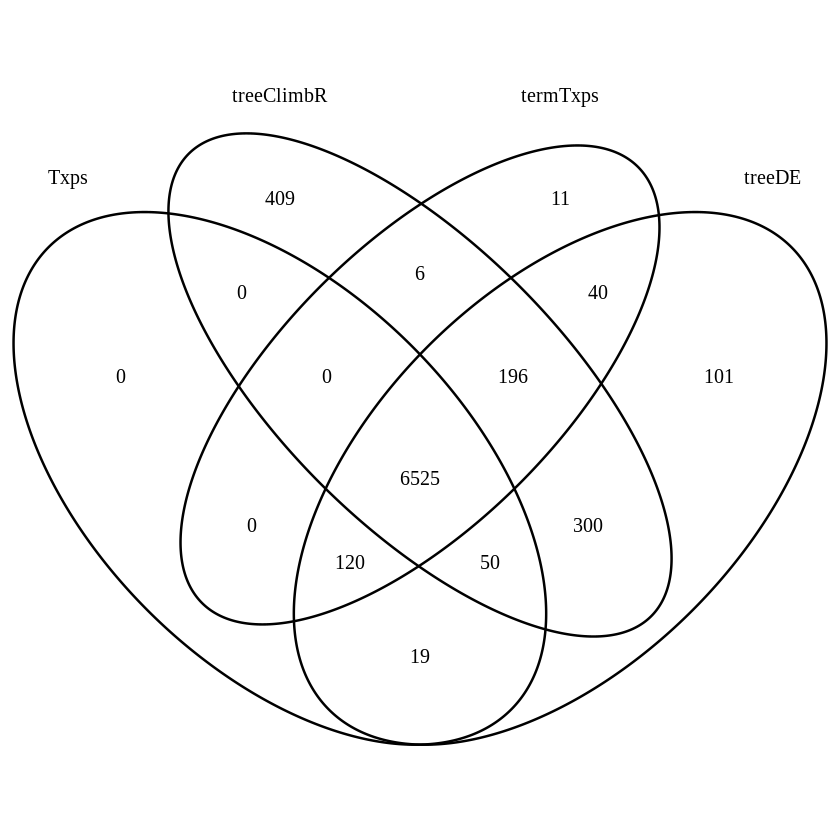

In [19]:
ve <- venn.diagram(
  x = lapply(list(Txps = rownames(tseCons)[detNodes[[1]][[3]]], treeDE = treeDETxps, 
                  treeClimbR = treeClimbTxps, term = termTxps), function(x) {
    intersect(x, dts)
  }),
  category.names = c("Txps", "treeDE", "treeClimbR", "termTxps"),
  filename = NULL  # Specify the output file name
)
suppressMessages(grid.draw(ve))

#### Terminus vs TreeDE comp
#### Venn Digrm

#### TreeDE vs treeClimbR

### Terminus vs treeDE

In [36]:
length(setdiff(termTxps, treeDETxps)) ## unique to Terminus
length(setdiff(treeDETxps, termTxps)) ## unique to treeDE
length(intersect(dts, setdiff(treeDETxps, termTxps))) ## unique to treeDE but true
length(intersect(dts, setdiff(termTxps, treeDETxps))) ## unique to term but true

[1] 284

[1] 1681

[1] 470

[1] 17

##### Overaggregation in Terminus

In [37]:
trueTreeDE <- intersect(dts, setdiff(treeDETxps, termTxps))
termTxpsM <- lapply(groupsClust, function(x) rownames(yTermThrNS)[x])  ## Term groups with ids

treeDEinTerm <- sapply(trueTreeDE, function(x) {
    for(i in seq_along(termTxpsM)) {
        if(x %in% termTxpsM[[i]])
            return(i)
    }
    return(-1)
})
                    
sum(treeDEinTerm != -1) ## 49 cases of true treeDE txps that are also covered by terminus groups but not de in terminus

## All the txps that are not covered are definitely under-aggregated
## It is overaggregation when txp is in Term group but has a cand ancestor 
## that has less number of txps compared to Terminus

txpsPlausOverAgg <- trueTreeDE[treeDEinTerm!=-1] ## all the desc cand txps that have a matching in Term
treeDEinTerm <- treeDEinTerm[treeDEinTerm != -1] ## the index of term group where the above match occurs

overAgg <- list()
underAgg <- list()
sAgg <- list()
oj <- 1
uj <- 1
sj <- 1
for(i in seq_along(txpsPlausOverAgg)) {
    tInd <- match(txpsPlausOverAgg[i], treeCons$tip) ## index of txp
    sigT <- c(tInd, Ancestors(treeCons, tInd)) ## finding which one of ancestor or txp is a cand node
    sigT <- sigT[sigT %in% detNodes[["treeDEFDR_OL"]][[3]]]
    if(length(sigT) != 1)
        stop(paste(i, "multiple thus error"))
    if(length(unlist(Descendants(treeCons, sigT))) < length(groupsClust[[treeDEinTerm[[i]]]])) {
        overAgg[[oj]] <- c(sigT, treeDEinTerm[[i]], length(groupsClust[[treeDEinTerm[[i]]]]))
        oj <- oj + 1
    }
    else if(length(unlist(Descendants(treeCons, sigT))) > length(groupsClust[[treeDEinTerm[[i]]]])) {
        underAgg[[uj]] <- c(sigT, treeDEinTerm[[i]], length(groupsClust[[treeDEinTerm[[i]]]]))
        uj <- uj + 1
    }
    else {
        sAgg[[sj]] <- c(sigT, treeDEinTerm[[i]], length(groupsClust[[treeDEinTerm[[i]]]]))
        sj <- sj + 1
    }

}

## No differential terminus group
sum(mcols(yTerm)[paste(as.character(l+sapply(overAgg, function(d) d[2]))), "qvalue"] < 0.1, na.rm=T)==0
length(overAgg)
overAgg
length(underAgg)
underAgg
length(sAgg)
sAgg

[1] 49

[1] TRUE

[1] 29

[[1]]
[1] 112685    299      2

[[2]]
[1] 58595  1760     2

[[3]]
[1] 43342  3271     2

[[4]]
[1] 118196   1505      2

[[5]]
[1] 86099  3630     2

[[6]]
[1] 113900   5181      5

[[7]]
[1] 113898   5181      5

[[8]]
[1] 184129   5237      5

[[9]]
[1] 51115  5291     5

[[10]]
[1] 50206  4840     4

[[11]]
[1] 95528  4823     3

[[12]]
[1] 13040  5446    10

[[13]]
[1] 164590   4965      4

[[14]]
[1] 237851   4717      3

[[15]]
[1] 41774  1046     2

[[16]]
[1] 28864  4185     3

[[17]]
[1] 85724   735     2

[[18]]
[1] 74901   369     2

[[19]]
[1] 32403   235     2

[[20]]
[1] 11076  4178     3

[[21]]
[1] 31689  1863     2

[[22]]
[1] 18583  1013     2

[[23]]
[1] 148099   5373      6

[[24]]
[1] 81772  2679     2

[[25]]
[1] 87823  4087     3

[[26]]
[1] 11941  3821     2

[[27]]
[1] 43062  5341     6

[[28]]
[1] 25330  1392     2

[[29]]
[1] 112110    948      2

[1] 19

[[1]]
[1] 232463    462      2

[[2]]
[1] 232463    462      2

[[3]]
[1] 253911   1393      2

[[4]]
[1] 183572   2304      2

[[5]]
[1] 241739   2021      2

[[6]]
[1] 241739   2021      2

[[7]]
[1] 234997   1251      2

[[8]]
[1] 170334    400      2

[[9]]
[1] 170334    400      2

[[10]]
[1] 188337   2813      2

[[11]]
[1] 188337   2813      2

[[12]]
[1] 238984   3148      2

[[13]]
[1] 238984   3148      2

[[14]]
[1] 143088   3643      2

[[15]]
[1] 143088   3643      2

[[16]]
[1] 156930   2081      2

[[17]]
[1] 138360   3627      2

[[18]]
[1] 176191   4677      3

[[19]]
[1] 214105    839      2

[1] 1

[[1]]
[1] 144204   5262      5

##### Overaggregation examples

In [38]:
tail(rownames(yAggTermThrNS))

[1] "143615" "143616" "143617" "143618" "143619" "143620"

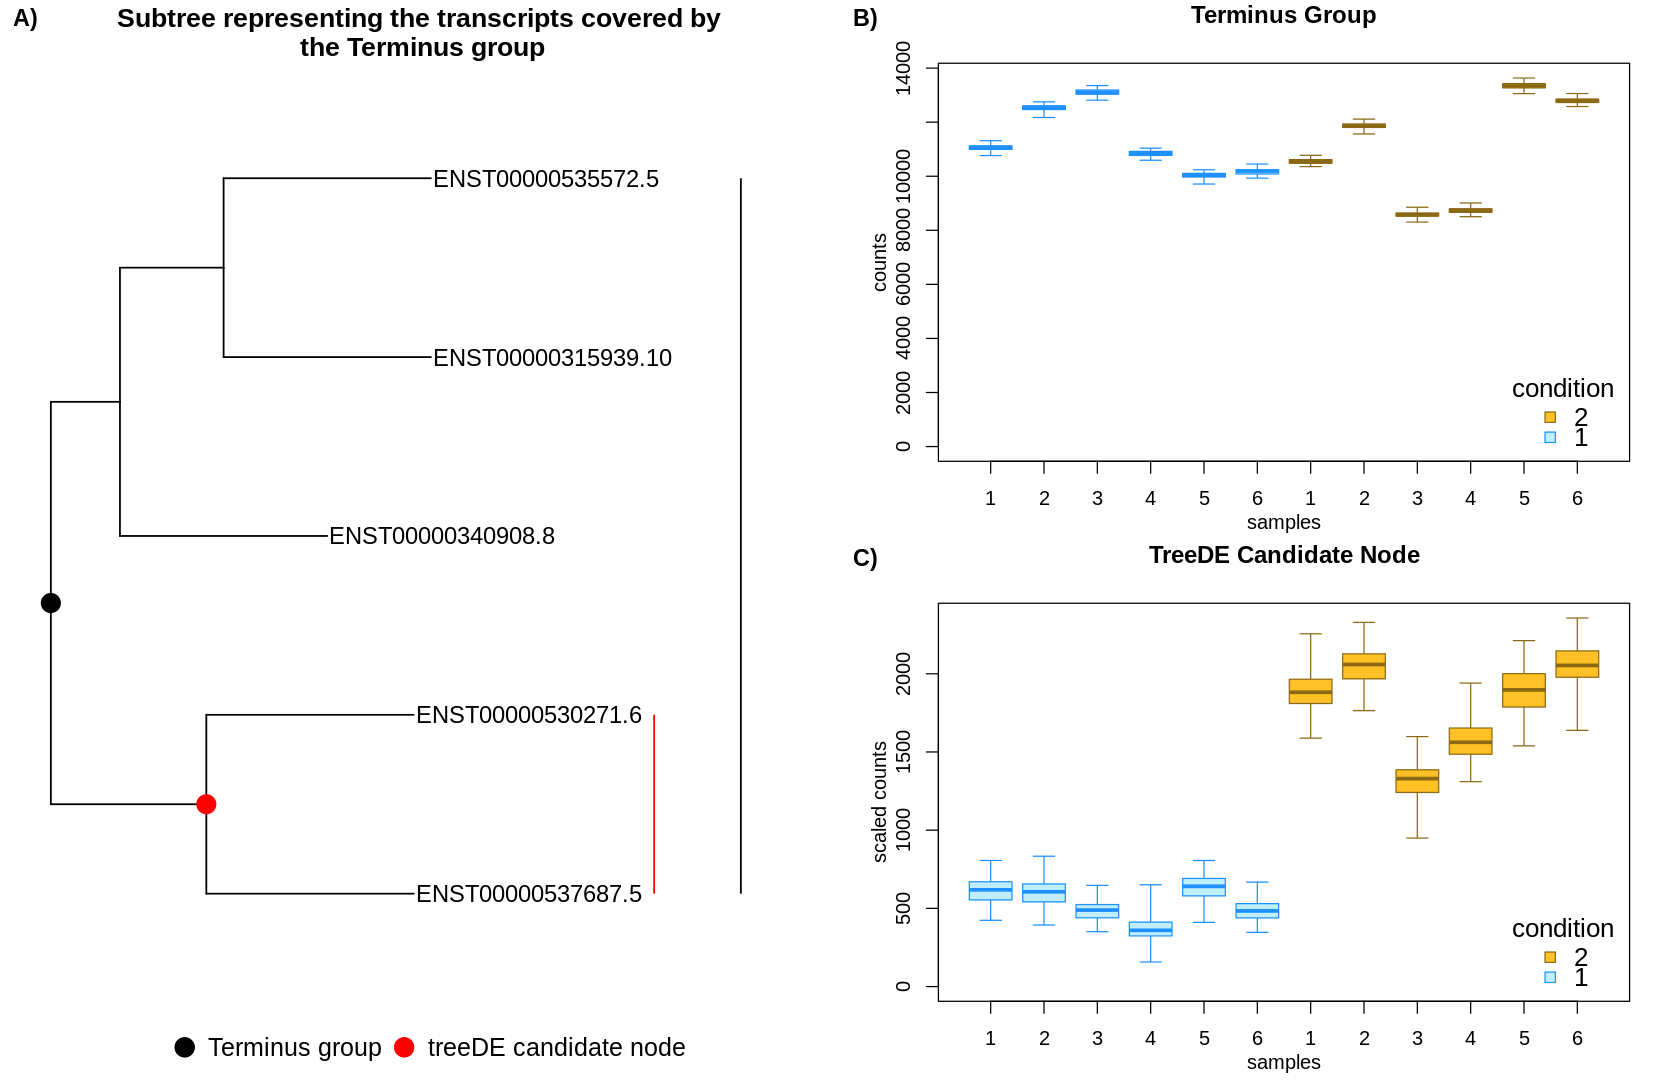

In [39]:
options(repr.plot.width=14, repr.plot.height=9)
suppressPackageStartupMessages(library("ggtree"))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library("ggpubr"))

cNode <- 184129
tNode <- 5237
treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[1], levels_back = 0)

of=13.5
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 43) +
    geom_tiplab(size=5) +
    geom_point2(aes(subset=(node==7), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==6), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 7, label = "", textcolour="red", 
                  barcolour="red",  fontsize=5, offset = of) + 
    geom_cladelab(node = 6, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "bottomright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

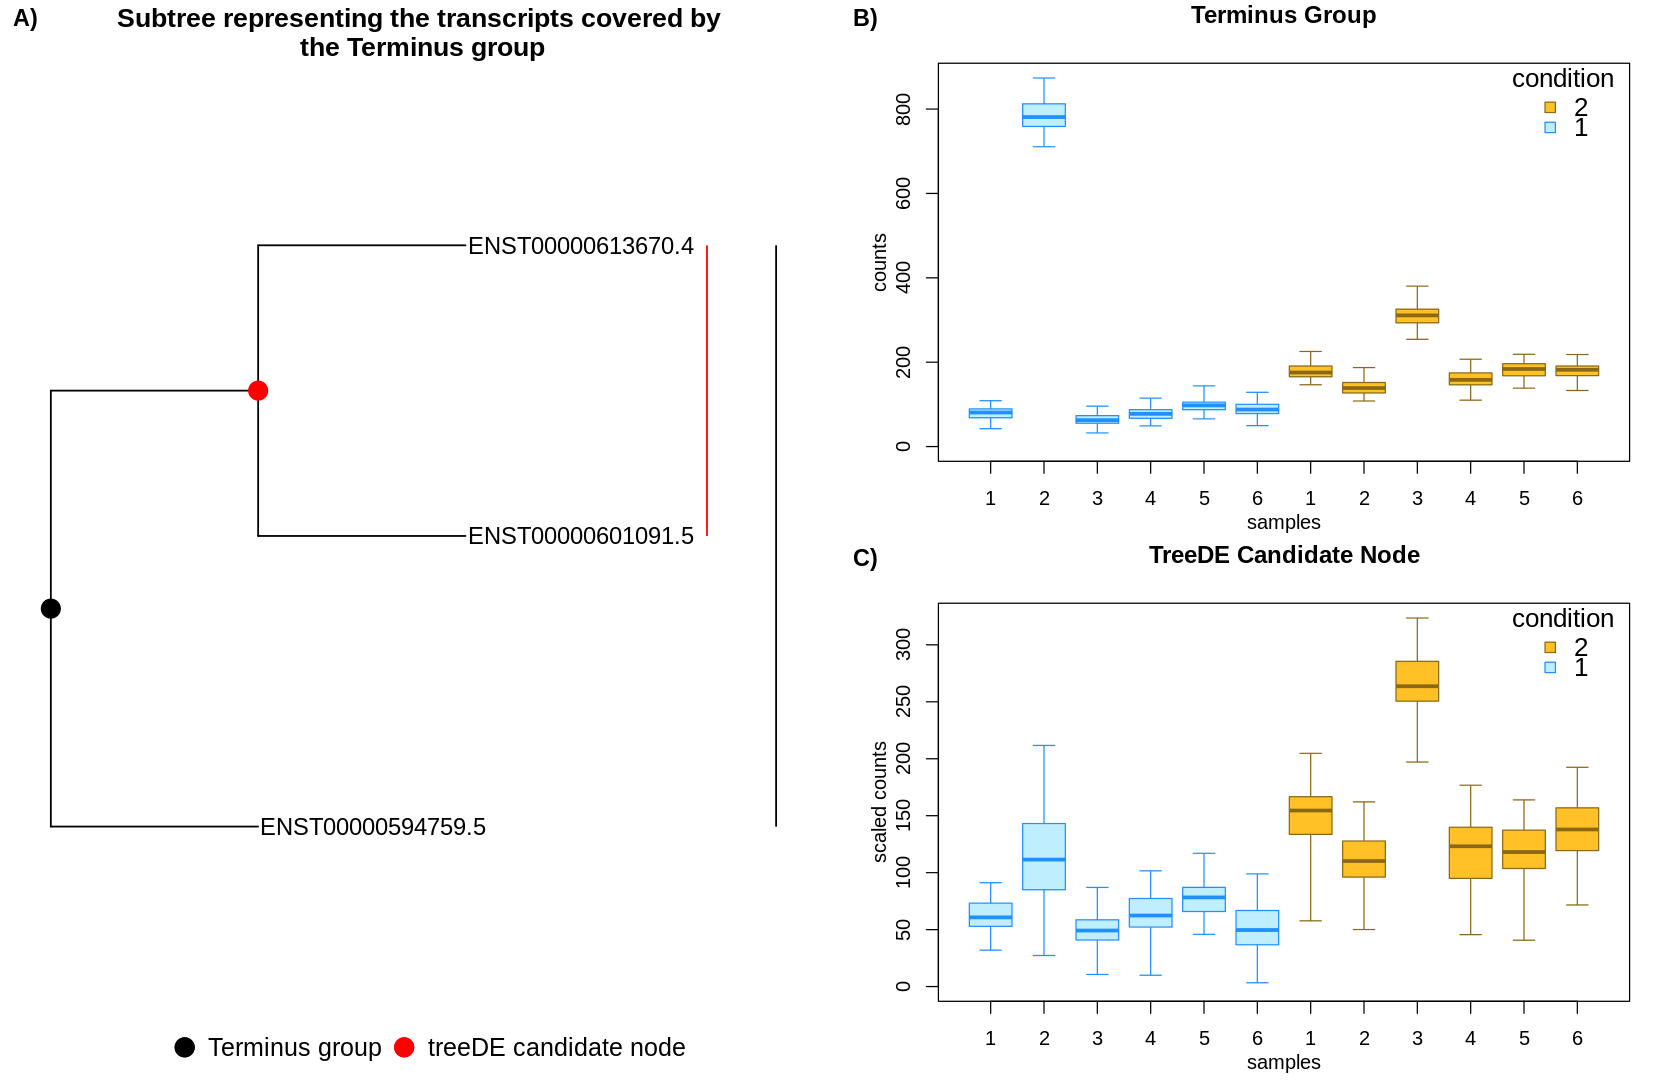

In [26]:
cNode <- 237851
tNode <- 4717
treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[1], levels_back = 0)

of=13.5
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 43) +
    geom_tiplab(size=5) +
    geom_point2(aes(subset=(node==5), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==4), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 5, label = "", textcolour="red", 
                  barcolour="red",  fontsize=5, offset = of) + 
    geom_cladelab(node = 4, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

In [52]:
cNode <- 148099
tNode <- 5373
treeCons$tip[Descendants(treeCons, cNode)[[1]]]
treeCons$tip[groupsClust[[tNode]]]
treeCons$tip[Descendants(treeCons, Ancestors(treeCons,cNode)[2])[[1]]]

[1] "ENST00000630077.2" "ENST00000382491.7"

[1] "ENST00000433931.6" "ENST00000382499.6" "ENST00000630077.2"
[4] "ENST00000438952.5" "ENST00000382491.7" "ENST00000357345.7"

[1] "ENST00000382499.6" "ENST00000357345.7" "ENST00000433931.6"
[4] "ENST00000438952.5" "ENST00000630077.2" "ENST00000382491.7"

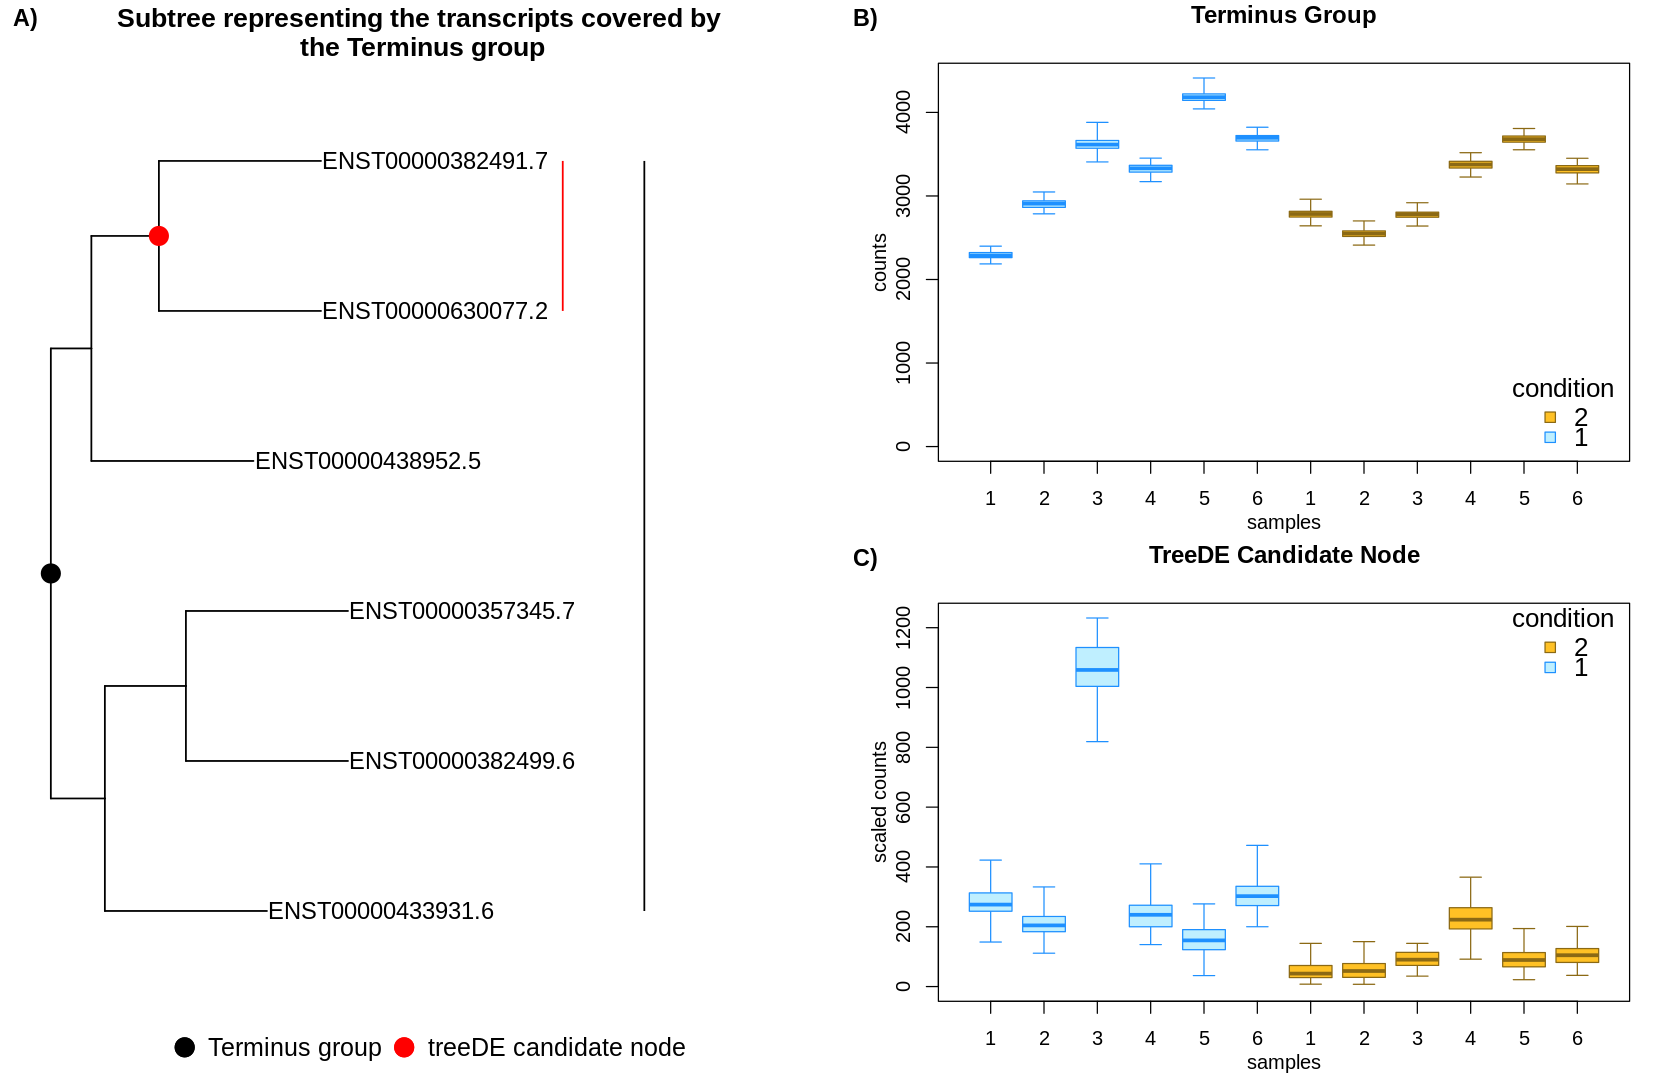

In [27]:
cNode <- 148099
tNode <- 5373
treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[2], levels_back = 0)

of=17.5
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 55) +
    geom_tiplab(size=5) +
    geom_point2(aes(subset=(node==11), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==7), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 11, label = "", textcolour="red", 
                  barcolour="red",  fontsize=5, offset = of) + 
    geom_cladelab(node = 7, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

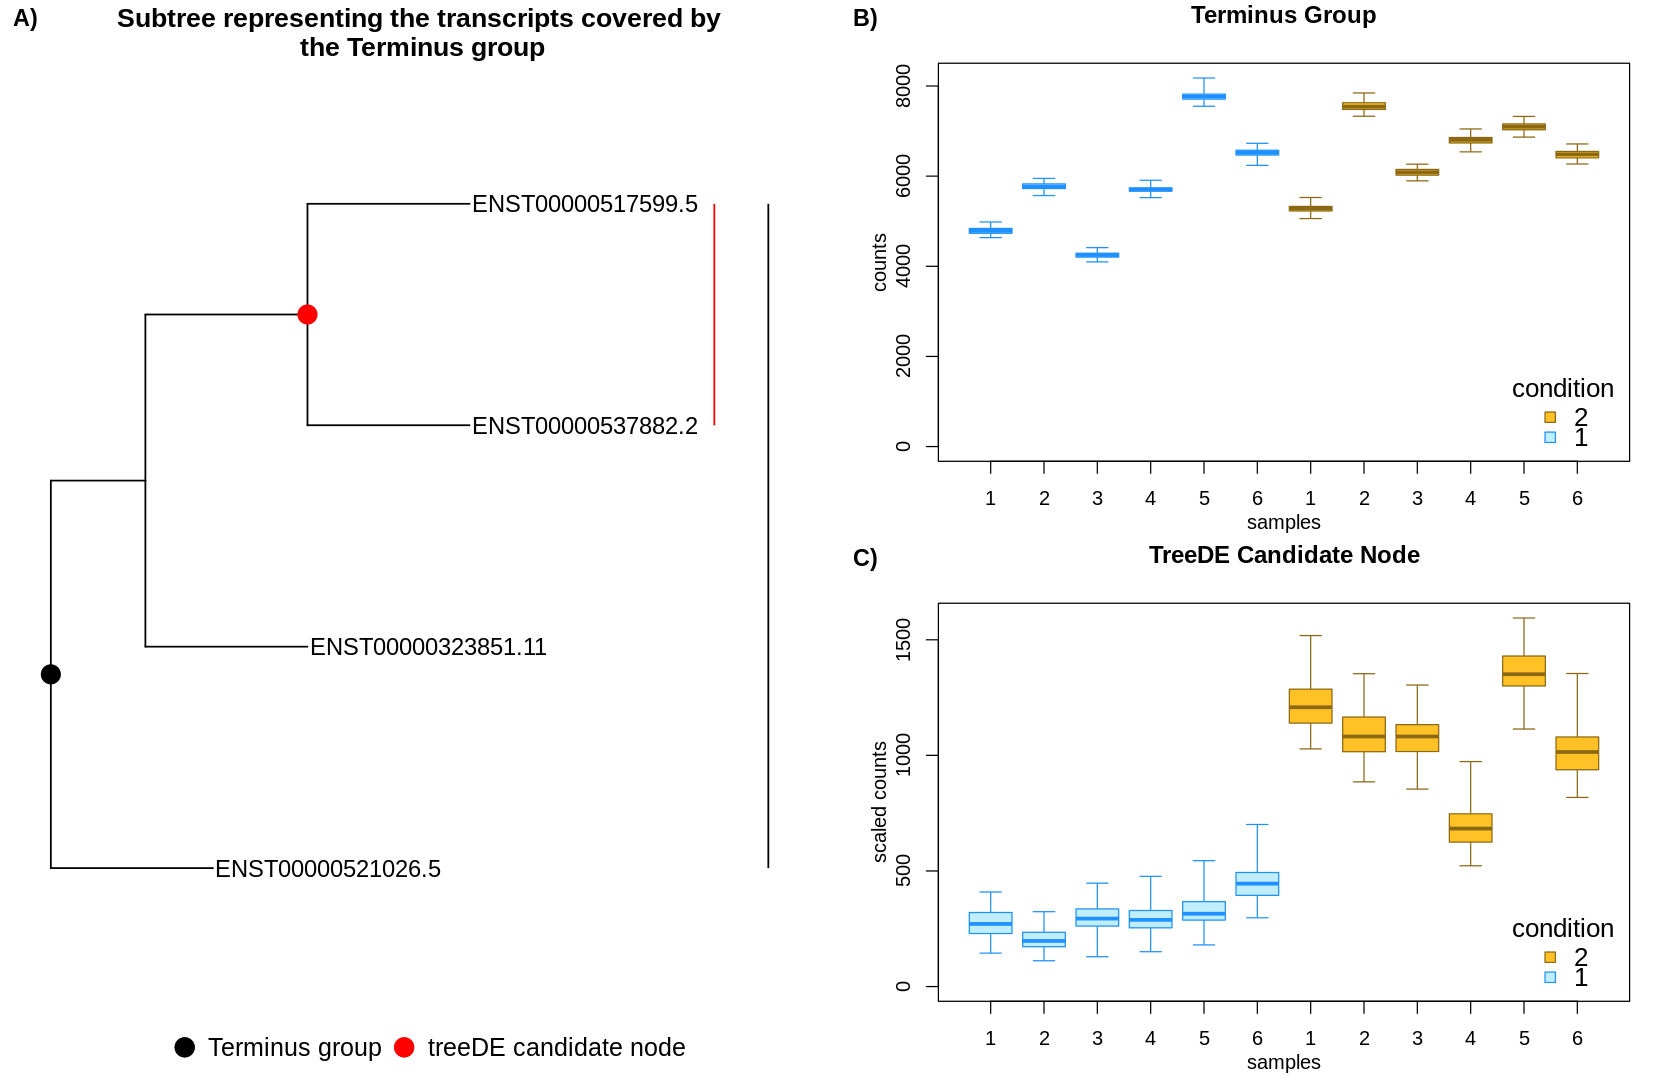

In [50]:
cNode <- 164590
tNode <- 4965
treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[2], levels_back = 0)

of=17.5
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 55) +
    geom_tiplab(size=5) +
    geom_point2(aes(subset=(node==7), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==5), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 7, label = "", textcolour="red", 
                  barcolour="red",  fontsize=5, offset = of) + 
    geom_cladelab(node = 5, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "bottomright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

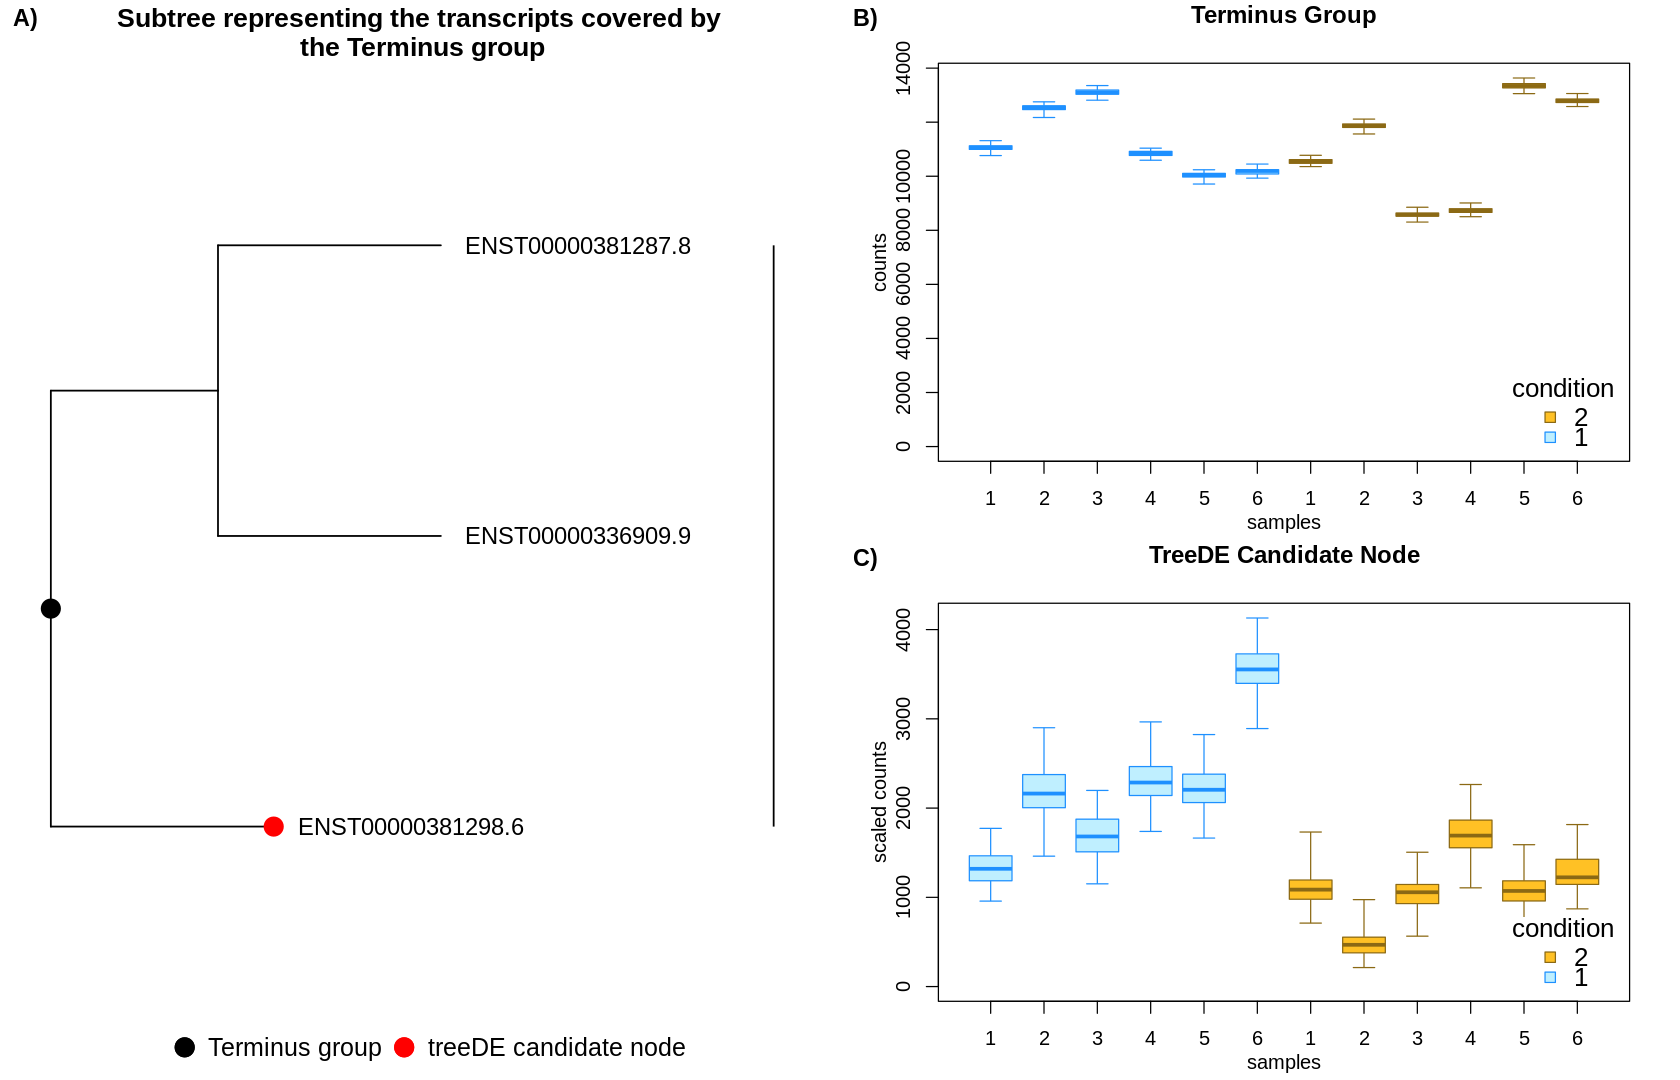

In [66]:
cNode <- 11076
tNode <- 4178
treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[1], levels_back = 0)

of=13.5
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 40) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==3), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==4), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 3, label = "", textcolour="red", 
                  barcolour="red", barsize=2, fontsize=5, offset = of+2) + 
    geom_cladelab(node = 4, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "bottomright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

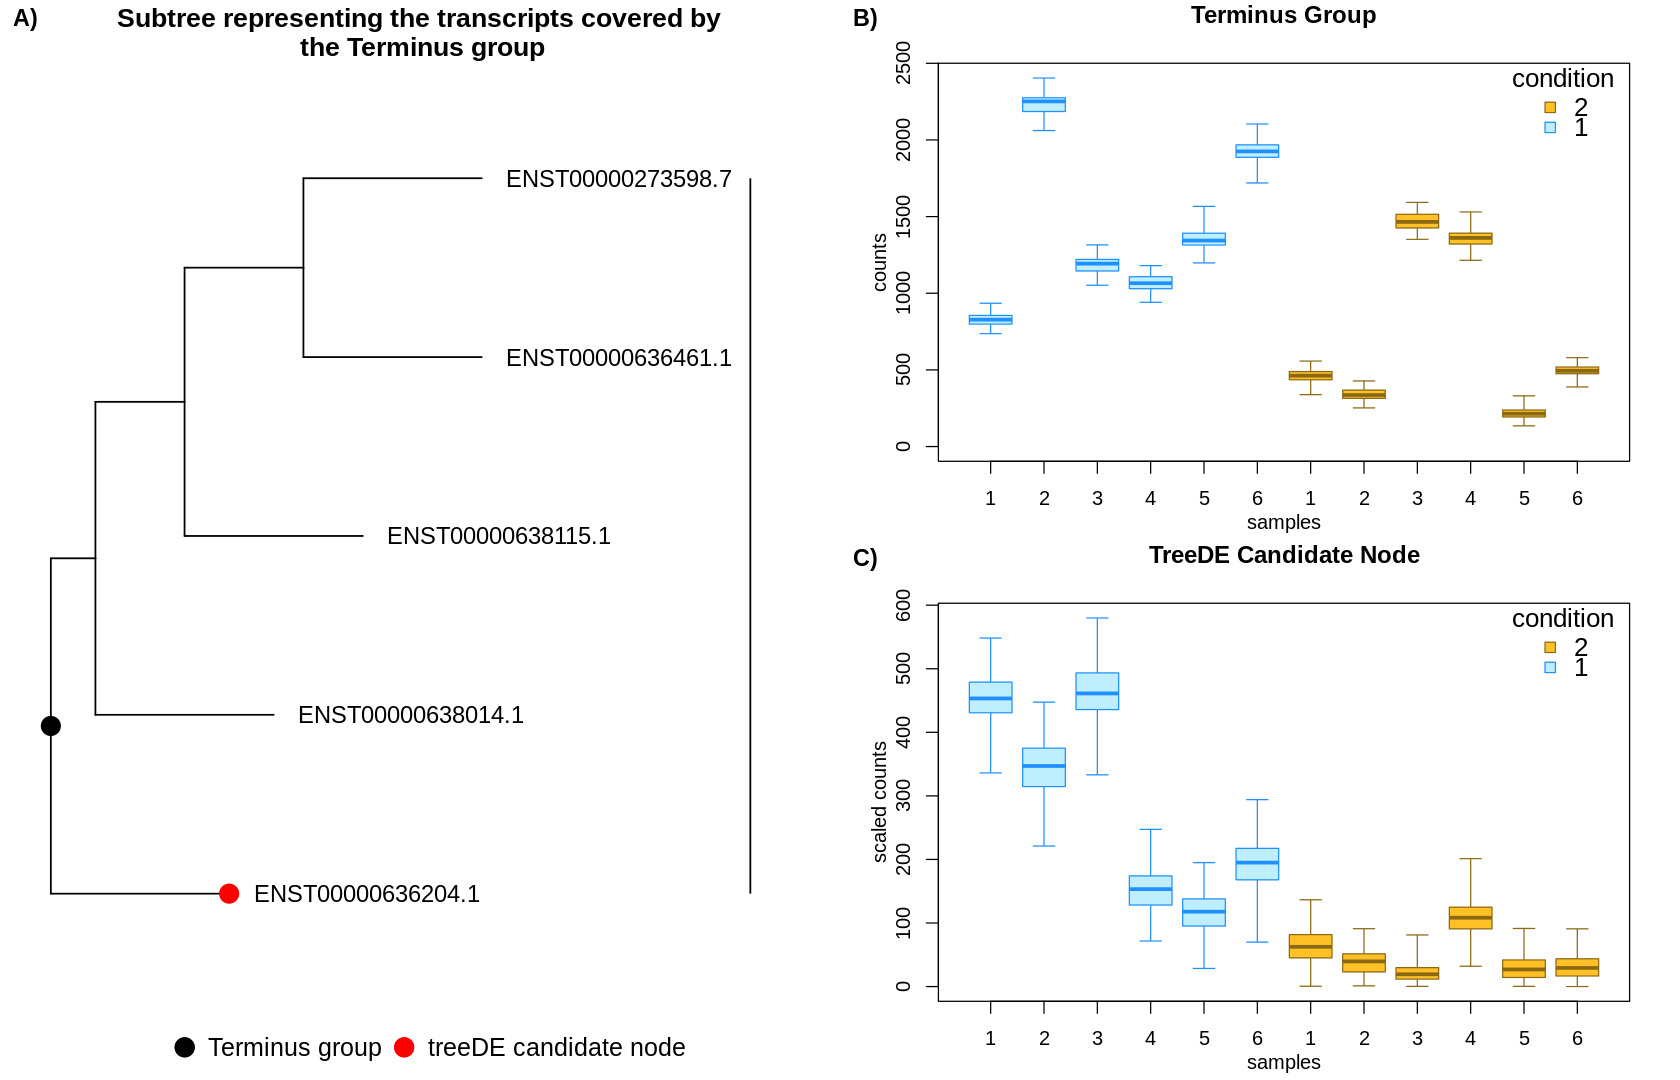

In [26]:
cNode <- 113900
tNode <- 5181
treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[1], levels_back = 0)

of=13.5
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 50) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==5), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==6), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 5, label = "", textcolour="red", 
                  barcolour="red", barsize=2, fontsize=5, offset = of+2) + 
    geom_cladelab(node = 6, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

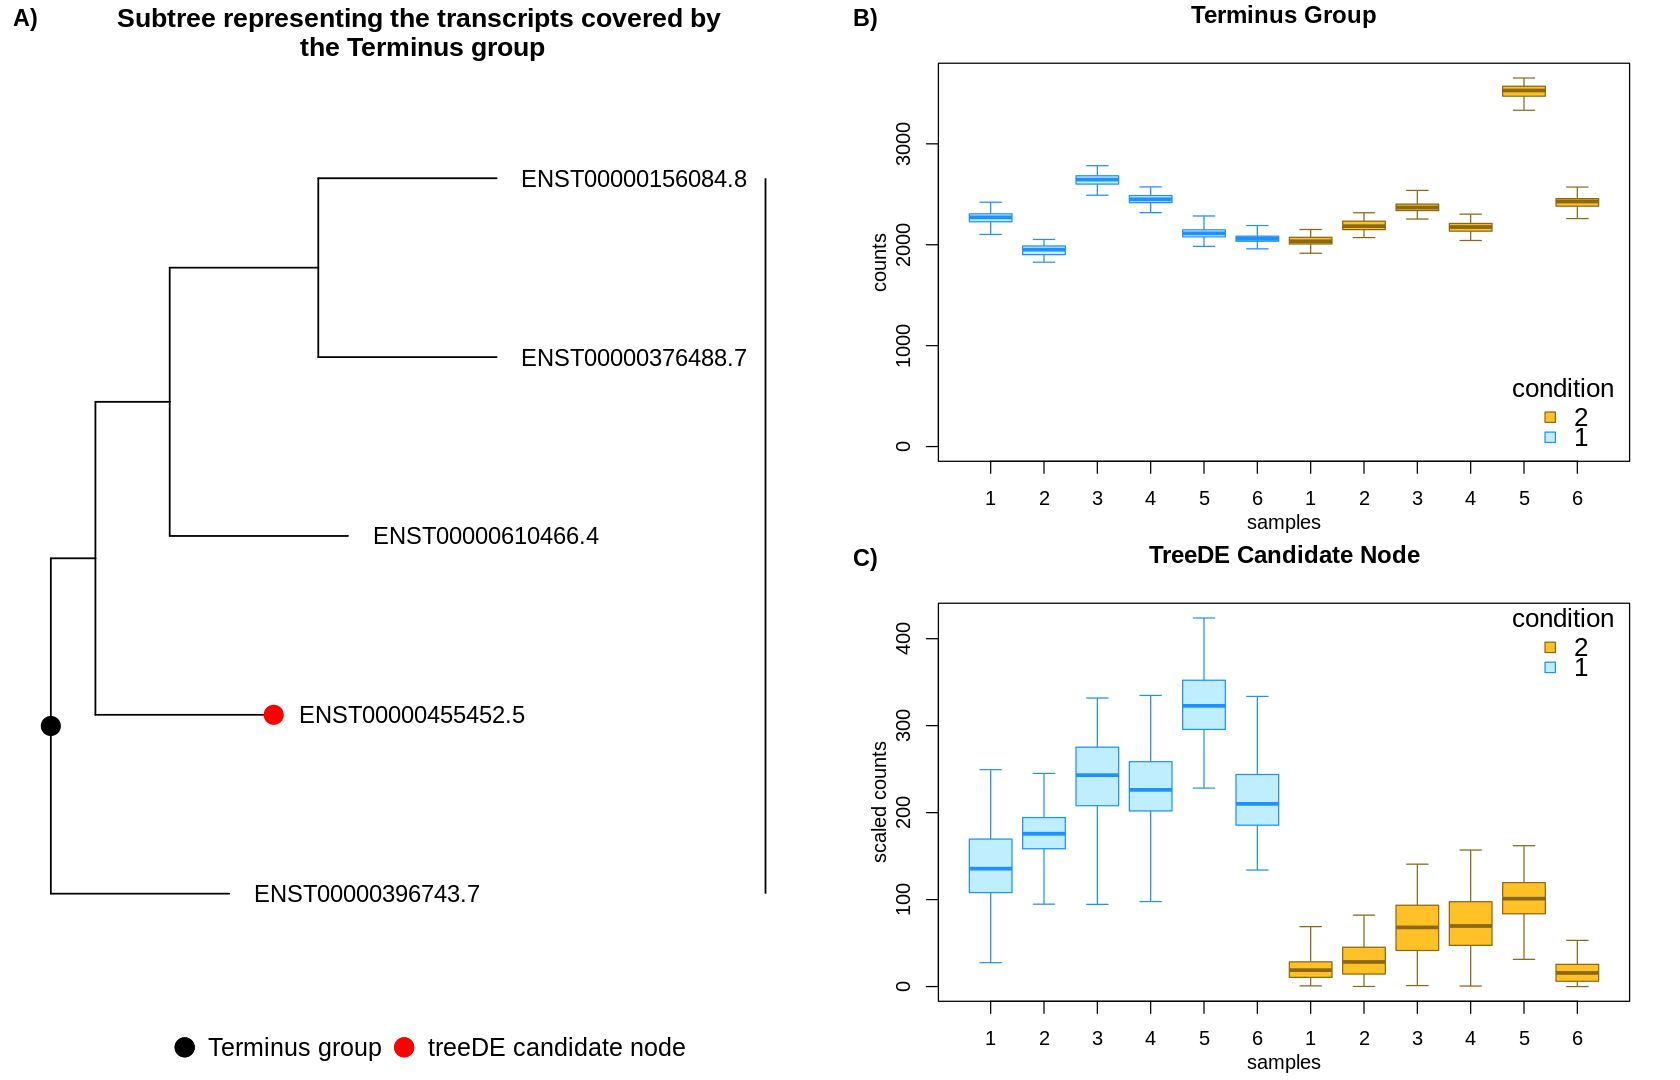

In [28]:
cNode <- 51115
tNode <- 5291
treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[2], levels_back = 0)
of=13.5

pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 50) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==4), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==6), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 4, label = "", textcolour="red", 
                  barcolour="red", barsize=2, fontsize=5, offset = of+2) + 
    geom_cladelab(node = 6, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] 1

[1] "ENST00000407969.5" "ENST00000406341.5" "ENST00000402198.5"


Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENST00000402198.5, ENST00000407969.5, ENST00000406341.5
Node labels:
  Node210807, Node210808

Rooted; includes branch lengths.

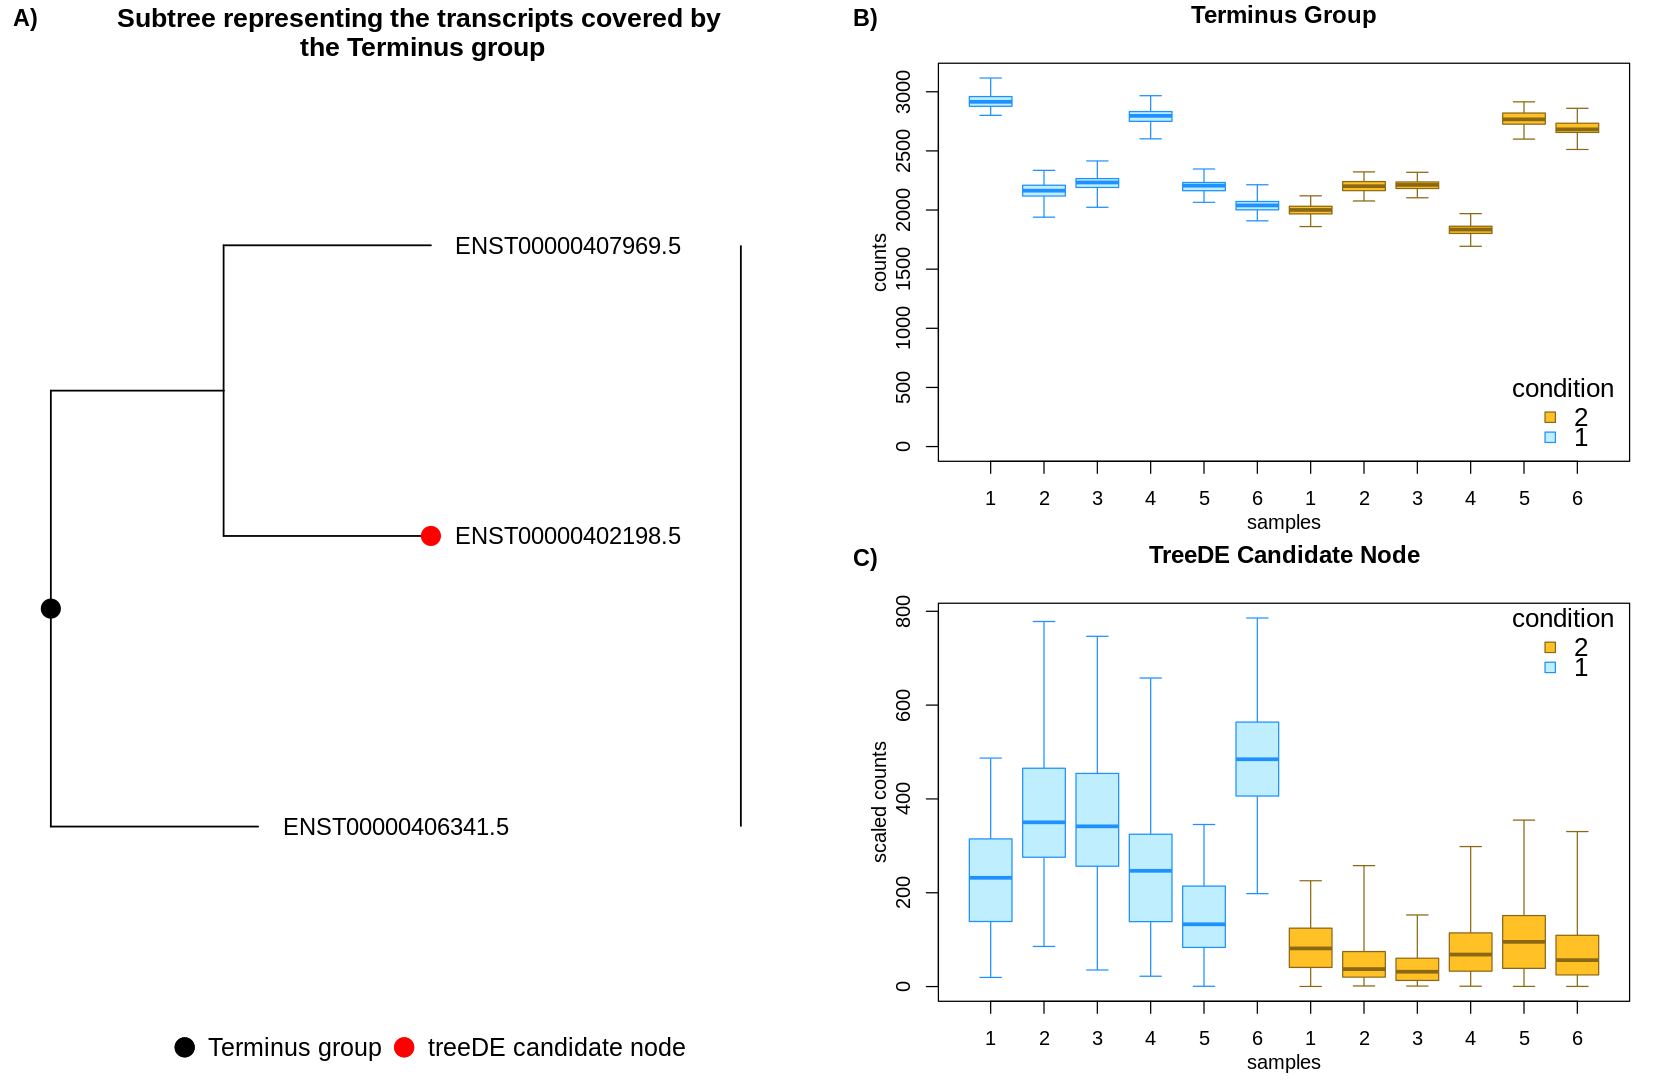

In [78]:
cNode <- 87823
tNode <- 4087

treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[2], levels_back = 0)

of=13.5

pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 43) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==1), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==4), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 1, label = "", textcolour="red", 
                  barcolour="red", barsize=2, fontsize=5, offset = of+2) + 
    geom_cladelab(node = 4, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] 2

[1] "ENST00000357988.9"  "ENST00000338154.10"


Phylogenetic tree with 2 tips and 1 internal nodes.

Tip labels:
  ENST00000338154.10, ENST00000357988.9
Node labels:
  Node145187

Rooted; includes branch lengths.

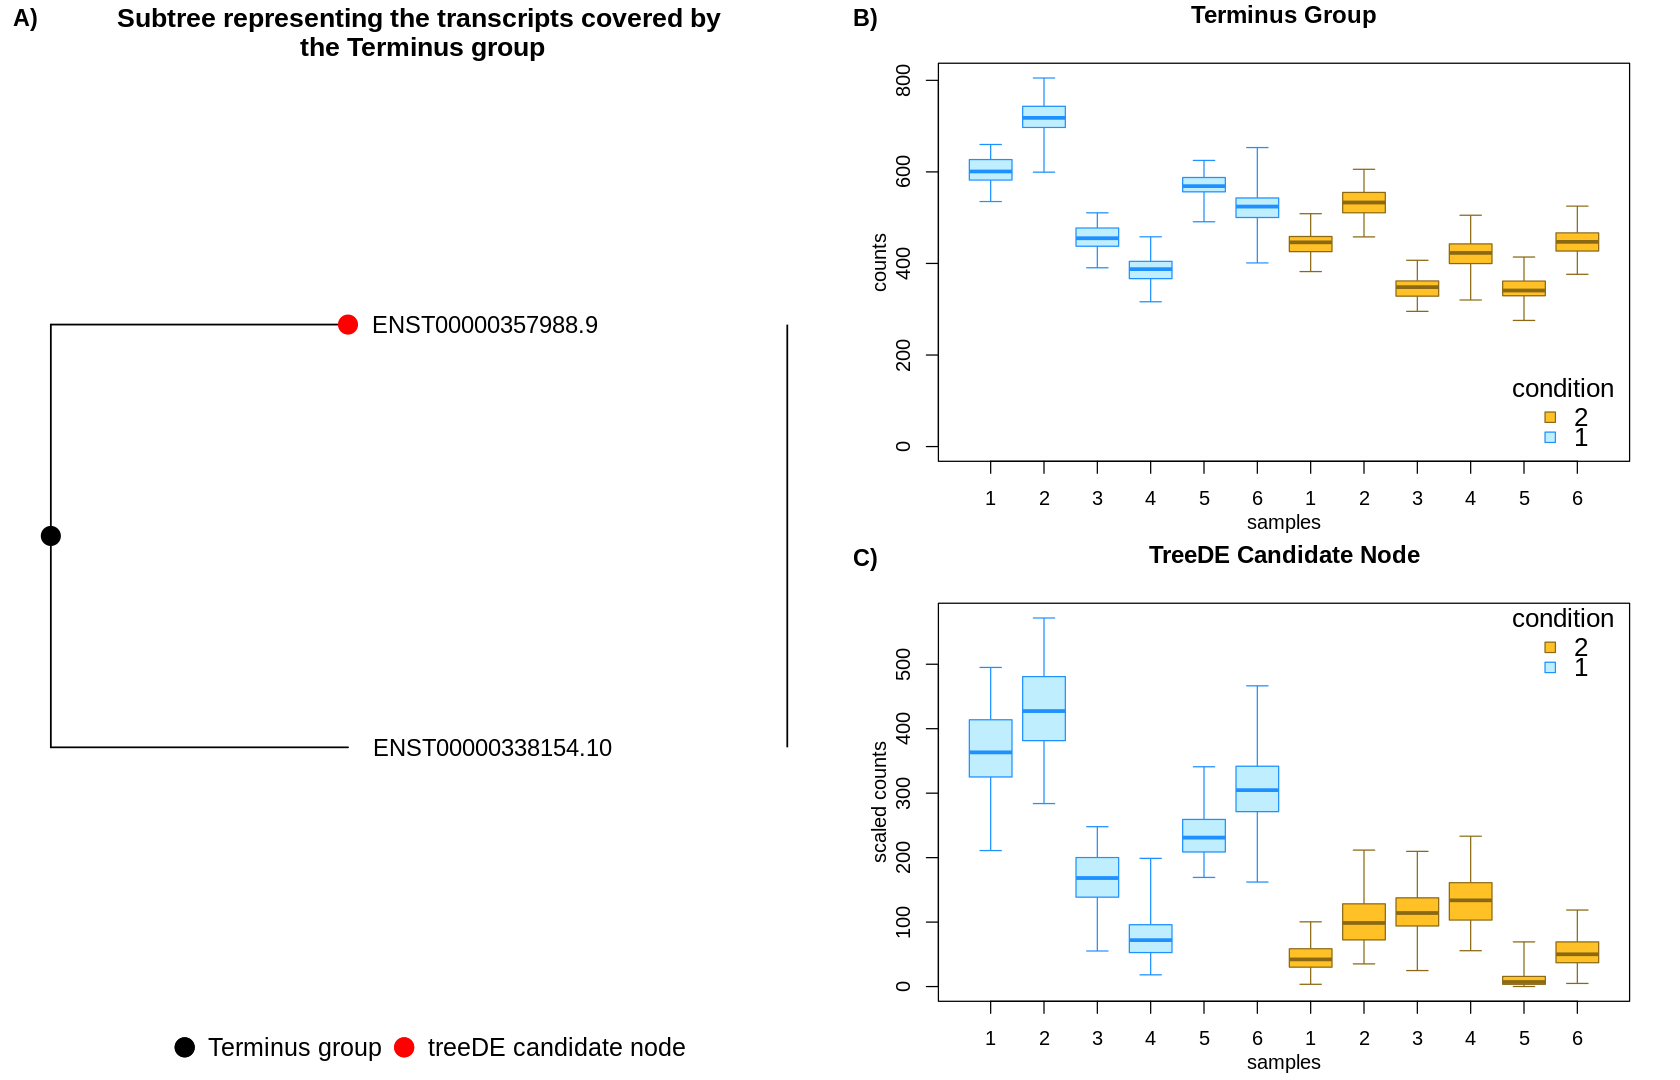

In [82]:
cNode <- 11941
tNode <- 3821

treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[1], levels_back = 0)

of=13.5

pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 30) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==2), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==3), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 2, label = "", textcolour="red", 
                  barcolour="red", barsize=2, fontsize=5, offset = of+2) + 
    geom_cladelab(node = 3, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] 1

[1] "ENST00000417464.6" "ENST00000395560.7"


Phylogenetic tree with 2 tips and 1 internal nodes.

Tip labels:
  ENST00000417464.6, ENST00000395560.7
Node labels:
  Node156713

Rooted; includes branch lengths.

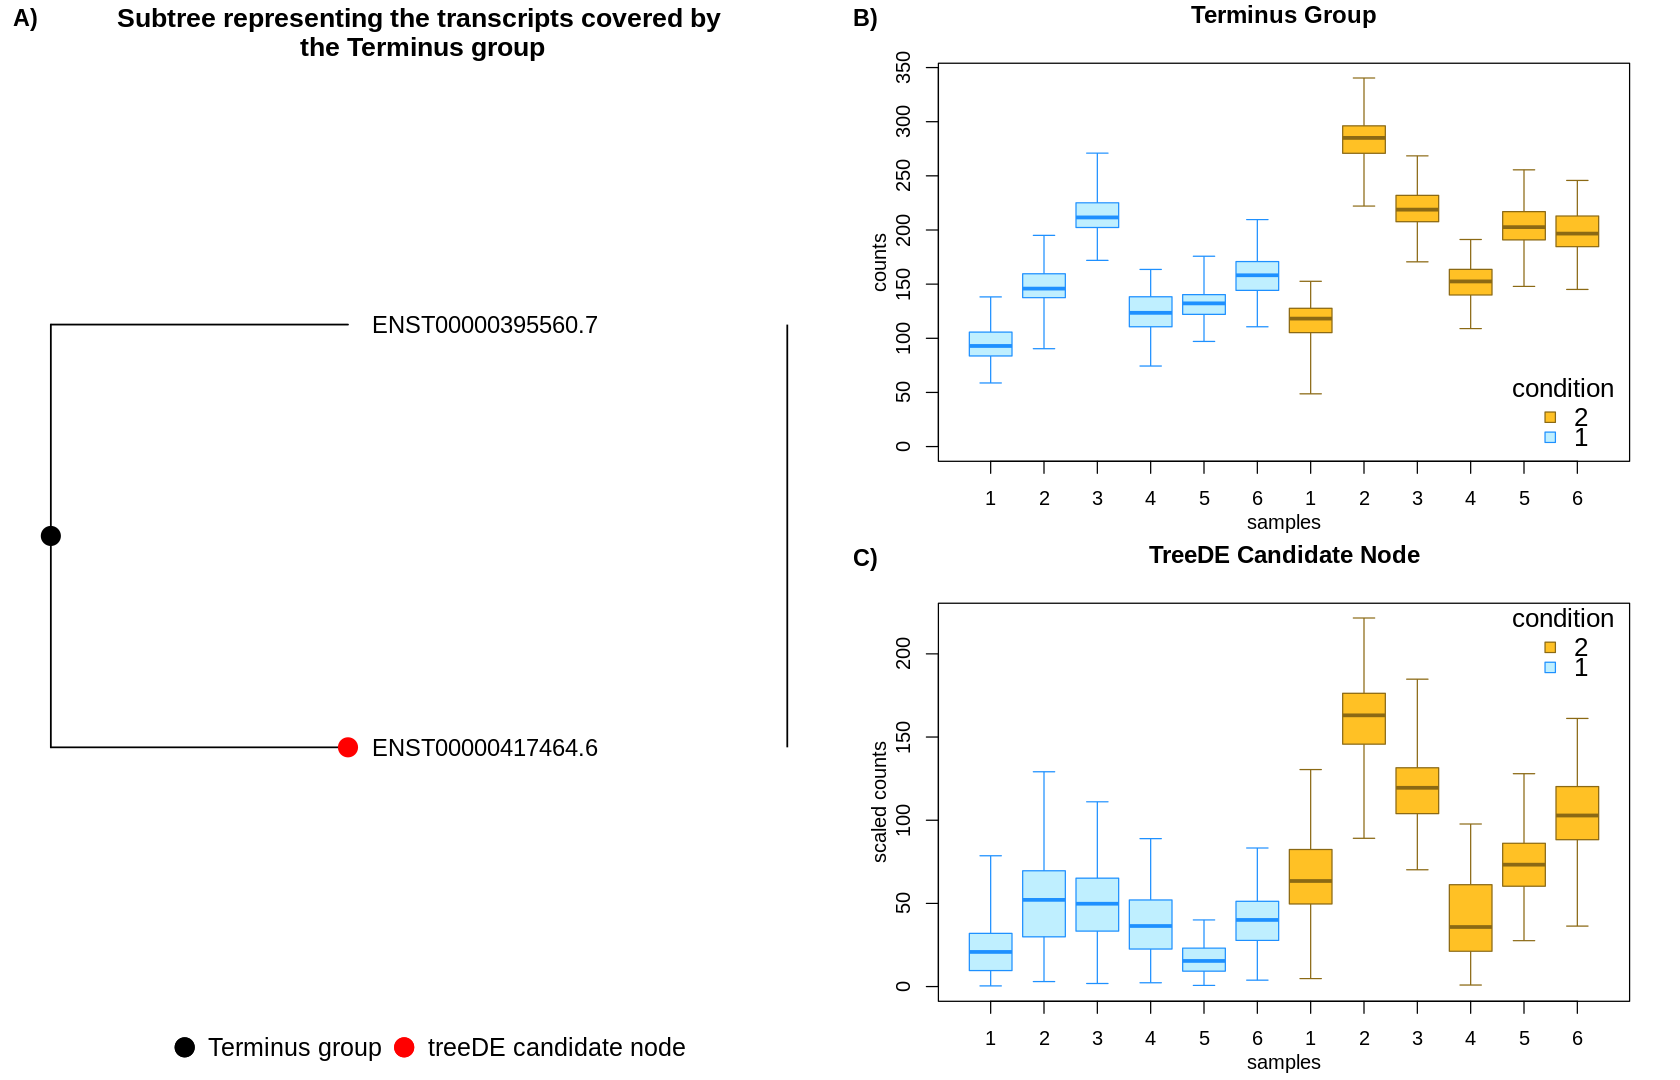

In [85]:
cNode <- 25330
tNode <- 1392

treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[1], levels_back = 0)
match(treeCons$tip[cNode], treeSub$tip)
treeCons$tip[groupsClust[[tNode]]]
of=13.5
treeSub
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 30) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==1), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==3), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 1, label = "", textcolour="red", 
                  barcolour="red", barsize=2, fontsize=5, offset = of+2) + 
    geom_cladelab(node = 3, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] 2

[1] "ENST00000552361.1" "ENST00000485827.1"


Phylogenetic tree with 2 tips and 1 internal nodes.

Tip labels:
  ENST00000552361.1, ENST00000485827.1
Node labels:
  Node231850

Rooted; includes branch lengths.

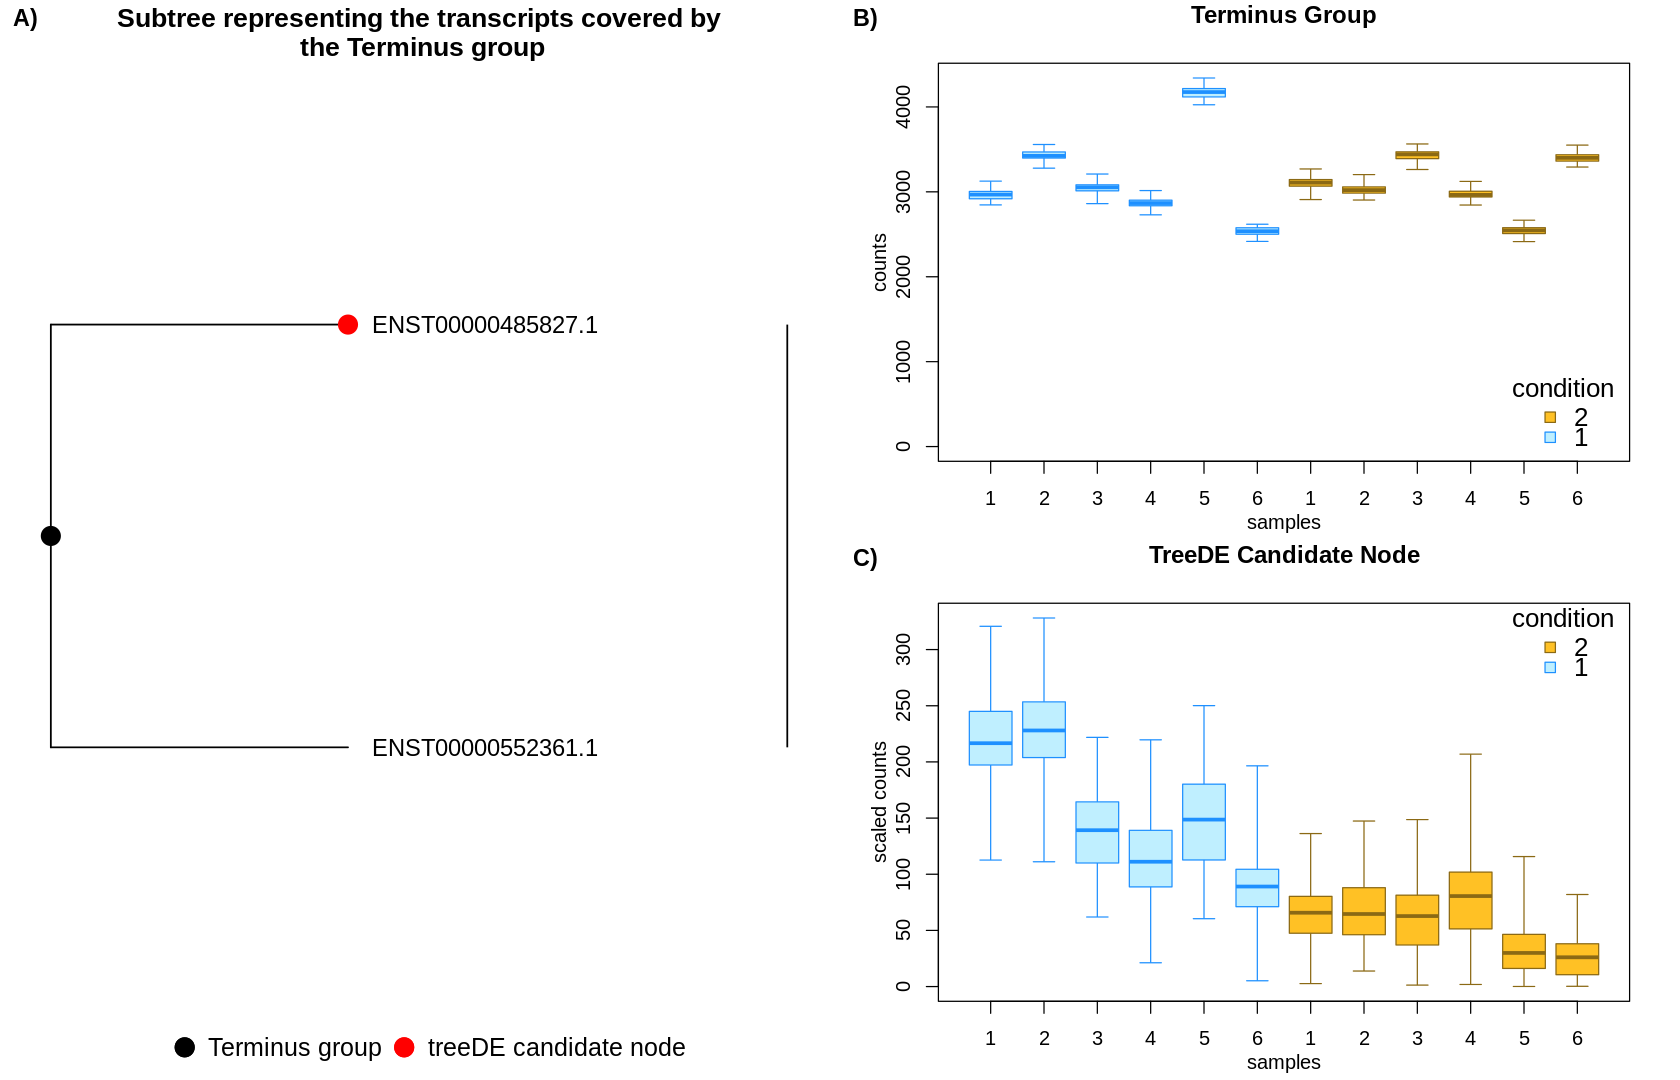

In [87]:
cNode <- 112110
tNode <- 948

treeSub <- treeio::tree_subset(treeCons, Ancestors(treeCons,cNode)[1], levels_back = 0)
match(treeCons$tip[cNode], treeSub$tip)
treeCons$tip[groupsClust[[tNode]]]
of=13.5
treeSub
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \nthe Terminus group") +
    xlim(NA, 30) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==2), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==3), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 2, label = "", textcolour="red", 
                  barcolour="red", barsize=2, fontsize=5, offset = of+2) + 
    geom_cladelab(node = 3, label = "", textcolour="black",
                  fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

#### Underaggregation examples

[1] "ENST00000291552.8" "ENST00000610664.4"

[1] "ENST00000380276.6" "ENST00000619610.2" "ENST00000610664.4"
[4] "ENST00000291552.8"

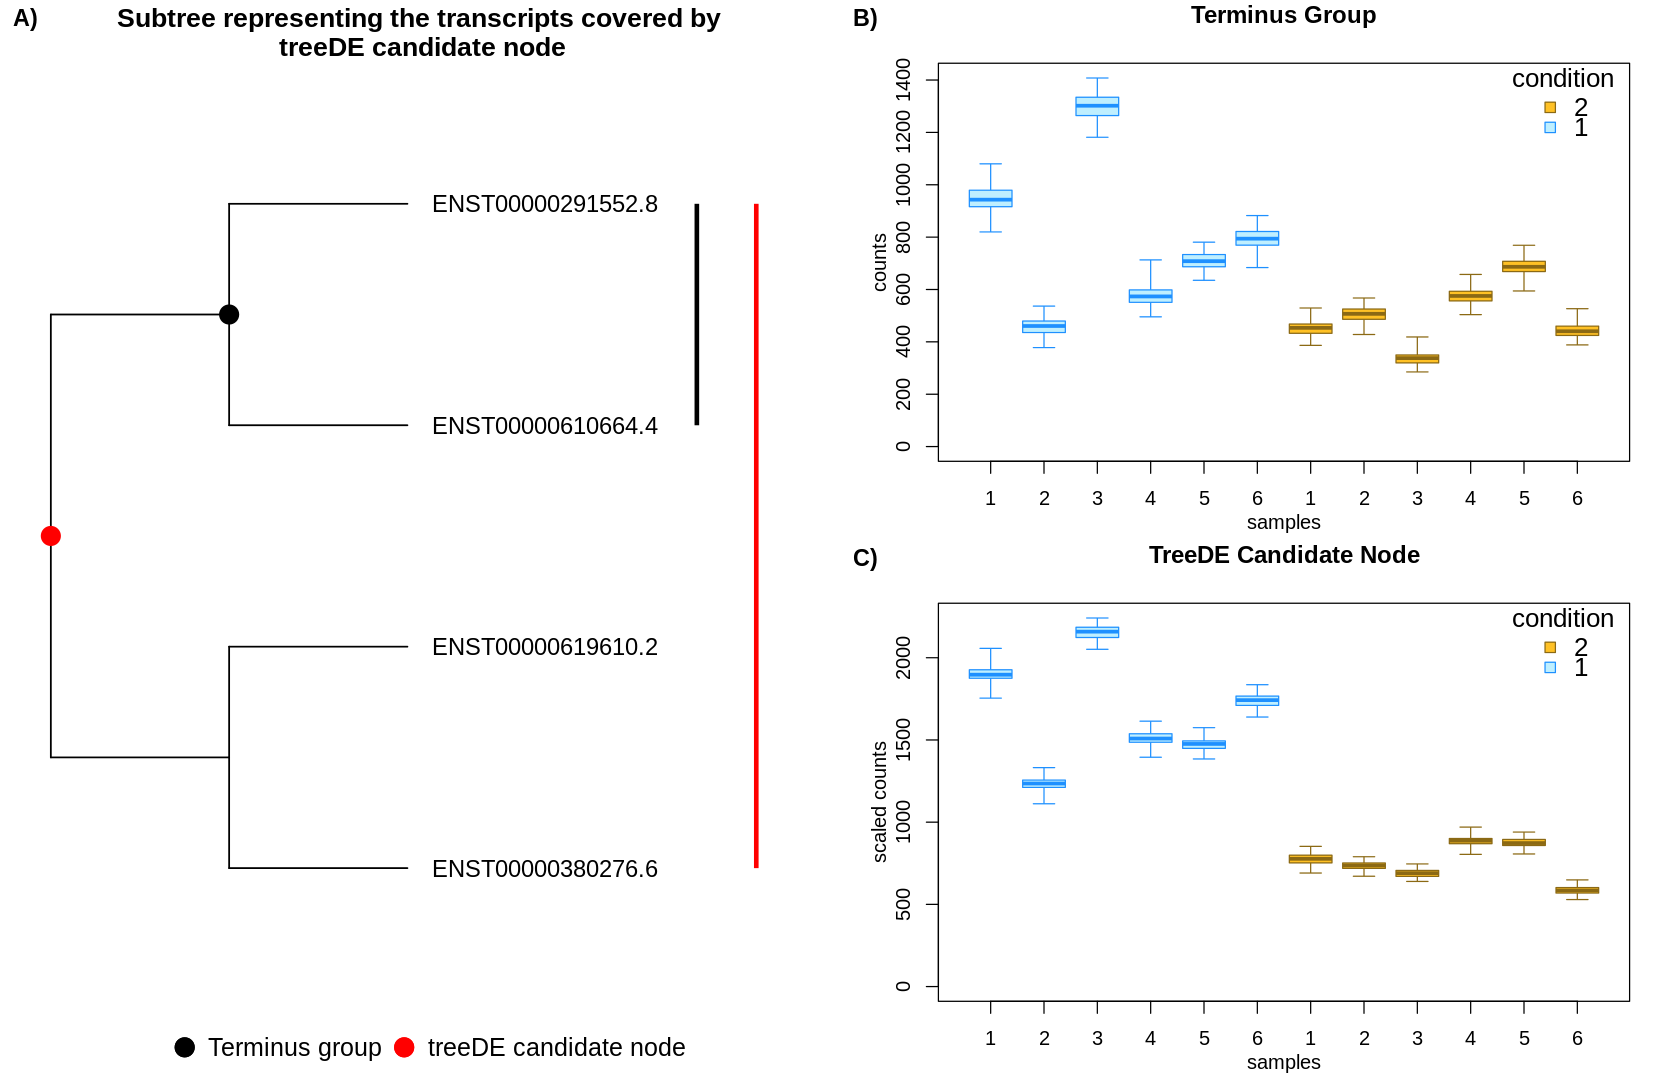

In [32]:
options(repr.plot.width=14, repr.plot.height=9)
suppressPackageStartupMessages(library("ggtree"))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library("ggpubr"))

tNode <- 3627
cNode <- 138360
treeCons$tip[groupsClust[[3627]]]
treeCons$tip[Descendants(treeCons, 138360)[[1]]]

treeSub <- treeio::tree_subset(treeCons,cNode, levels_back = 0)
of=19
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \ntreeDE candidate node") +
    xlim(NA, 50) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==5), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==7), color = "black"), 
            size=5, fill='black', show.legend=T) + 
    geom_cladelab(node = 7, label = "", textcolour="black",
                  fontsize=5, barsize=1.3, offset = of) +
    geom_cladelab(node = 5, label = "", textcolour="red", 
                  barcolour="red", barsize=1.3, fontsize=5, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] "ENST00000321027.7" "ENST00000470197.5"

[1] "ENST00000470197.5" "ENST00000321027.7" "ENST00000541687.5"
[4] "ENST00000472230.5" "ENST00000409857.7"

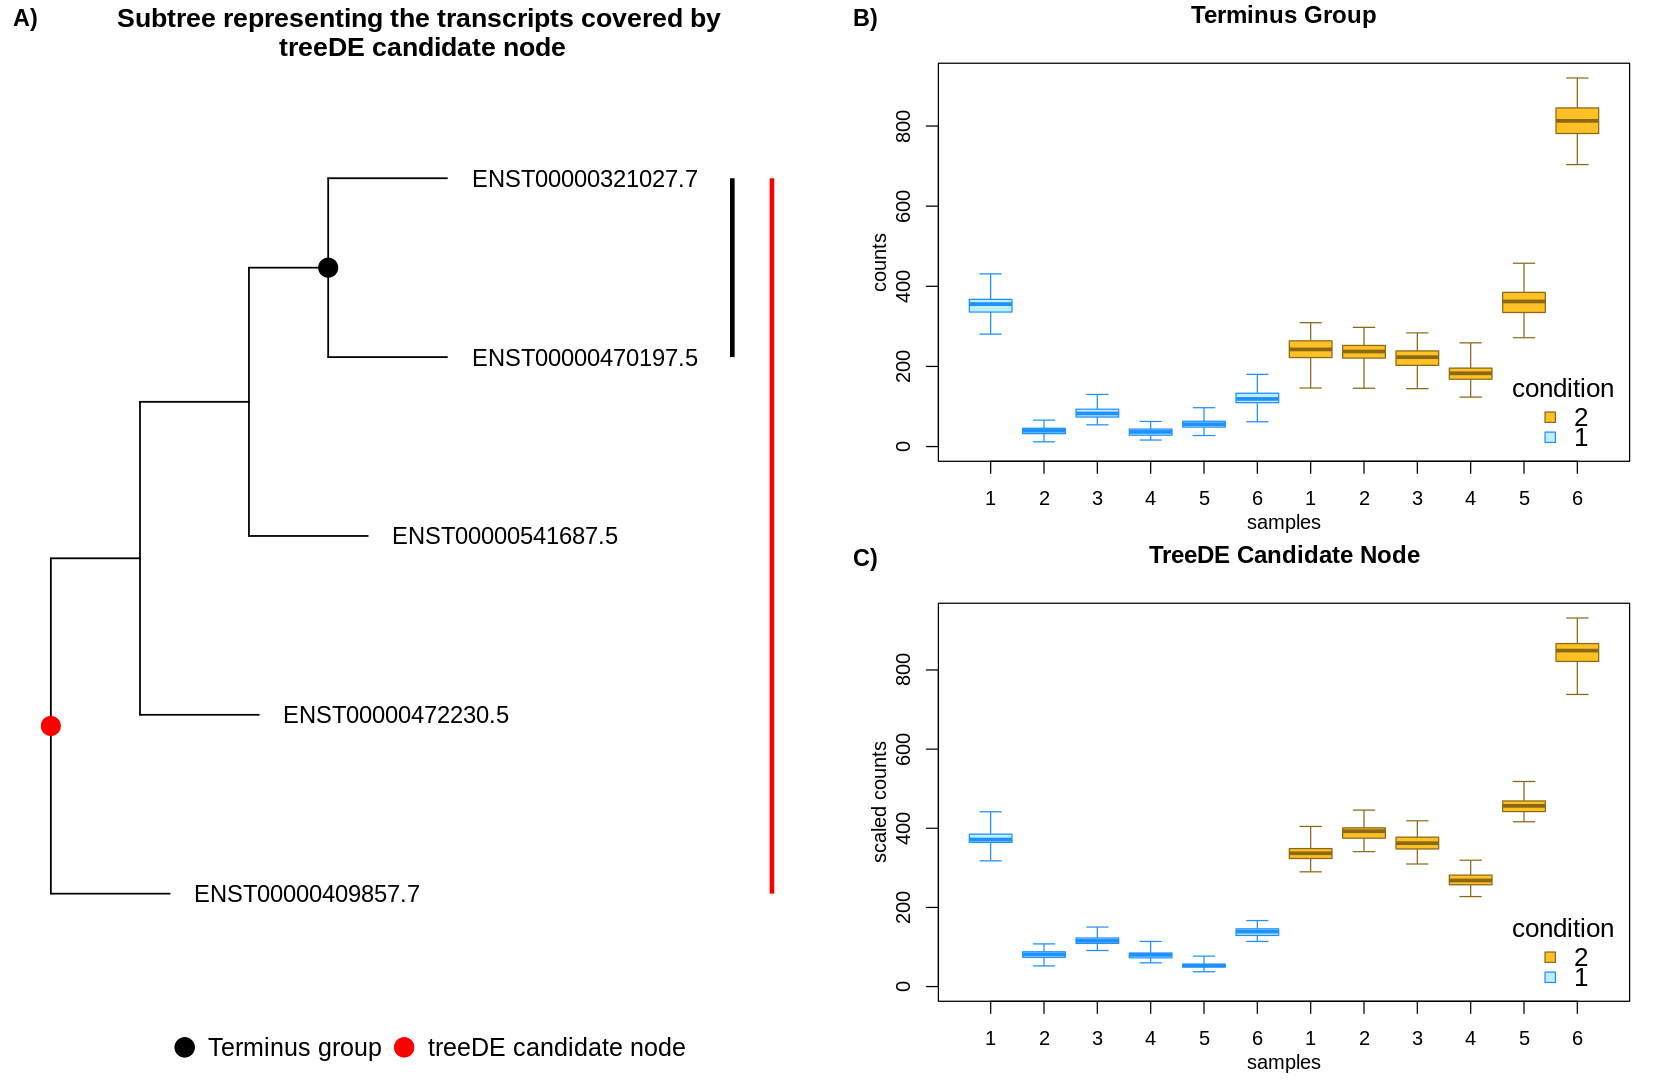

In [33]:
cNode <- 232463
tNode <- 462
treeCons$tip[groupsClust[[tNode]]]
treeCons$tip[Descendants(treeCons, cNode)[[1]]]

treeSub <- treeio::tree_subset(treeCons,cNode, levels_back = 0)
of=28
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \ntreeDE candidate node") +
    xlim(NA, 75) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==6), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==9), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 6, label = "", textcolour="red", 
                  barcolour="red", barsize=1.3, fontsize=5, offset = of+4) + 
    geom_cladelab(node = 9, label = "", textcolour="black",
                  fontsize=5, barsize=1.3, offset = of) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3, 
                       legendPos = "bottomright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "bottomright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] "ENST00000395556.6" "ENST00000356889.8"

[1] "ENST00000611938.4" "ENST00000617389.4" "ENST00000613602.3"
[4] "ENST00000615084.4" "ENST00000395556.6" "ENST00000356889.8"

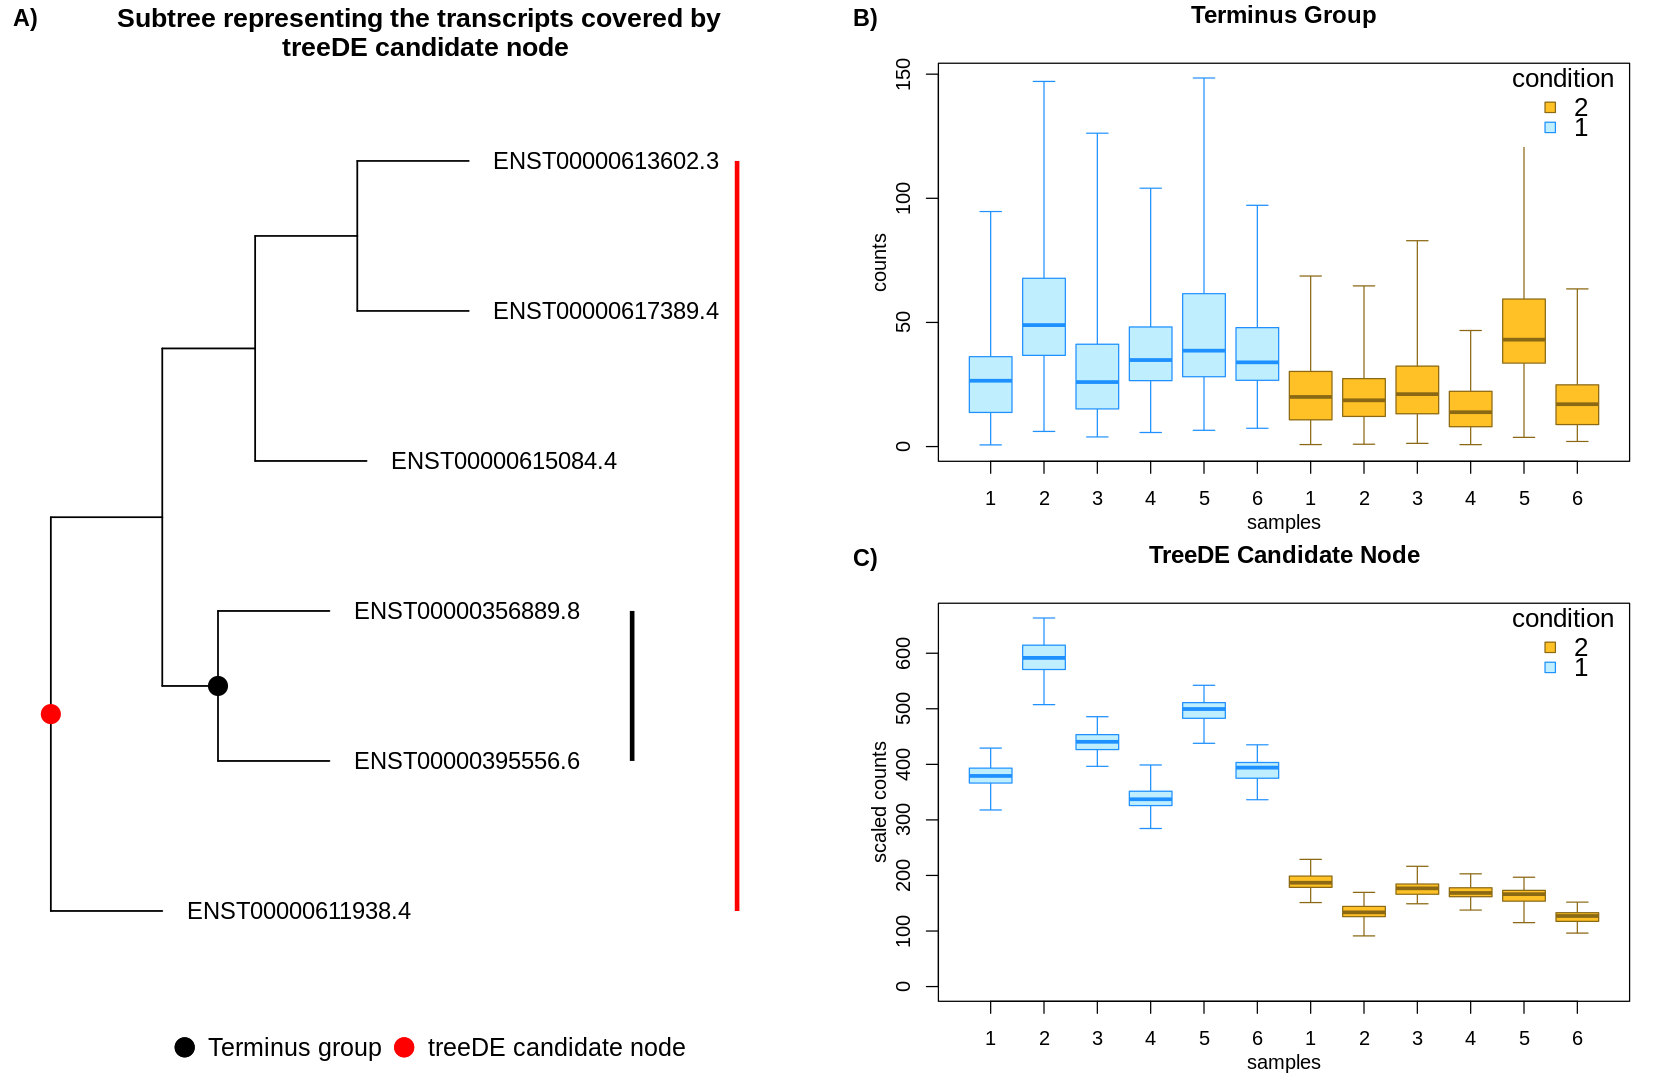

In [35]:
cNode <- 253911
tNode <- 1393
treeCons$tip[groupsClust[[tNode]]]
treeCons$tip[Descendants(treeCons, cNode)[[1]]]

treeSub <- treeio::tree_subset(treeCons,cNode, levels_back = 0)
of=28
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \n treeDE candidate node") +
    xlim(NA, 80) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==7), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==11), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 7, label = "", textcolour="red", 
                  barcolour="red", barsize=1.3, fontsize=5, offset = of) + 
    geom_cladelab(node = 11, label = "", textcolour="black",
                  fontsize=5, barsize=1.3, offset = of+4) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] "ENST00000361704.6" "ENST00000379632.6"

[1] "ENST00000342045.6" "ENST00000379624.5" "ENST00000379632.6"
[4] "ENST00000361704.6"

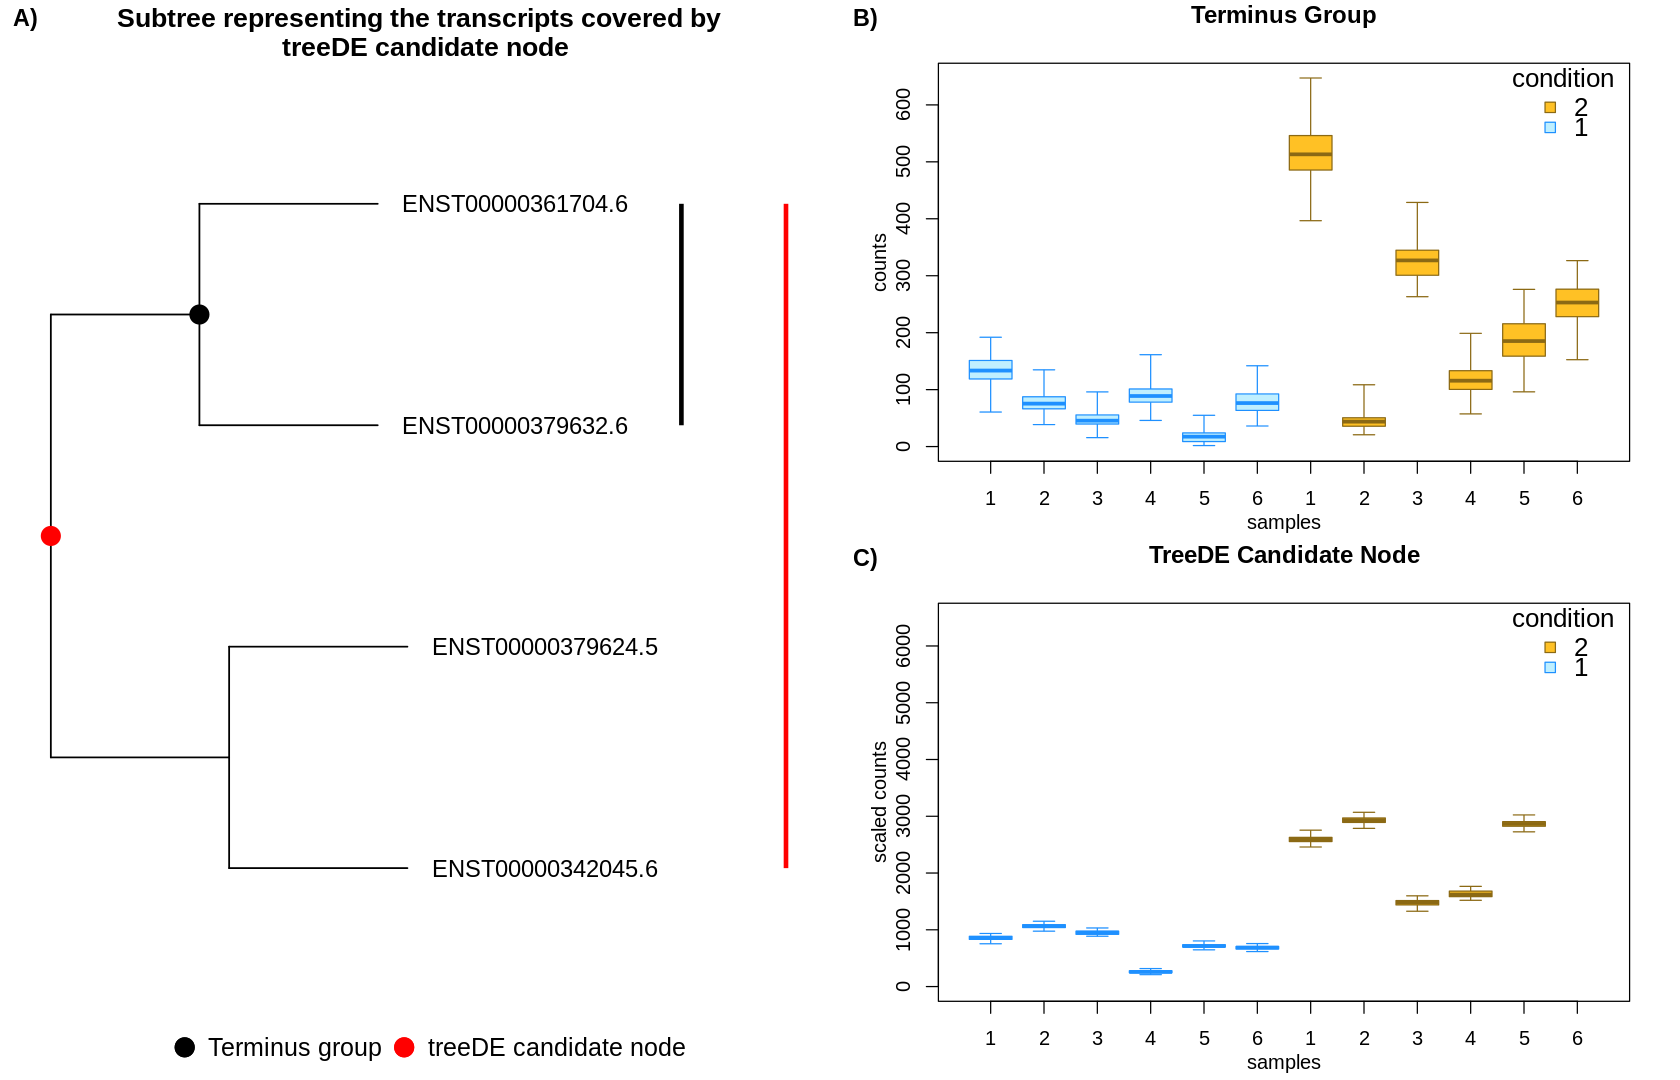

In [36]:
cNode <- 170334
tNode <- 400
treeCons$tip[groupsClust[[tNode]]]
treeCons$tip[Descendants(treeCons, cNode)[[1]]]

treeSub <- treeio::tree_subset(treeCons,cNode, levels_back = 0)
of=20
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \n treeDE candidate node") +
    xlim(NA, 50) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==5), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==7), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 5, label = "", textcolour="red", 
                  barcolour="red", barsize=1.3, fontsize=5, offset = of+5) + 
    geom_cladelab(node = 7, label = "", textcolour="black",
                  fontsize=5, barsize=1.3, offset = of) +
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Terminus group", "treeDE candidate node"),
           values=c("black","red"))

pTerm <- as.grob(~plotInfReps(yAggTermThrNS, as.character(l+tNode), x = "condition", legend = TRUE,
                       main="Terminus Group", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, cNode, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTerm, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

In [40]:
length(setdiff(trueTreeDE, txpsPlausOverAgg))
txpsUnderAgg <- setdiff(setdiff(trueTreeDE, txpsPlausOverAgg),rownames(y)[which(mcols(y)[["qvalue"]] <= 0.1)])
length(txpsUnderAgg)

[1] 421

[1] 381

In [69]:
l

[1] 138163

In [71]:
### treeDE nodes with not a single diff expressed underyling txp but
txpU <- c()
tInd <- match(txpsUnderAgg, treeCons$tip)
anc <- Ancestors(treeCons, tInd)
for(i in seq_along(tInd)) {
    print(i)
    sigT <- c(tInd[i], anc[[i]]) ## finding which one of ancestor or txp is a cand node
    sigT <- sigT[sigT %in% detNodes[["treeDEFDR_OL"]][[3]]]
    if(sigT > l) {
       treeSub <- treeio::tree_subset(treeCons, sigT, levels_back = 0)
        if(all(mcols(y)[treeSub$tip,"qvalue"] > 0.1, na.rm=T))
            txpU <- c(txpU, tInd[i])

    }
}
length(txpU)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

[1] 25

In [66]:
order(abs(mcols(y)[txpU,"log10mean"]), decreasing=TRUE)
length(txpU)

[1]  3 15 22 12  4 21  5 23 24 17  7 18  9  8 10  6  1 14 11 19 25 16 20  2 13

[1] 25

In [120]:
tInd <- txpU[2]
sigT <- c(tInd, Ancestors(treeCons, tInd)) ## finding which one of ancestor or txp is a cand node
sigT <- sigT[sigT %in% detNodes[["treeDEFDR_OL"]][[3]]]
treeSub <- treeio::tree_subset(treeCons, sigT, levels_back = 0)
treeSub
all(mcols(y)[treeSub$tip,"qvalue"] > 0.1, na.rm=T)


Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENST00000583120.1, ENST00000394642.7, ENST00000439138.5
Node labels:
  Node182989, Node182990

Rooted; includes branch lengths.

[1] FALSE

[1] "ENST00000598513.5"


Phylogenetic tree with 2 tips and 1 internal nodes.

Tip labels:
  ENST00000598513.5, ENST00000333952.8
Node labels:
  Node215928

Rooted; includes branch lengths.

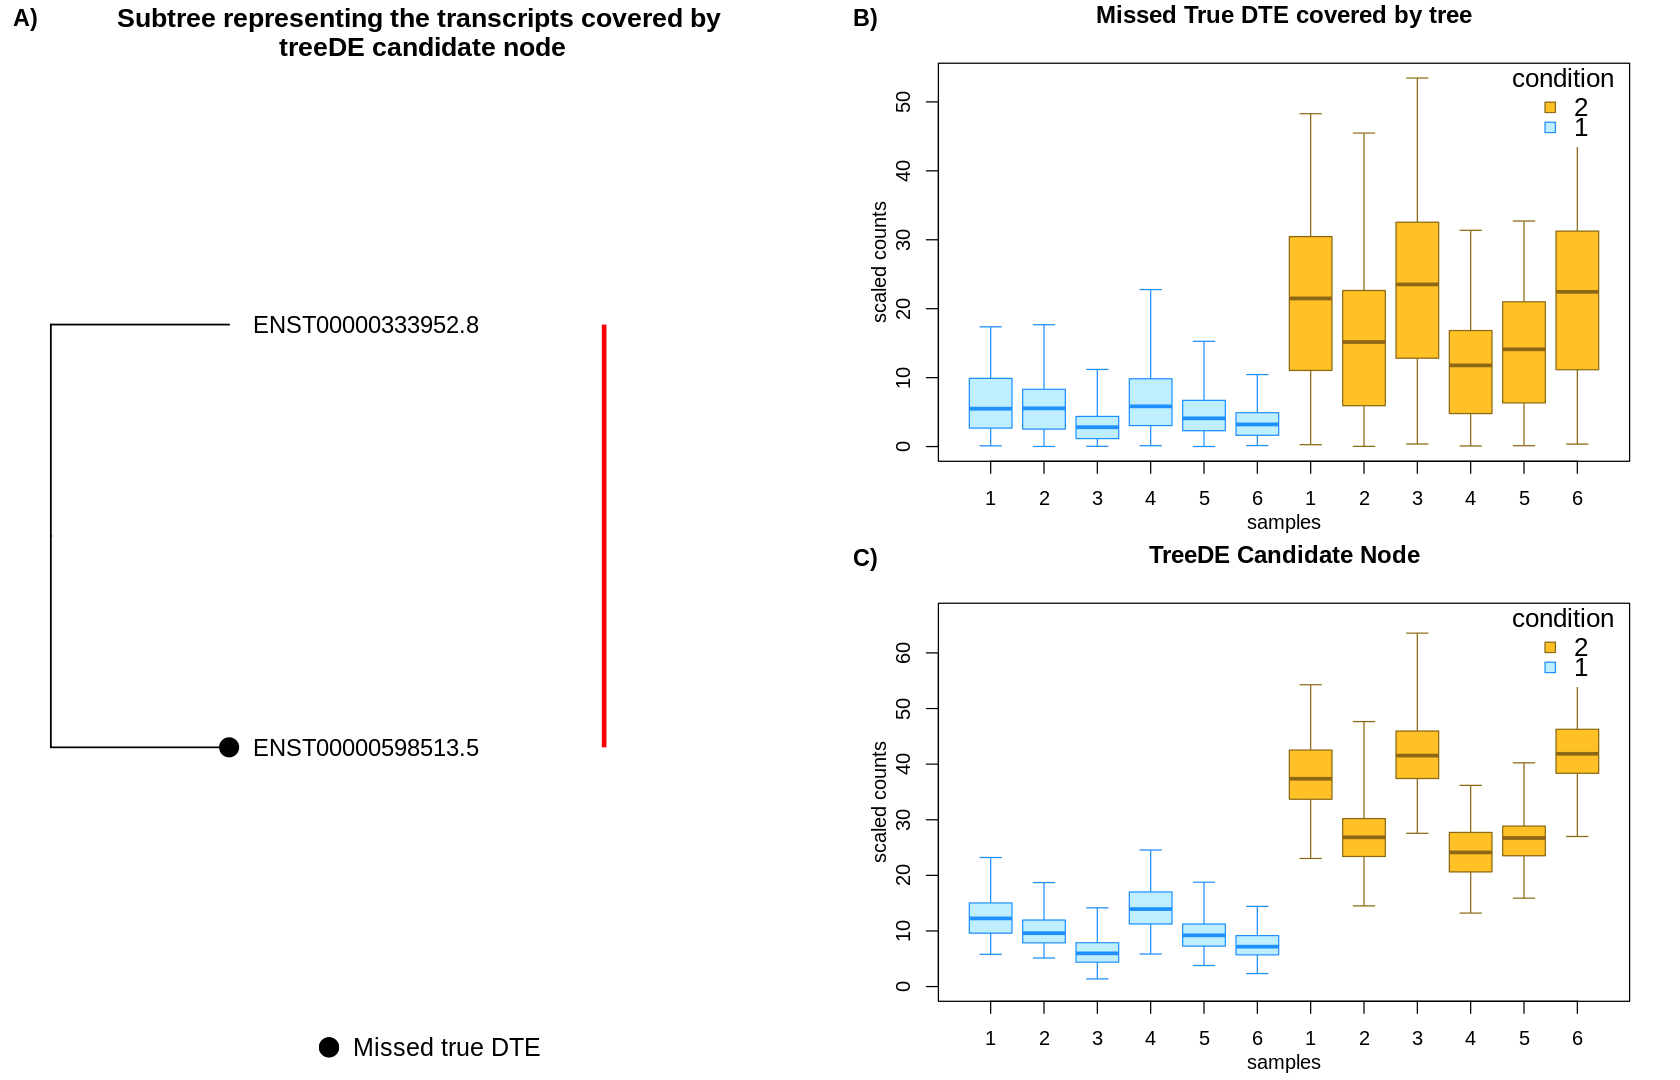

In [86]:
i <- 16
tInd <- txpU[i] ## index of txp
rownames(y)[tInd]
sigT <- c(tInd, Ancestors(treeCons, tInd)) ## finding which one of ancestor or txp is a cand node
sigT <- sigT[sigT %in% detNodes[["treeDEFDR_OL"]][[3]]]

treeSub <- treeio::tree_subset(treeCons, sigT, levels_back = 0)
treeSub
of=20
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \ntreeDE candidate node") +
    xlim(NA, 50) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==4), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==1), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 3, label = "", textcolour="red", 
                  barcolour="red", barsize=1.3, fontsize=5, offset = of+5) + 
    
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Missed true DTE", "treeDE candidate node"),
           values=c("black","red"))

pTxp <- as.grob(~plotInfReps(yA, tInd, x = "condition", legend = TRUE,
                       main="Missed True DTE covered by tree", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, sigT, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTxp, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] "ENST00000358025.7"


Phylogenetic tree with 2 tips and 1 internal nodes.

Tip labels:
  ENST00000358025.7, ENST00000344113.8
Node labels:
  Node166016

Rooted; includes branch lengths.

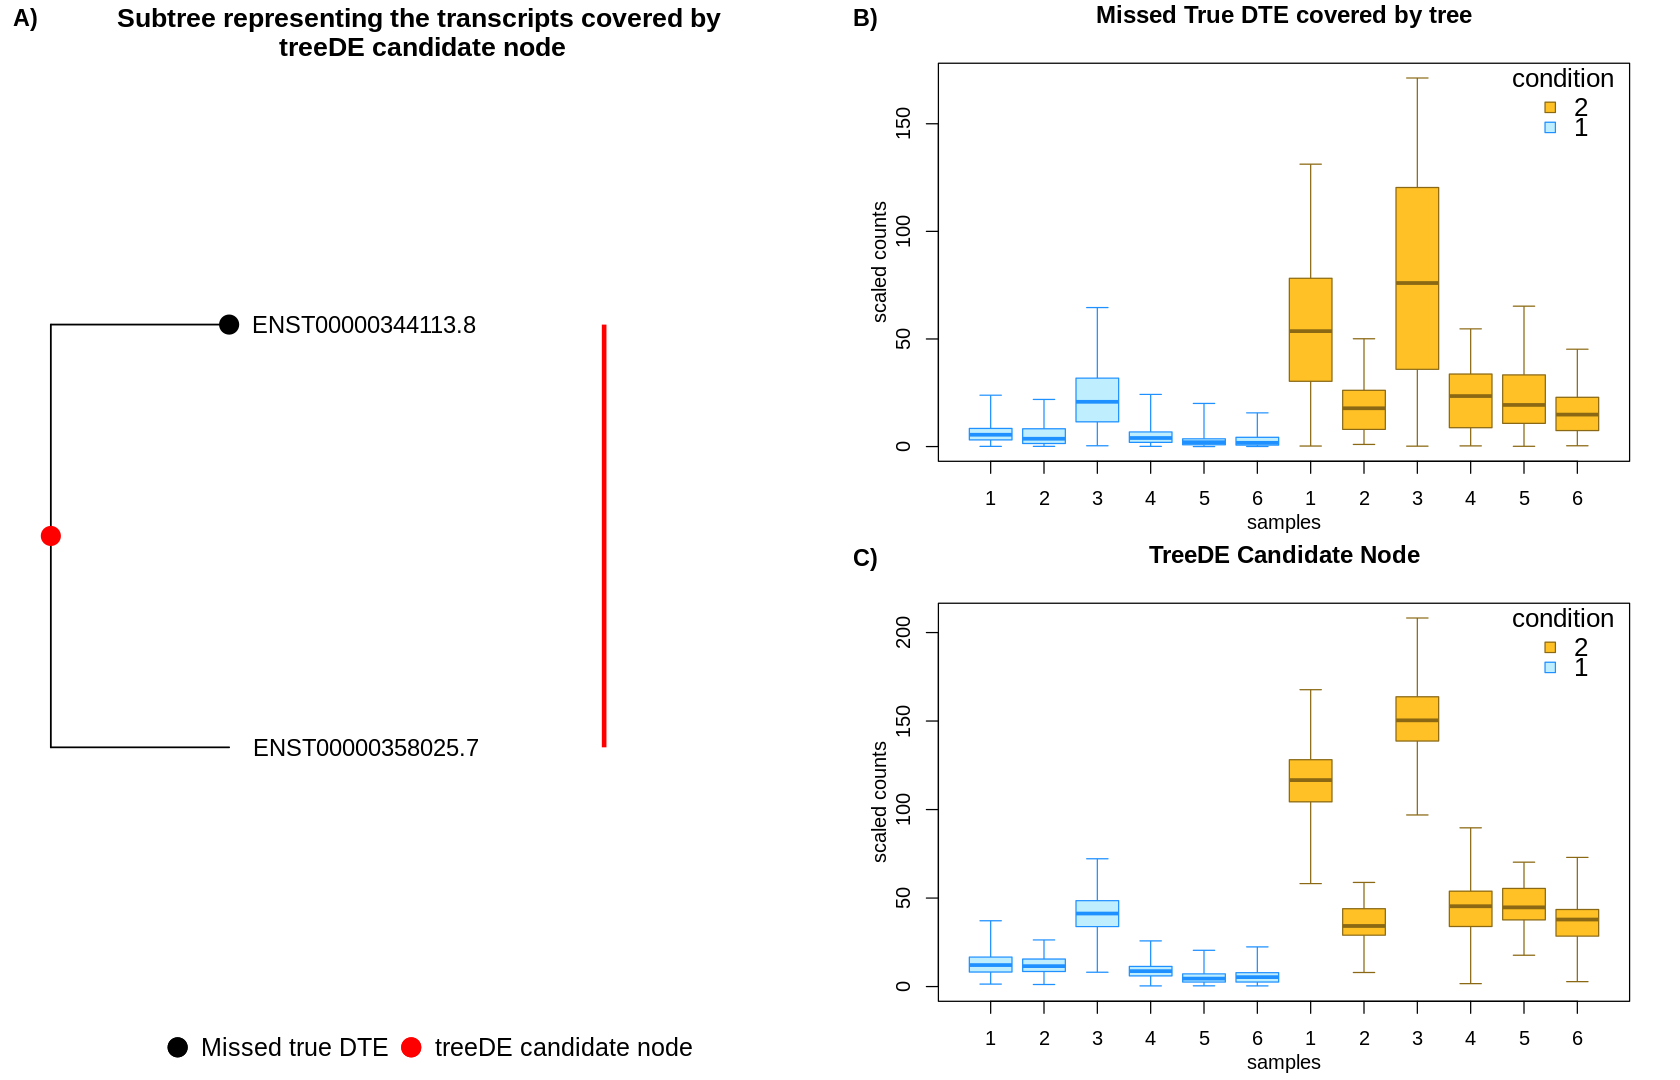

In [83]:
i <- 1
tInd <- txpU[i] ## index of txp
rownames(y)[tInd]
sigT <- c(tInd, Ancestors(treeCons, tInd)) ## finding which one of ancestor or txp is a cand node
sigT <- sigT[sigT %in% detNodes[["treeDEFDR_OL"]][[3]]]

treeSub <- treeio::tree_subset(treeCons, sigT, levels_back = 0)
treeSub
of=20
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \ntreeDE candidate node") +
    xlim(NA, 50) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==3), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==2), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 3, label = "", textcolour="red", 
                  barcolour="red", barsize=1.3, fontsize=5, offset = of+5) + 
    
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Missed true DTE", "treeDE candidate node"),
           values=c("black","red"))

pTxp <- as.grob(~plotInfReps(yA, tInd, x = "condition", legend = TRUE,
                       main="Missed True DTE covered by tree", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, sigT, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTxp, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

[1] "ENST00000189444.10"


Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENST00000369966.7, ENST00000189444.10, ENST00000428099.5
Node labels:
  Node143499, Node143500

Rooted; includes branch lengths.

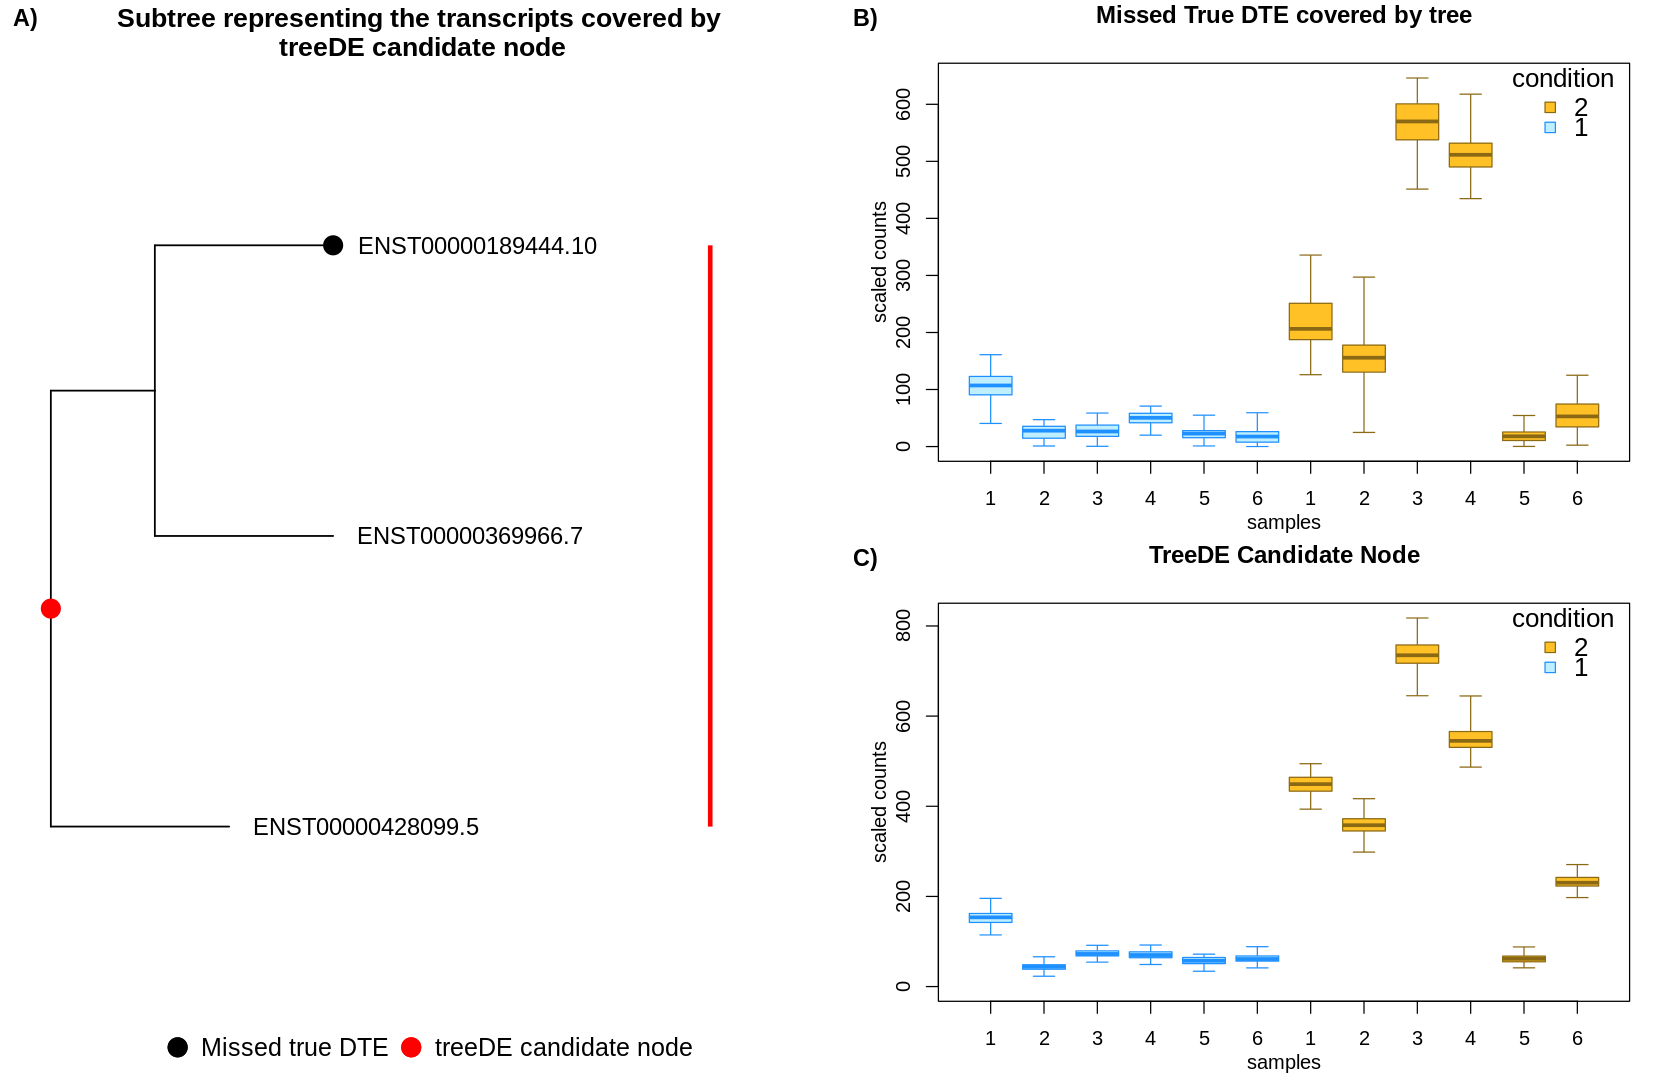

In [72]:
i <- 3
tInd <- txpU[i] ## index of txp
rownames(y)[tInd]
sigT <- c(tInd, Ancestors(treeCons, tInd)) ## finding which one of ancestor or txp is a cand node
sigT <- sigT[sigT %in% detNodes[["treeDEFDR_OL"]][[3]]]

treeSub <- treeio::tree_subset(treeCons, sigT, levels_back = 0)
treeSub
of=20
pTree <- ggtree(treeSub) + ggtitle("Subtree representing the transcripts covered by \ntreeDE candidate node") +
    xlim(NA, 50) +
    geom_tiplab(size=5, hjust = -0.1) +
    geom_point2(aes(subset=(node==4), color="red"), 
            size=5, fill='red', show.legend=T) +
    geom_point2(aes(subset=(node==2), color = "black"), 
            size=5, fill='black', show.legend=T) +
    geom_cladelab(node = 4, label = "", textcolour="red", 
                  barcolour="red", barsize=1.3, fontsize=5, offset = of+5) + 
    
    theme(legend.position = "bottom", legend.text=element_text(size=15),
         plot.title=element_text(size=16, face="bold", hjust=0.5)) +
    scale_color_manual(name = "", labels=c("Missed true DTE", "treeDE candidate node"),
           values=c("black","red"))

pTxp <- as.grob(~plotInfReps(yA, tInd, x = "condition", legend = TRUE,
                       main="Missed True DTE covered by tree", legendTitle=TRUE, legendCex=1.3,
                       legendPos = "topright"))
pTreeTerm <- as.grob(~plotInfReps(yA, sigT, x = "condition", legend=TRUE,
                              main="TreeDE Candidate Node", legendTitle=TRUE, legendCex=1.3,
                             legendPos = "topright"))
ggarrange(pTree, ggarrange(pTxp, pTreeTerm, ncol = 1, labels = c("B)", "C)")), labels="A)")

In [ ]:
assays(yA)[["counts"]][c()]

#### Height treeClimbR

In [20]:
table(node.depth(treeCons, 2)[detNodes$treeClimbR[[3]]])
table(node.depth(treeCons, 2)[detNodes[["treeDEFDR_OL"]][[3]]])


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2996  434  200  159  125   98   68   50   45   30   32   13   15   15    9    8 
  17   18   19   20   21   22   24   25   29 
   6    6    2    1    1    2    3    1    2 

#### treeClimbR vs treeDE

In [ ]:
t

In [33]:
setdiff(trueTreeDE)

[1] 0

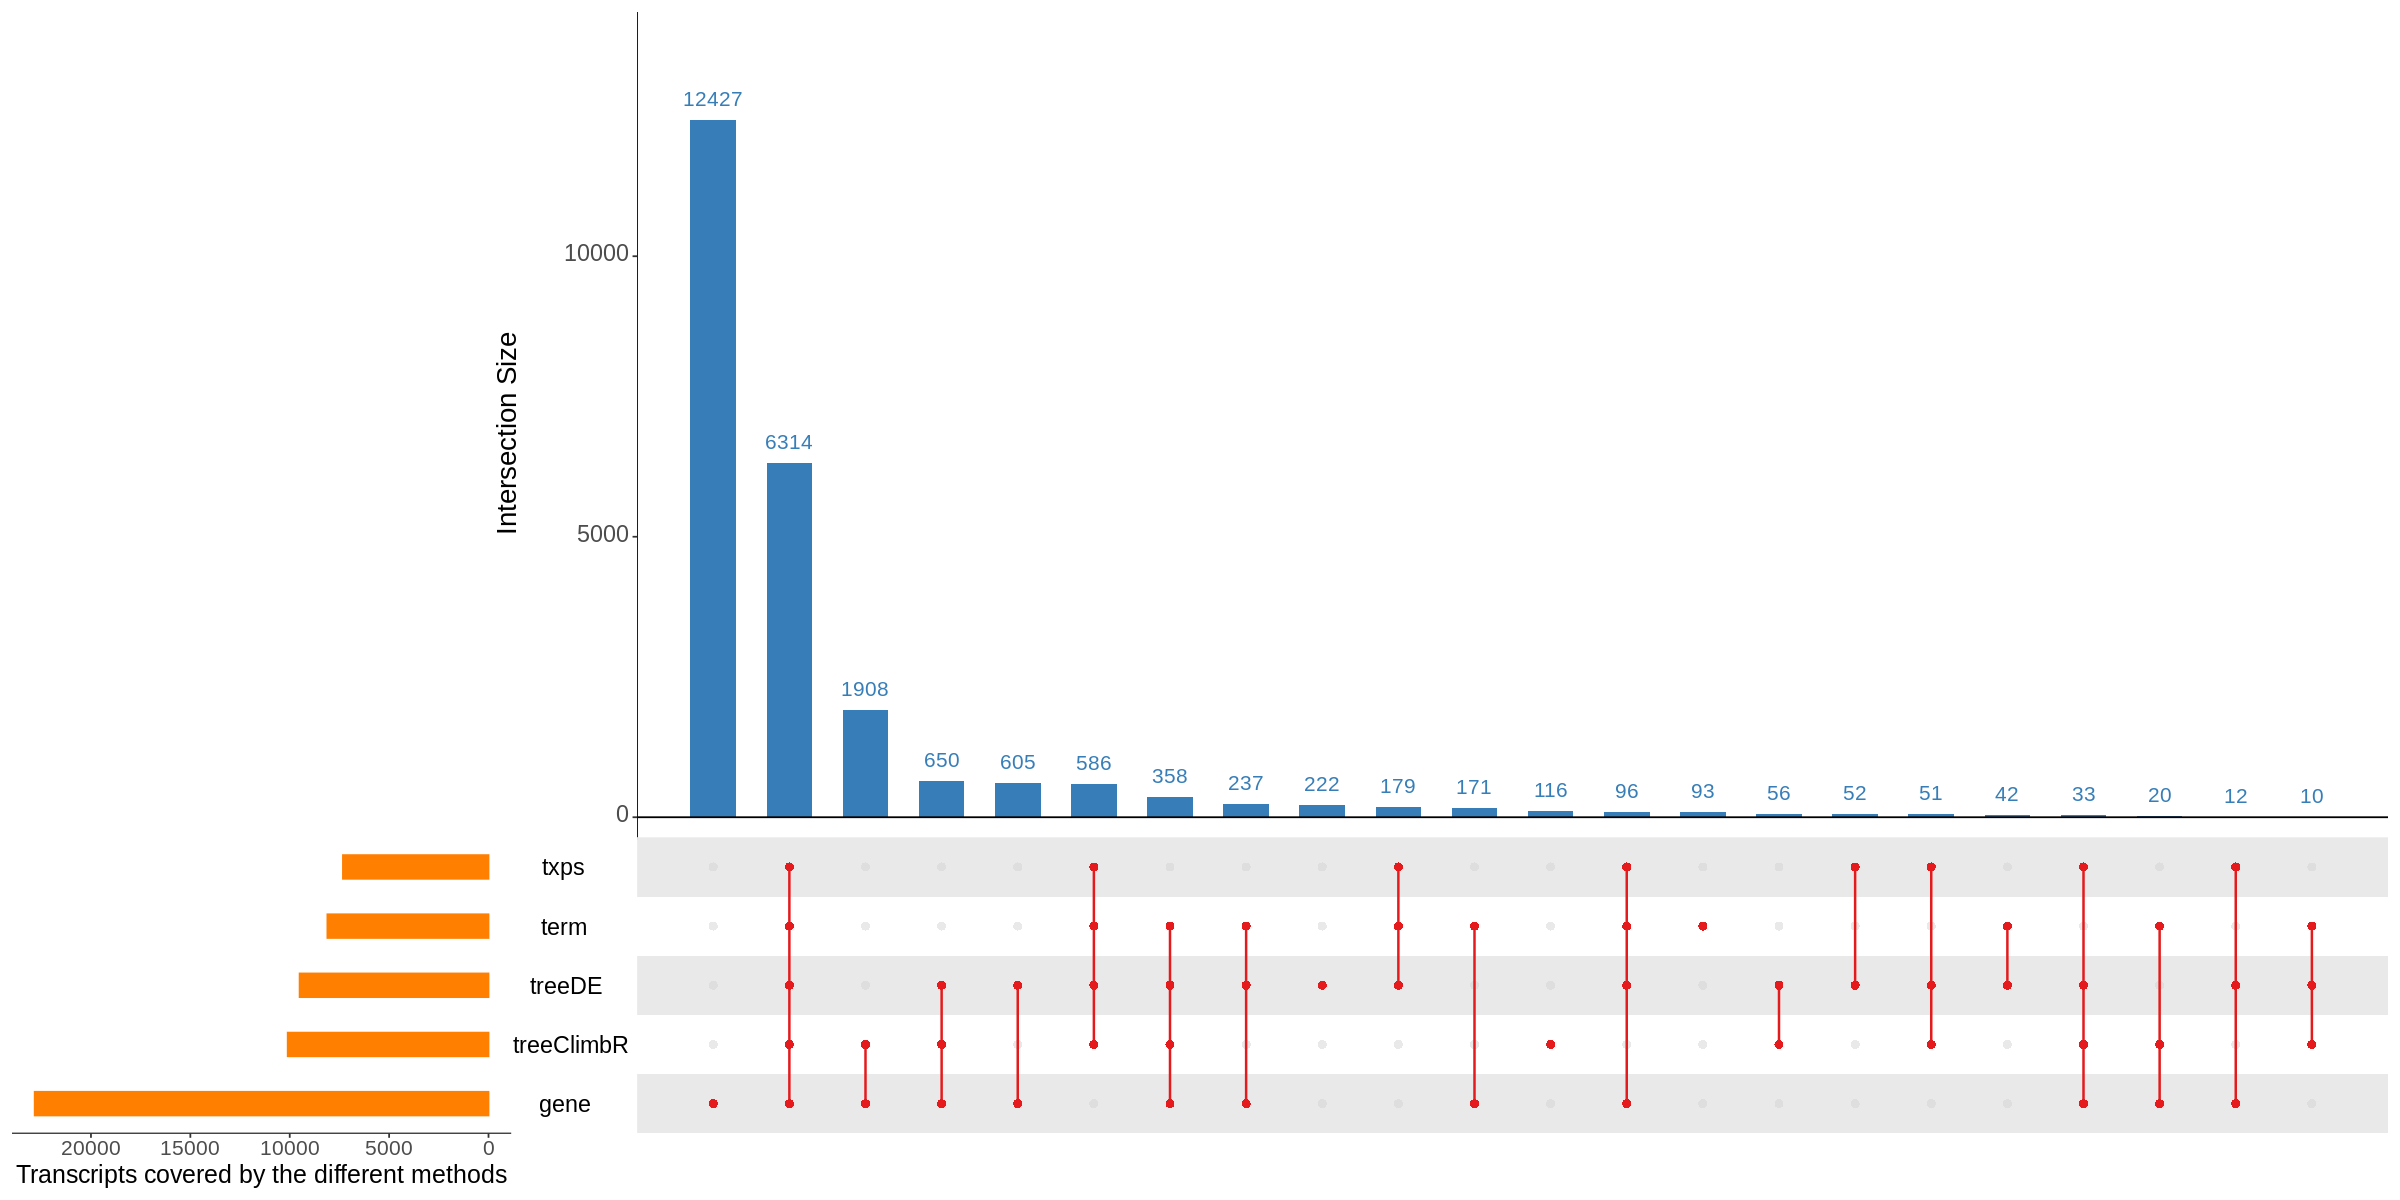

In [25]:
options(repr.plot.width=20, repr.plot.height=10)
suppressPackageStartupMessages(library(UpSetR))
txpMethods = list(txps = rownames(tseCons)[detNodes[[1]][[3]]], 
                 treeDE = treeDETxps, 
                 treeClimbR = treeClimbTxps, 
                 term = termTxps,
                 gene = dGETxps)
upsetData <- fromList(txpMethods)
size <- 2
upset(upsetData, order.by = "freq",
     main.bar.color = "#377eb8", 
     matrix.color = "#e41a1c",
     sets.bar.color = c("#ff7f00"),
     sets.x.label = "Transcripts covered by the different methods",
     shade.alpha = 0.7, 
     text.scale = c(size, size, 1.8, 1.8, size, size)
)



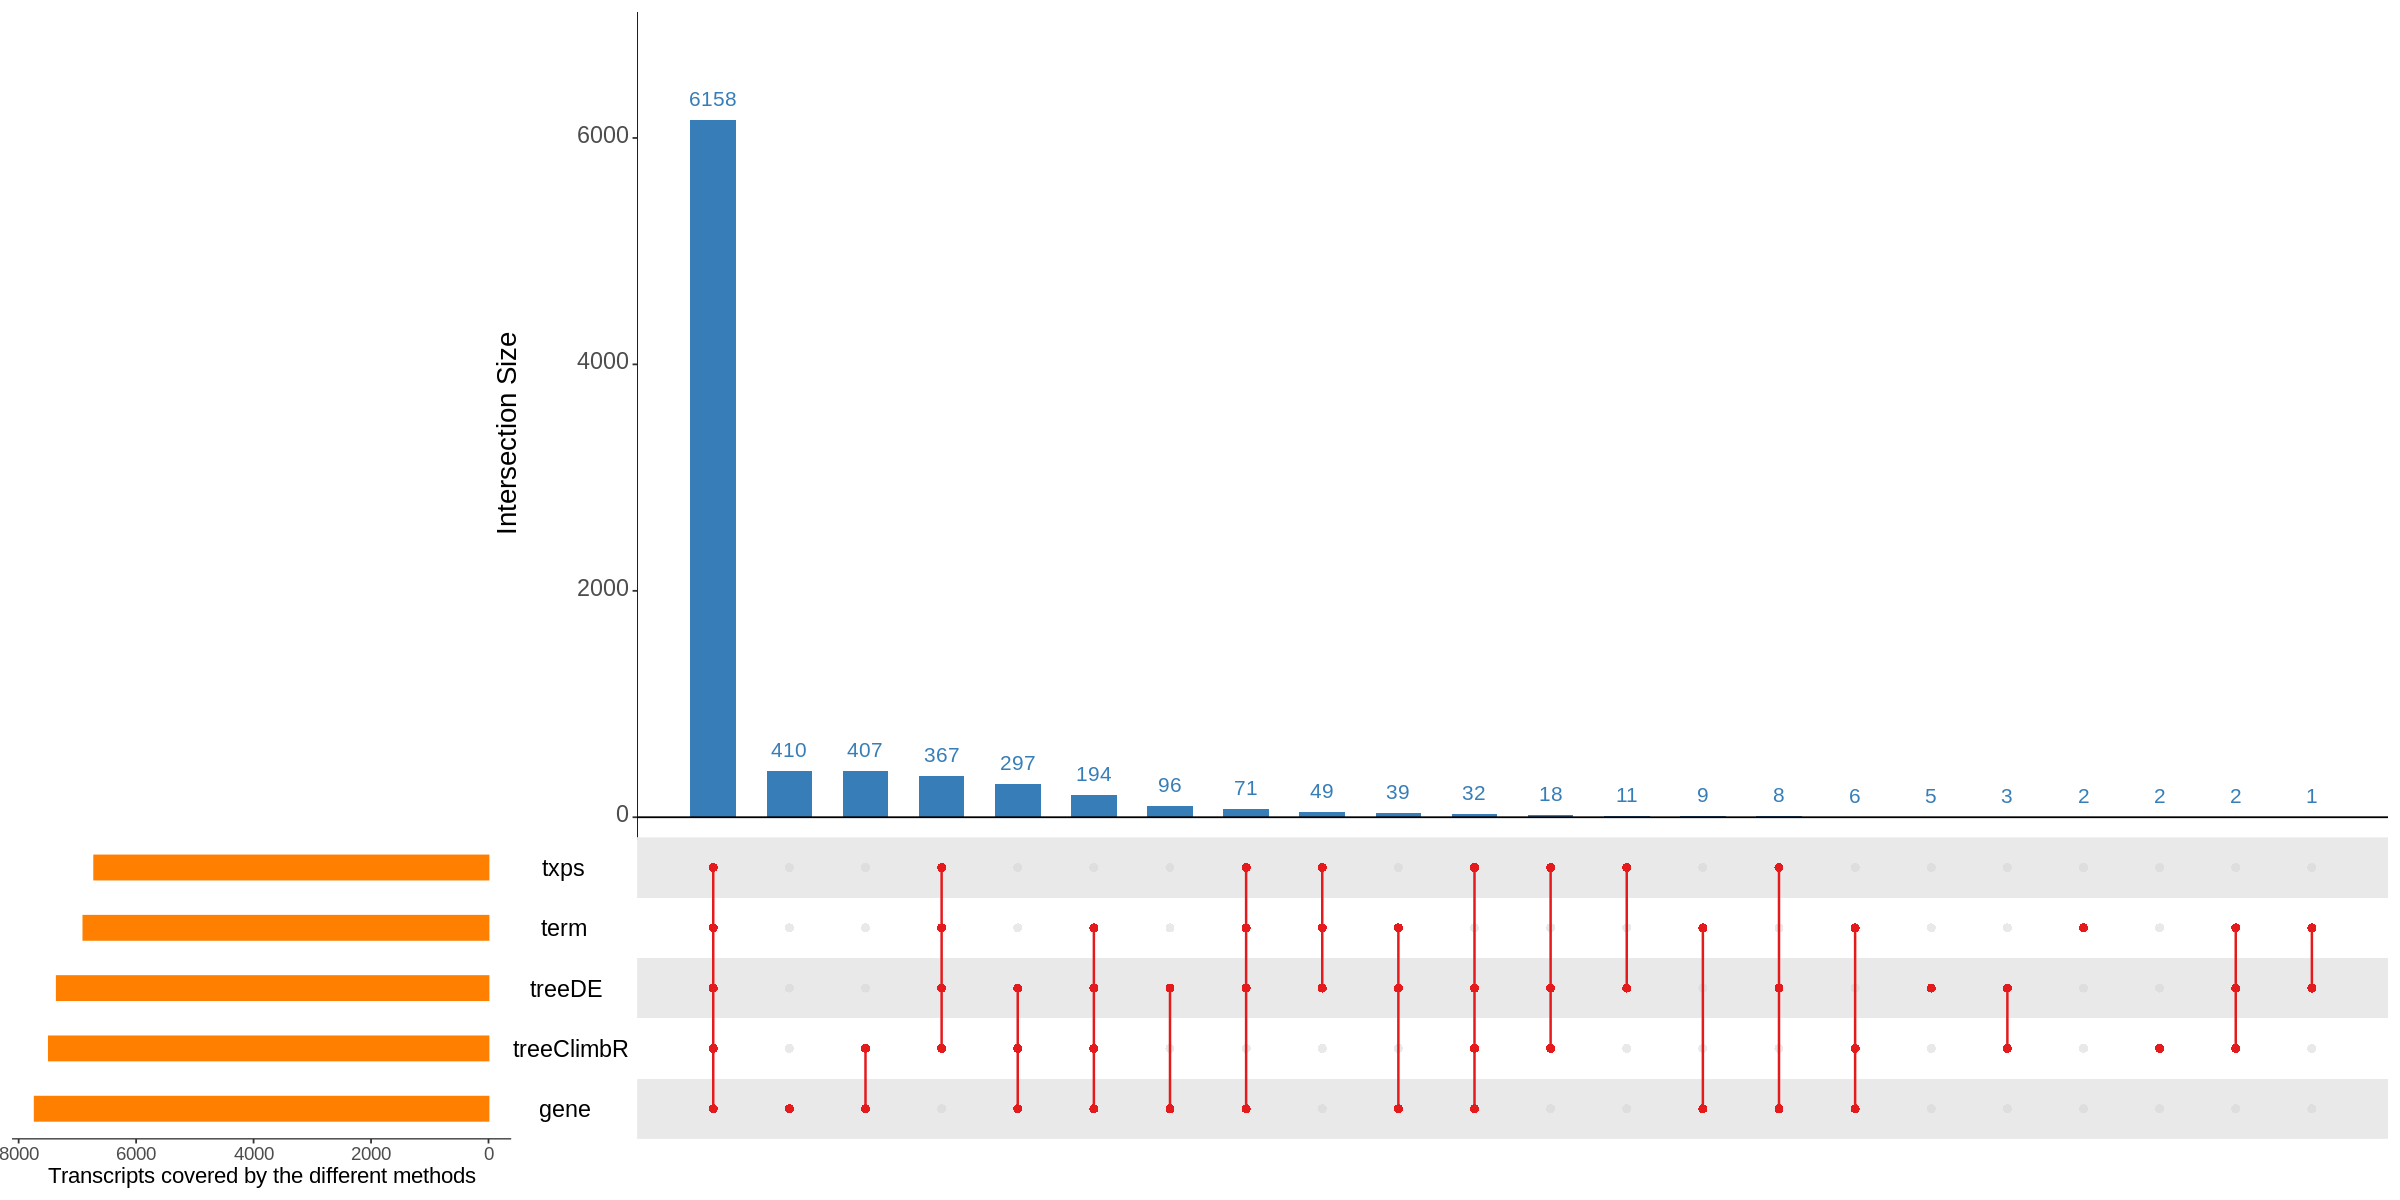

In [26]:
options(repr.plot.width=20, repr.plot.height=10)
suppressPackageStartupMessages(library(UpSetR))
txpMethods = lapply(list(txps = rownames(tseCons)[detNodes[[1]][[3]]], 
                 treeDE = treeDETxps, 
                 treeClimbR = treeClimbTxps, 
                 term = termTxps,
                 gene = dGETxps), function(nodes) intersect(nodes, dts))
upsetData <- fromList(txpMethods)
size <- 2
upset(upsetData, order.by = "freq",
     main.bar.color = "#377eb8", 
     matrix.color = "#e41a1c",
     sets.bar.color = c("#ff7f00"),
     sets.x.label = "Transcripts covered by the different methods",
     shade.alpha = 0.7, 
     text.scale = c(size, size, 1.6, 1.6, size, size)
)

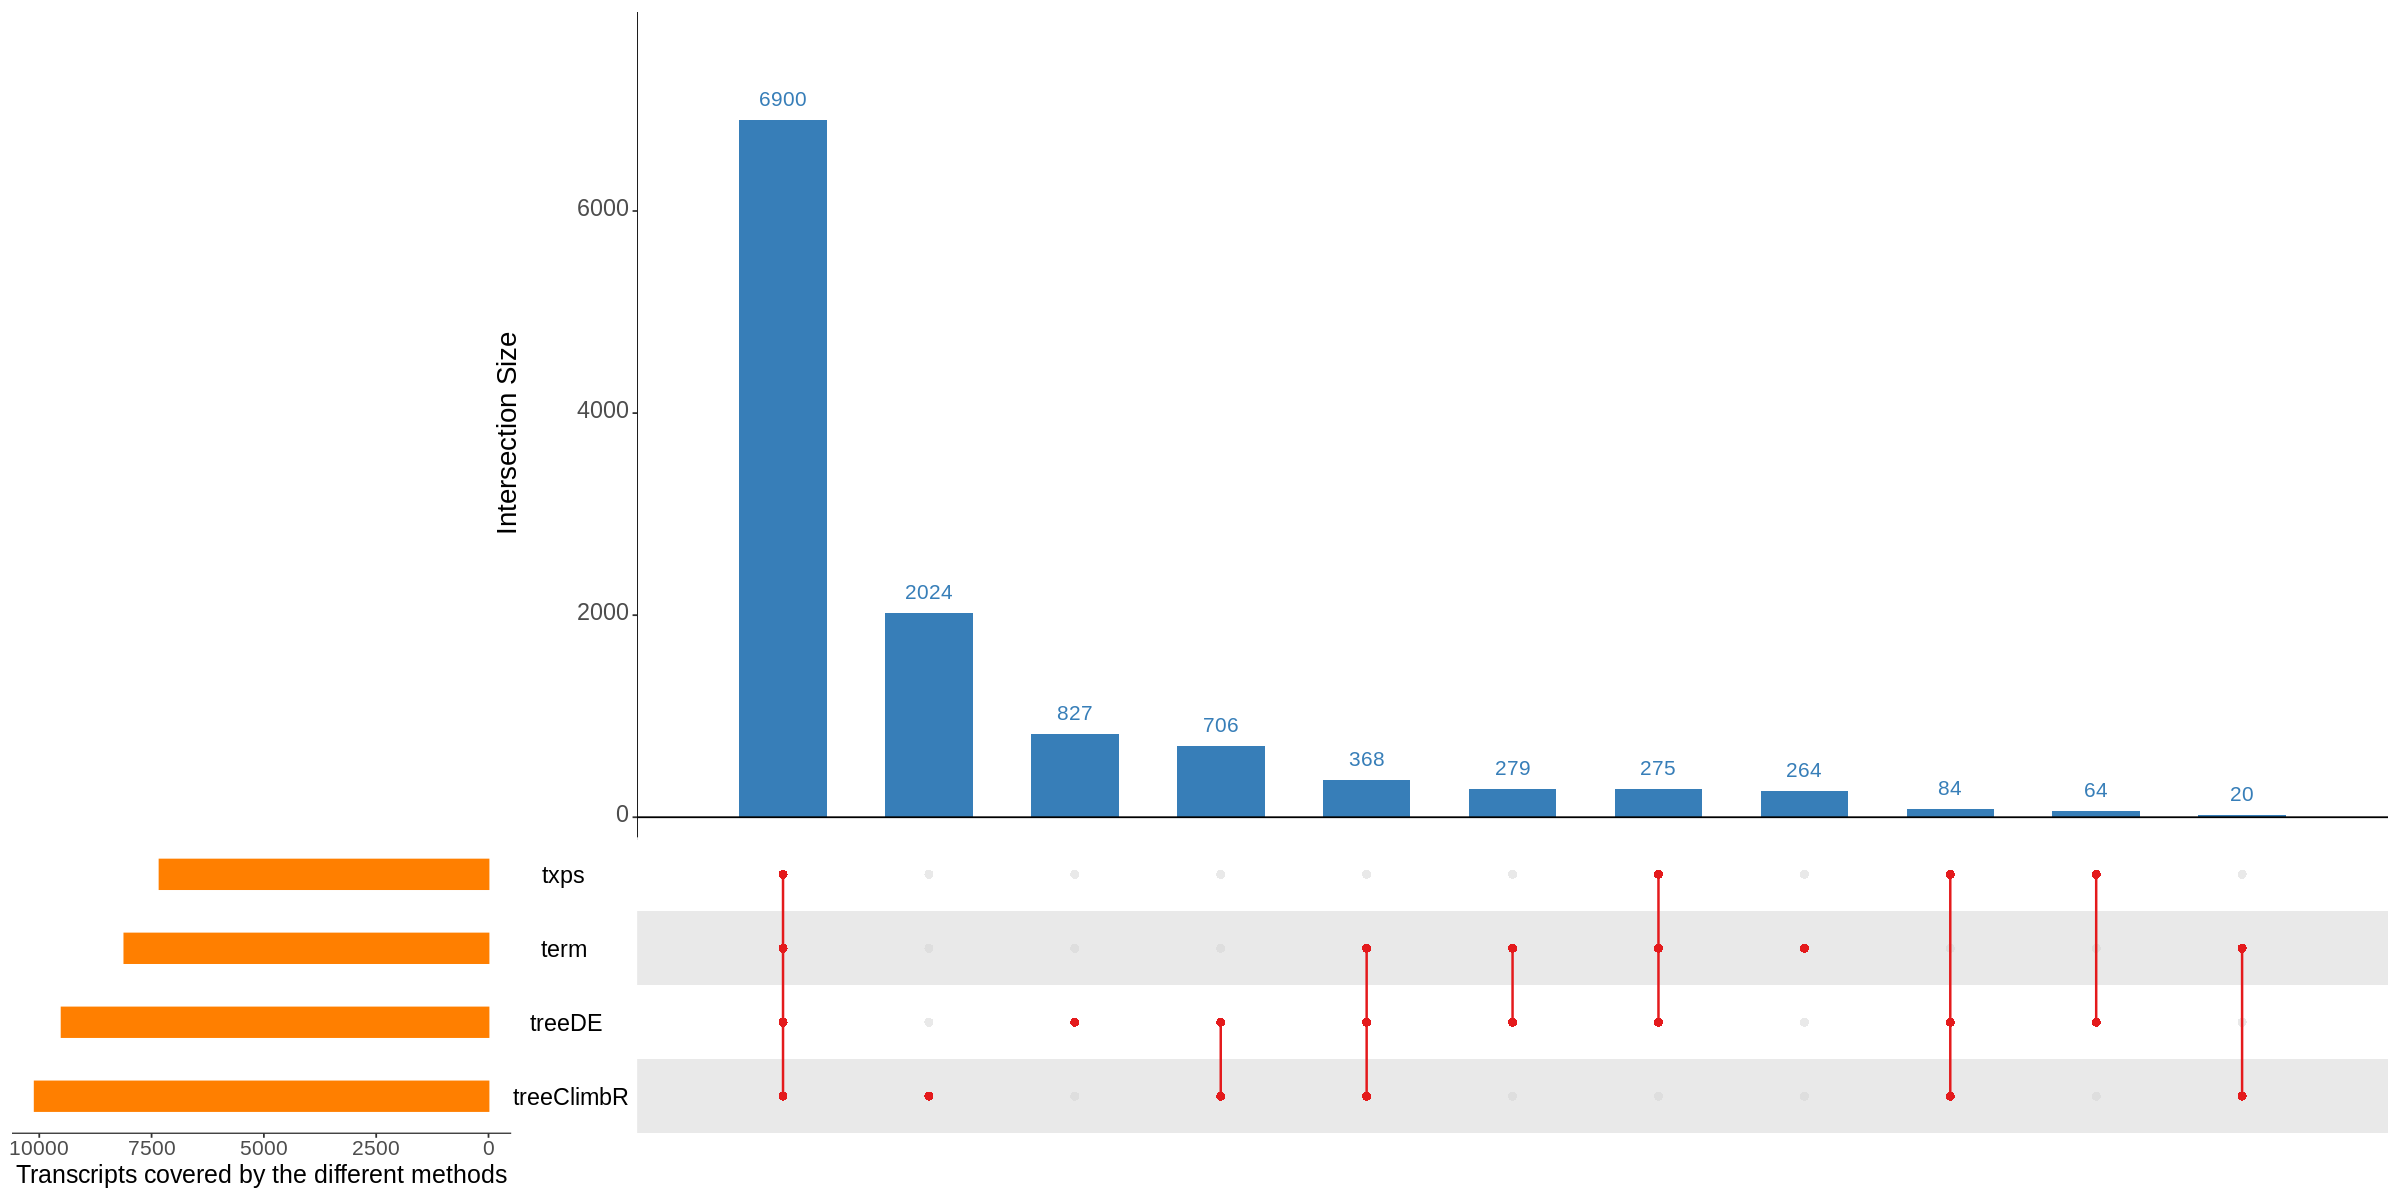

In [27]:
txpMethods = list(txps = rownames(tseCons)[detNodes[[1]][[3]]], 
                 treeDE = treeDETxps, 
                 treeClimbR = treeClimbTxps, 
                 term = termTxps)
upsetData <- fromList(txpMethods)
size <- 2
upset(upsetData, order.by = "freq",
     main.bar.color = "#377eb8", 
     matrix.color = "#e41a1c",
     sets.bar.color = c("#ff7f00"),
     sets.x.label = "Transcripts covered by the different methods",
     shade.alpha = 0.7, 
     text.scale = c(size, size, 1.8, 1.8, size, size)
)

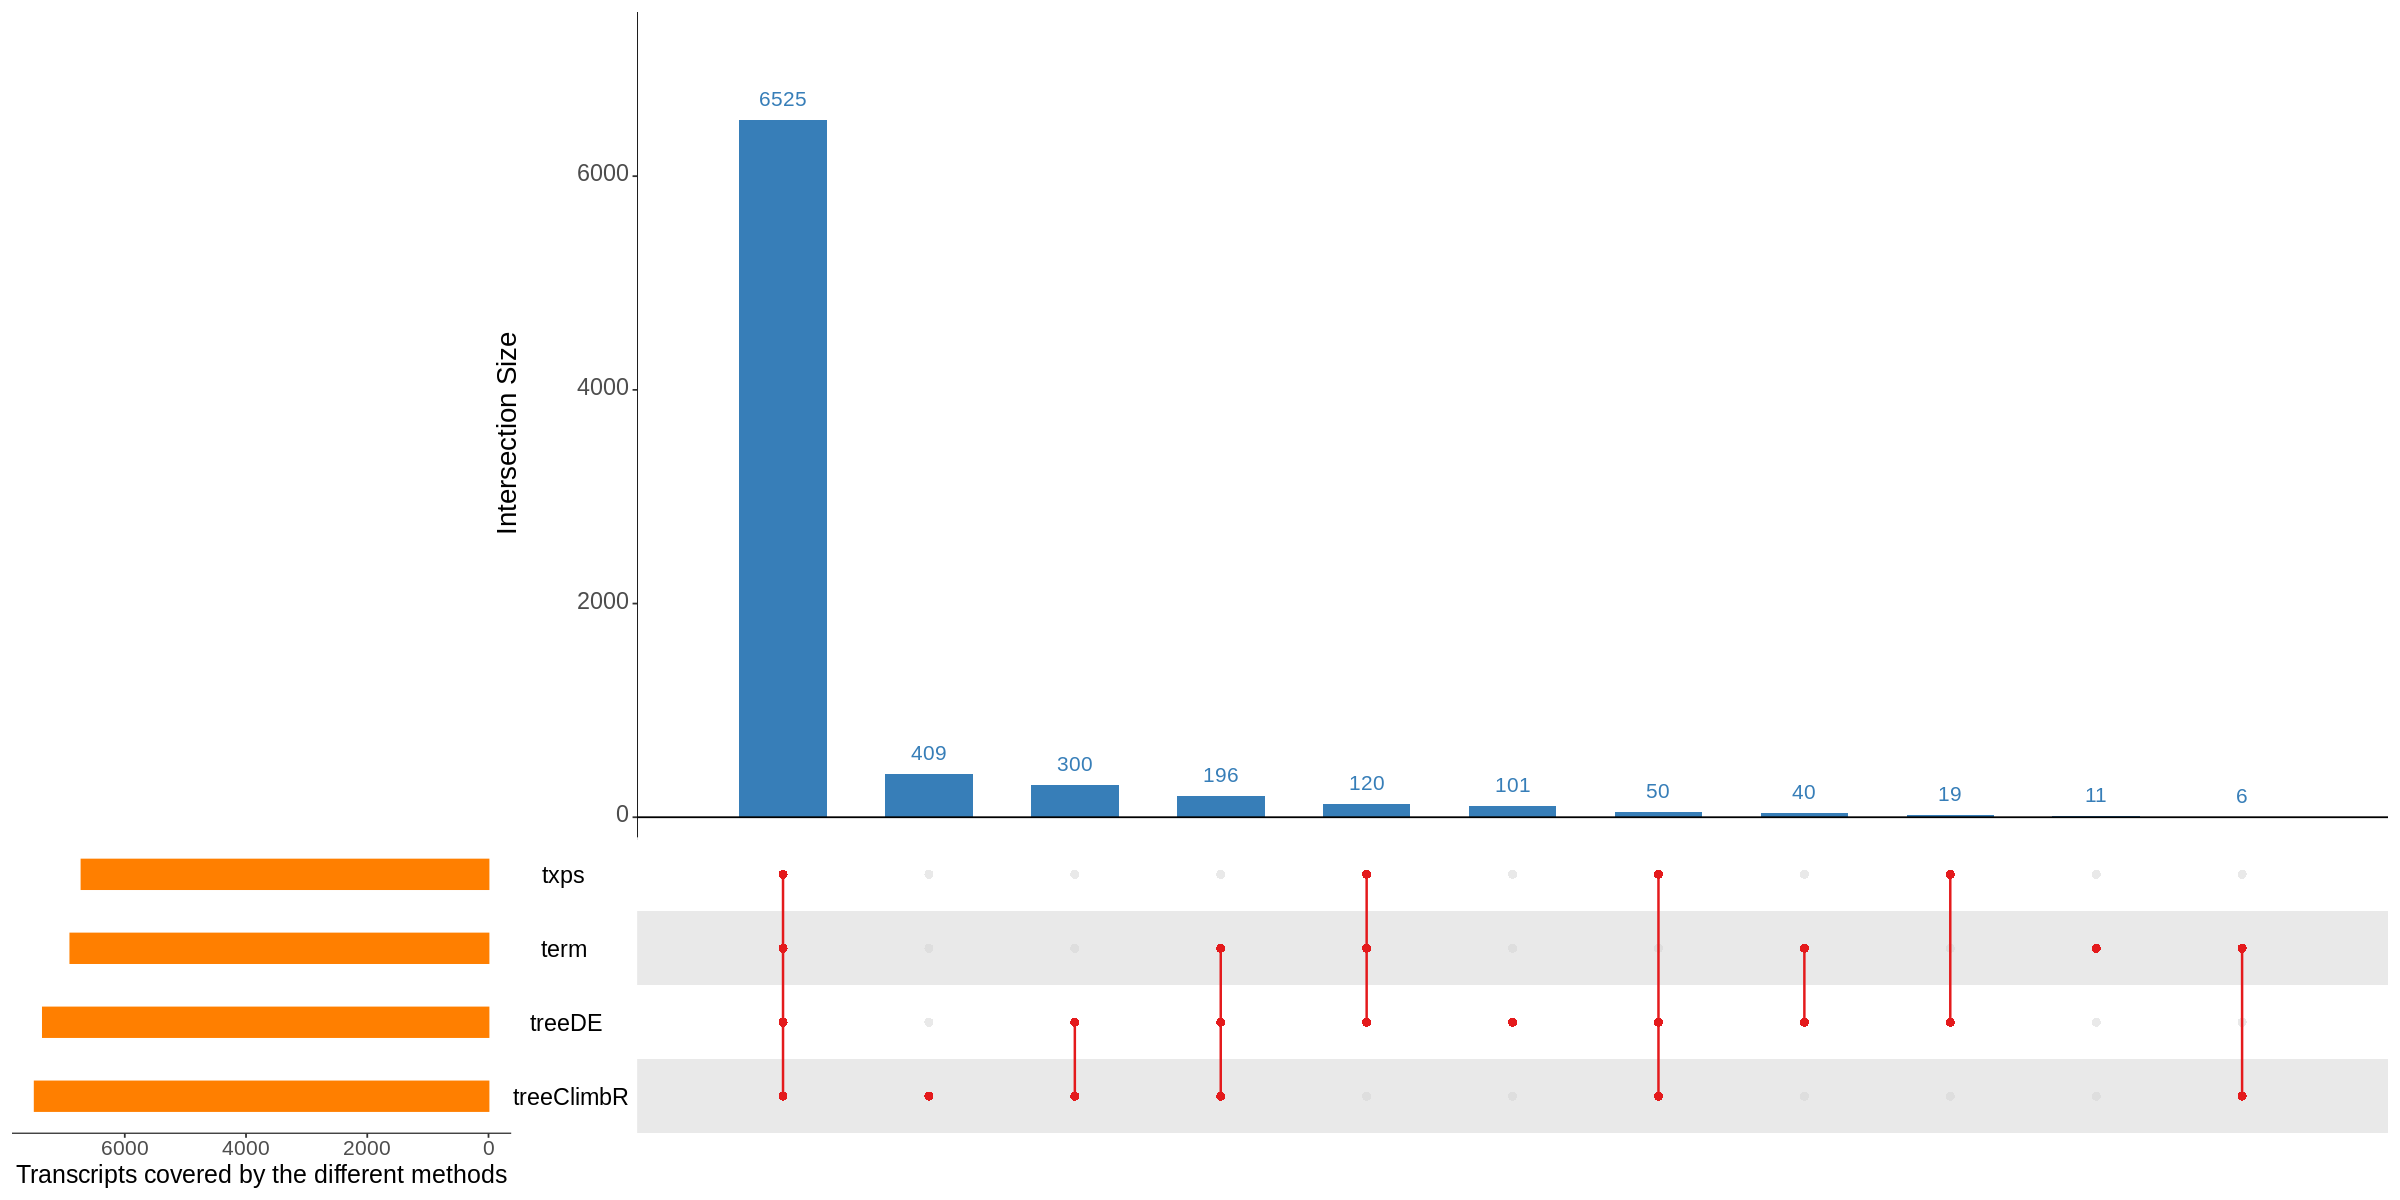

In [28]:
txpMethods = lapply(list(txps = rownames(tseCons)[detNodes[[1]][[3]]], 
                 treeDE = treeDETxps, 
                 treeClimbR = treeClimbTxps, 
                 term = termTxps), function(nodes) intersect(nodes, dts))
upsetData <- fromList(txpMethods)
size <- 2
upset(upsetData, order.by = "freq",
     main.bar.color = "#377eb8", 
     matrix.color = "#e41a1c",
     sets.bar.color = c("#ff7f00"),
     sets.x.label = "Transcripts covered by the different methods",
     shade.alpha = 0.7, 
     text.scale = c(size, size, 1.8, 1.8, size, size)
)

In [87]:
sapply(seq(3), function(i) table(node.depth(treeCons, 2)[detNodes$treeDEFDR_OL[[i]]]))
sapply(seq(3), function(i) table(node.depth(treeCons, 2)[detNodes$treeClimbR[[i]]]))

[[1]]

   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
4013  554  256  125   62   28   12    9    4    4    1    2    1    1 

[[2]]

   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
5186  626  283  129   61   31   11    8    6    4    2    1    1    1 

[[3]]

   1    2    3    4    5    6    7    8    9   10   11   12   13 
5904  654  286  136   61   28   10    8    7    5    2    3    1 


[[1]]

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2914  326  164  116   80   57   38   28   15   14   13    5    5    6    4    1 
  17   18   19 
   3    1    1 

[[2]]

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2941  379  176  140  117   73   52   50   40   26   29    8   12   14    7    4 
  17   18   19   20   21   24   25   29 
   4    3    2    1    1    2    1    2 

[[3]]

   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2996  434  200  159  125   98   68   50   45   30   32   13   15   15    9    8 
  17   18   19   20   21   22   24   25   29 
   6    6    2    1    1    2    3    1    2 


In [18]:
i <- 1
n <- "treeDEFDR_OL"
sum(detNodes[[n]][[i]] > l)
iNodes <- detNodes[[n]][[i]][detNodes[[n]][[i]] > l]
mean(abs(logFCNodes[iNodes]) <= rootFC)

sum(detNodes[[n]][[i]] <= l)
lNodes <- detNodes[[n]][[i]][detNodes[[n]][[i]] <= l]
mean(abs(logFCNodes[lNodes]) <= rootFC)

[1] 1059

[1] 0.005665722

[1] 4013

[1] 0.01146275

In [13]:
missP <- setdiff(unlist(Descendants(tree,detNodes[[3]][[2]])), detNodes[[1]][[2]])
missTP <- missP[abs(logFCNodes[missP]) > rootFC] ##True positive transcripts that have an internal node

missInTreeDE <- setdiff(detNodes[[1]][[2]], unlist(Descendants(tree,detNodes[[3]][[2]])))
missTPInTreeDE <- missInTreeDE[abs(logFCNodes[missInTreeDE]) > rootFC] ##True positive transcripts that have an internal node
sum(unique(unlist(Ancestors(tree, missTP))) %in% detNodes[[3]][[2]]) ### Nodes of these additional ancestors 

[1] 555

In [14]:
missP <- setdiff(unlist(Descendants(tree,detNodes[[3]][[2]])), detNodes[[1]][[2]])

In [15]:
length(missP)
length(missTP)
length(missInTreeDE)
length(missTPInTreeDE)

[1] 2219

[1] 790

[1] 284

[1] 204

#### Comparison with Terminus 
##### Total TP Transcripts, overaggregation and under-aggregation

#### Comparison with treeClimbR
##### Total TP Transcripts, Height of nodes in TCR, Things covered by TCR not covered by TreeTerminus, the other way around
##### 

#### Comparing TCR with treeClimbR

In [11]:
tcrTxps <- detNodes$treeClimbRO[[3]]
treeTermTxps <- unlist(Descendants(treeCons,detNodes$treeDEFDR_OL[[3]]))
tcrN <- detNodes$treeClimbR[[3]]
treeTermN <- detNodes$treeDEFDR_OL[[3]]
paste(length(tcrTxps), length(treeTermTxps))
paste(length(tcrN),length(treeTermN))

[1] "10102 9503"

[1] "4321 7105"

In [13]:
summary(log2(mcols(y)[treeTermTxps,"meanInfRV"]))
summary(log2(mcols(y)[tcrTxps,"meanInfRV"]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.3983 -1.6419  0.6018  0.2877  2.2687  9.0224 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-6.64386 -1.94801  0.13907 -0.04301  1.83721  9.02238 

In [12]:
paste("Common Node",sum(treeTermN %in% tcrN)) ##common nodes
remNodes <- setdiff(treeTermN, tcrN)
paste("Nodes unique to treeTerm",length(remNodes))

remTCR <- setdiff(tcrN, treeTermN)
paste("Nodes unique to treeClimbR", length(remTCR))

ancRem <- Ancestors(treeCons, remNodes)
treeDENodesAncTcr <- remNodes[sapply(ancRem, function(anc) sum(anc %in% tcrN) > 0)]
ancRemtreeDENodes <- sapply(ancRem[match(treeDENodesAncTcr, remNodes)], function(anc) anc[anc %in% tcrN])
paste("Unique nodes in treeTerm that have a node in tcr as an ancestor", length(treeDENodesAncTcr))
                             
ancRem <- Ancestors(treeCons, remTCR)
tcrNodesAncTreeDE <- remTCR[sapply(ancRem, function(anc) sum(anc %in% treeTermN) > 0)]
ancRemtcrNodes <- sapply(ancRem[match(tcrNodesAncTreeDE, remTCR)], function(anc) anc[anc %in% treeTermN])
paste("Unique nodes in tcr that have a node in treeTerm as an ancestor", length(tcrNodesAncTreeDE)) ## Ancestors in treeDE (overaggregation here)
# for(i in seq_along(ancReminTcr)) {
    
# }
### From here we go ahead and take the common ancestors, make a statement of over-aggreagtion, look at the cases unique to tcr and treede

[1] "Common Node 2724"

[1] "Nodes unique to treeTerm 4381"

[1] "Nodes unique to treeClimbR 1597"

[1] "Unique nodes in treeTerm that have a node in tcr as an ancestor 3502"

[1] "Unique nodes in tcr that have a node in treeTerm as an ancestor 522"

In [14]:
### The number of ancestors that are shared among these nodes
### Clearly terminus nodes share many ancestors in treeClimbR
table(table(ancRemtcrNodes)) ## Distribution of the  ancestors in treeDE that have descendants in tcr
table(table(ancRemtreeDENodes))
table(node.depth(treeCons,2)[unique(ancRemtreeDENodes)]) ## Summary of the depth
table(node.depth(treeCons,2)[unique(ancRemtcrNodes)])


  1   2   3 
479  14   5 


  1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  18  20 
135 375 205 131  96  44  35  23   8   6   6   1   2   1   1   1   1 


  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
246 164 141 119  96  65  49  45  30  32  13  15  15   9   8   6   6   2   1   1 
 22  24  25  29 
  2   3   1   2 


  2   3   4   5   6   7   8   9  10  11  12 
256 124  57  29  13   6   3   4   4   1   1 

#### Unique nodes belonging to treeClimbR

##### Nodes that have an ancestor in treeTerm

In [19]:
i <- 8
k <- 4
desc <- Descendants(treeCons,ancRemtcrNodes[i+1:k],"all")
for(j in seq(k))
    print(mcols(yA)[c(ancRemtcrNodes[i+j],desc[[j]]),])

mcols(yA)[tcrNodesAncTreeDE[i+1:k],]

DataFrame with 3 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
Node138681         0.118747   3.01685 8.90004e-08
ENST00000399794.6 23.018751   2.16272 5.23452e-01
ENST00000321792.5  3.907164   2.95103 1.61574e-07
DataFrame with 7 rows and 3 columns
                   meanInfRV log10mean     pvalue
                   <numeric> <numeric>  <numeric>
Node138897          0.392402   1.95499 0.01133162
ENST00000354919.10  1.743805   1.28112 0.00547559
Node138898          0.618295   1.85077 0.52792949
Node138899          0.815196   1.77810 0.28423713
ENST00000378325.7   1.484522   1.07311 0.75640028
ENST00000378331.5   3.454333   1.66661 0.24277682
ENST00000313519.9   7.171265   1.16375         NA
DataFrame with 3 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
Node139122         0.140214   2.38420 8.90004e-08
ENST00000312026.5  0.439590   2.36403 1.61

DataFrame with 4 rows and 3 columns
                   meanInfRV log10mean      pvalue
                   <numeric> <numeric>   <numeric>
ENST00000321792.5    3.90716   2.95103 1.61574e-07
ENST00000354919.10   1.74380   1.28112 5.47559e-03
ENST00000312026.5    0.43959   2.36403 1.61574e-07
ENST00000253024.9    5.34263   3.19270 1.61574e-07

In [36]:
tt <- tcrNodesAncTreeDE[tcrNodesAncTreeDE <= l] ## Nodes that are leaves
at <- ancRemtcrNodes[tcrNodesAncTreeDE <= l]
length(tt)
node.depth(treeCons,2)[at]

i <- 48
k <- 4
desc <- Descendants(treeCons,at[i+1:k],"all")
for(j in seq(k))
    print(mcols(yA)[c(at[i+j],desc[[j]]),])

mcols(yA)[tt[i+1:k],]

[1] 429

[1]  2  3  2  2  2  2  4  2  2  4  2  4  4  2  3  2  2  3  2  2  4  5  2  2  2
 [26]  2  3  2  2  2  3  2  2  2  2  2  2  2  2  2  3  2  3  2  2  4  2  3  2  2
 [51]  2 10  2  2  4  2  2  7  7  2  2  2  2  4  4  2  2  3  3  2  2  4  2  5  2
 [76]  2  2  4 12 12  2  4  2  3  2  3  2  4  4  2  3  2  5  2  2  2  2  2  7  2
[101]  3  2  4  2  2  2  2  2  2  2  5  5  2  2  3  2  2  2  3  2  3  2  2  2  3
[126]  5  3  3  4  2  2  3  2  4  2  2  2  2  2  2  2  2  2  2  2  3  2  2  3  2
[151]  2  2  2  5  2  2  4  3  2  7  2  2  3  3  3  2  2  3  3  3  2  2  3  2  3
[176]  3  2  3  4  2  2  3  2  6  6  2  2  2  2  3  8  3  2  2  3  2  2  2  3  2
[201]  2  2  2  2  2  2  2  2  2  2  3  2  2  3  5  5  2  3  3  3  2  2  2  2  2
[226]  2  2  2  3  2  3  2  2  3  5  4  4  4  3  3  2  2  2  2  6  2  2  2  3  3
[251]  2  2  2  2 10  4  2  3  2  3  3  2  5  5  5  2  2  2  2  2  2  2  2  4  2
[276]  2  3  2  2  2  5  2  2  2  2  4  3  4  3  2  2  3  2  2  2  2  2  2  2  2
[301]  2  2  2  3  6  2  4  3  2  2  5  2  2  3  2  2  2  4  2  2  2  2  3  2  2
[326]  2  2  2  2  2  3  4  4  2  2  5  3  2  2  2  3  2  2  2  2  2  5  5  2  9
[351]  9  2  2  2  7  3  2  3  3  6  6  4  3  4  2  2 10 10  6  5  3  2  2  2  2
[376]  3  2  2  4  8  8 11 11  3  2  2  2  2  9  4  2  2  3  2  3 10  4  4  3  2
[401]  2  2  2  3  2  7  2  6  3  5  4  2  4  3  2  2  3  3  3  2  2  2  3  3  3
[426]  2  2  3  3

DataFrame with 3 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
Node150670         0.372993   2.83370 8.90004e-08
ENST00000361132.8  0.838620   2.82489 1.61574e-07
ENST00000522500.5  8.225648   1.16734          NA
DataFrame with 3 rows and 3 columns
                  meanInfRV log10mean     pvalue
                  <numeric> <numeric>  <numeric>
Node151319         0.256170  1.630878 0.00027065
ENST00000596740.5  0.839792  1.540286 0.00018888
ENST00000597654.5  1.772594  0.951933         NA
DataFrame with 3 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
Node151389        0.0786237  1.555337 8.90004e-08
ENST00000293525.5 1.5124471  1.447880 2.59650e-04
ENST00000423955.6 3.6020351  0.954126          NA
DataFrame with 19 rows and 3 columns
                  meanInfRV log10mean     pvalue
                  <numeric> <numeric>  <numeric>
Node151690  

DataFrame with 4 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
ENST00000361132.8  0.838620   2.82489 1.61574e-07
ENST00000596740.5  0.839792   1.54029 1.88880e-04
ENST00000293525.5  1.512447   1.44788 2.59650e-04
ENST00000616973.4  2.754198   1.70179 3.54979e-03

In [62]:
tt <- tcrNodesAncTreeDE[tcrNodesAncTreeDE > l] ## Nodes that are inner nodes
at <- ancRemtcrNodes[tcrNodesAncTreeDE > l] ## Nodes that are inner nodes
length(tt)
node.depth(treeCons,2)[tt]
node.depth(treeCons,2)[at]

i <- 16
k <- 4
desc <- Descendants(treeCons,at[i+1:k],"all")
for(j in seq(k))
    print(mcols(yA)[c(at[i+j],desc[[j]]),])

mcols(yA)[tt[i+1:k],]

[1] 93

[1] 2 5 2 2 2 2 3 4 2 2 2 2 4 2 2 2 2 7 3 3 2 2 2 3 8 2 2 4 4 2 2 2 2 2 3 2 3 2
[39] 2 2 2 2 3 2 4 2 2 2 2 3 2 2 2 5 2 2 4 2 2 2 7 2 2 4 2 4 2 3 2 2 3 2 2 4 2 2
[77] 2 2 2 2 4 4 2 2 2 2 2 3 2 2 3 2 4

[1]  3  7  5  3  4  3  6  5  3 12  4  4  6  3  3  3  3  9  4  5  3  3  4  5  9
[26]  3  3  5  6  3  6  3  5  4  4  3  4  3  3  4  4  3  4  3  5  3  5  3  4  4
[51]  3  3  3  6  3  3  5  4  6  3  8  3  3  9  3  5  3  4  3  7  4  5  5  5  3
[76]  6  3  4  3  4  6  6  3  3  4  3  6  6  6  3  4  3  5

DataFrame with 5 rows and 4 columns
                  meanInfRV log10mean      pvalue    log2FC
                  <numeric> <numeric>   <numeric> <numeric>
Node166802         0.158580  1.854222 0.000327522   2.11515
Node166803         0.524106  1.816762 0.000573964   2.20110
ENST00000453382.5  2.301582  0.864538          NA   0.82278
ENST00000540849.5  0.619041  1.728602 0.002081724   2.04855
ENST00000599218.5  2.478674  1.110411 0.002064274   1.68083
DataFrame with 20 rows and 4 columns
                  meanInfRV log10mean      pvalue    log2FC
                  <numeric> <numeric>   <numeric> <numeric>
Node169130          1.06706   3.32503 8.90004e-08  1.775777
Node169131          1.16377   3.32241 8.90004e-08  1.781826
ENST00000569457.5   6.86869   1.13526          NA  0.542870
Node169132          1.26609   3.31601 8.90004e-08  1.797784
ENST00000382450.8   4.69979   1.49897 6.17213e-01  0.675696
...                     ...       ...         ...       ...
ENST00000564088.5  15.54130

DataFrame with 4 rows and 4 columns
           meanInfRV log10mean      pvalue    log2FC
           <numeric> <numeric>   <numeric> <numeric>
Node166803  0.524106   1.81676 5.73964e-04   2.20110
Node169132  1.266088   3.31601 8.90004e-08   1.79778
Node170206  0.750444   3.07501 8.90004e-08  -1.11709
Node171824  1.461182   1.92240 8.90004e-08  -2.24306

Seems in most cases though child node is significant (often it or its neigbor have large mIRV), the reason we might be climbing that high is because of either uncertain signs/same signs. The main goal of getting any signal we can get.

##### Nodes that are missed by treeDE

In [13]:
si <- computeSign(yA, x="condition")

In [14]:
missedNodes <- setdiff(remTCR,c(tcrNodesAncTreeDE,ancRemtreeDENodes)) ## the second part contains nodes that have descendants
length(missedNodes)
table(node.depth(treeCons, 2)[missedNodes])
mcols(yA)[missedNodes,]
desc <- Descendants(treeCons, missedNodes, "all")
mcols(yA)[desc[[2]],]
si[desc[[4]]]

[1] 4


2 3 7 
2 1 1 

DataFrame with 4 rows and 4 columns
           meanInfRV log10mean      pvalue    log2FC
           <numeric> <numeric>   <numeric> <numeric>
Node175542 0.1127575   2.38294 0.004116626   1.29464
Node175948 0.1150997   1.68371 0.007350279   2.10934
Node210477 0.0319952   1.97793 0.000968058  -1.63948
Node227074 0.0748492   1.73824 0.000503564  -1.60341

DataFrame with 4 rows and 4 columns
                  meanInfRV log10mean    pvalue    log2FC
                  <numeric> <numeric> <numeric> <numeric>
Node175949         0.173227  1.146205 0.3146789 0.2886789
ENST00000451213.1  0.139839  1.588764 0.0278355 3.2481235
ENST00000416329.5  0.207271  0.495344        NA 0.0986223
ENST00000449473.2  0.251839  1.074469 0.2791246 0.2955642

[1] -1 -1

at the lower level pval not sig and at higher level meanInfRV threshold of children not met

#### Unique nodes belonging to treeTerminusDE

##### Nodes that have an ancestor in tcr

In [57]:
table(node.depth(treeCons,2)[treeDENodesAncTcr])
table(node.depth(treeCons,2)[ancRemtreeDENodes])


   1    2    3    4    5    6    7    8    9   10   11   12   13 
3026  255  116   59   22   10    4    4    2    1    1    1    1 


  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
433 357 391 386 360 259 218 198 172 172  57  79 112  55  51  47  48  10   3   2 
 22  24  25  29 
 13  37   7  35 

In [66]:
i <- 4
k <- 4
desc <- Descendants(treeCons,ancRemtreeDENodes[i+1:k],"all")
for(j in seq(k))
    print(mcols(yA)[c(ancRemtreeDENodes[i+j],desc[[j]]),])

mcols(yA)[treeDENodesAncTcr[i+1:k],]

DataFrame with 7 rows and 3 columns
                   meanInfRV log10mean      pvalue
                   <numeric> <numeric>   <numeric>
Node138211          0.103551   3.55116 8.90004e-08
Node138212          0.112603   3.57733 1.48515e-03
ENST00000562837.1   0.432842   1.76395 1.33137e-04
Node138213          1.139958   3.53530 7.35028e-03
ENST00000379935.8   6.162619   2.55915 1.61574e-07
ENST00000262133.10  1.305012   3.53335 2.96731e-03
ENST00000544405.6   9.070695   1.21412          NA
DataFrame with 3 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
Node138302        0.0555158   3.29665 8.90004e-08
ENST00000269724.5 1.3913584   2.51342 1.61574e-07
ENST00000533683.6 0.3174853   3.21655 1.61574e-07
DataFrame with 3 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
Node138302        0.0555158   3.29665 8.90004e-08
ENST00000269724.5 1.3913584   2.5

DataFrame with 4 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
ENST00000562837.1  0.432842   1.76395 1.33137e-04
ENST00000269724.5  1.391358   2.51342 1.61574e-07
ENST00000533683.6  0.317485   3.21655 1.61574e-07
ENST00000421804.6  4.246940   3.08522 1.61574e-07

Nodes with significant siblings given have sig siblings in tcr, thats why we stop climbing

##### Unique nodes to treeTerminus

In [15]:
missedNodes <- setdiff(remNodes,c(treeDENodesAncTcr,ancRemtcrNodes)) ## the second part contains nodes that have descendants
length(missedNodes)
table(node.depth(treeCons, 2)[missedNodes])
heights <- as.numeric(names(table(node.depth(treeCons, 2)[missedNodes])))

[1] 381


  1   2   3   4   5   6   8   9  12 
311  21  23  14   6   3   1   1   1 


  1   2   3   4   5   8  12 
191  10  15   8   5   1   1 

[1] 207


  1   2   3   4   5   6   9 
120  11   8   6   1   3   1 

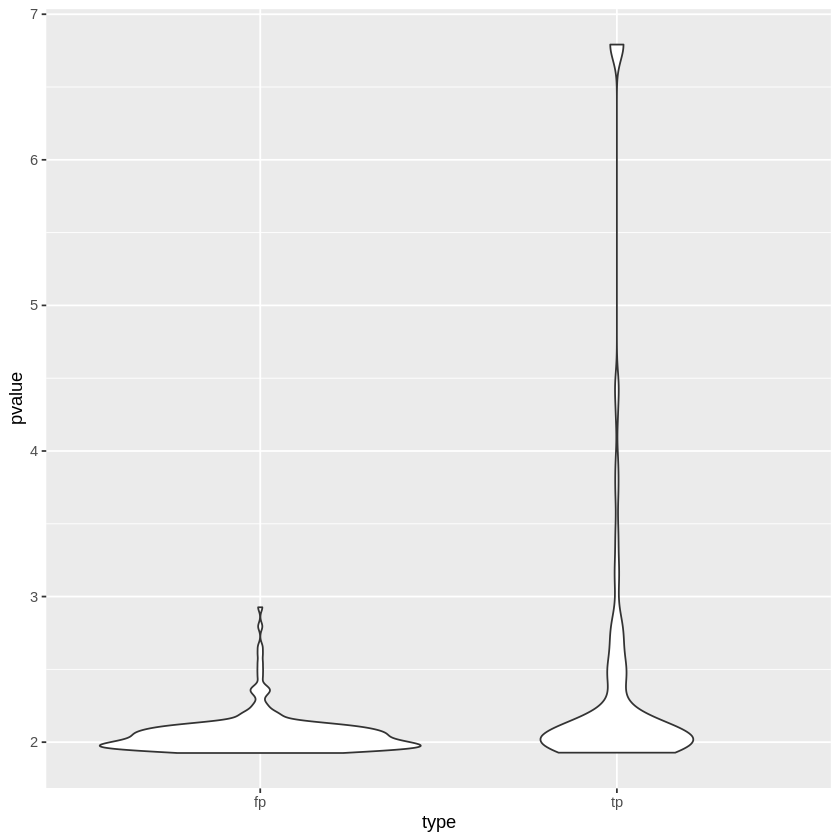

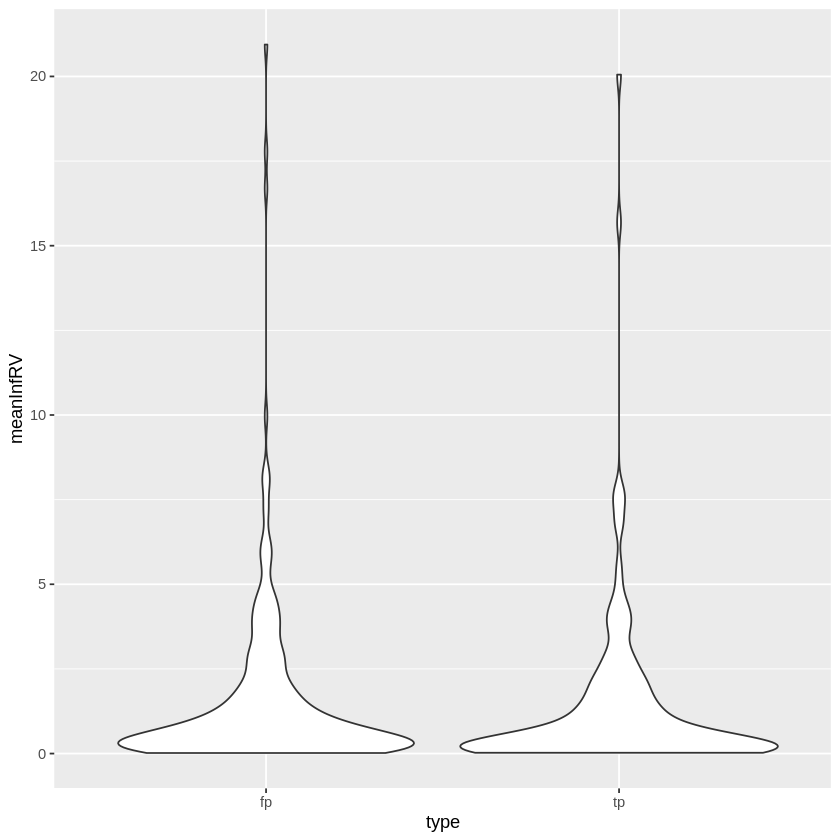

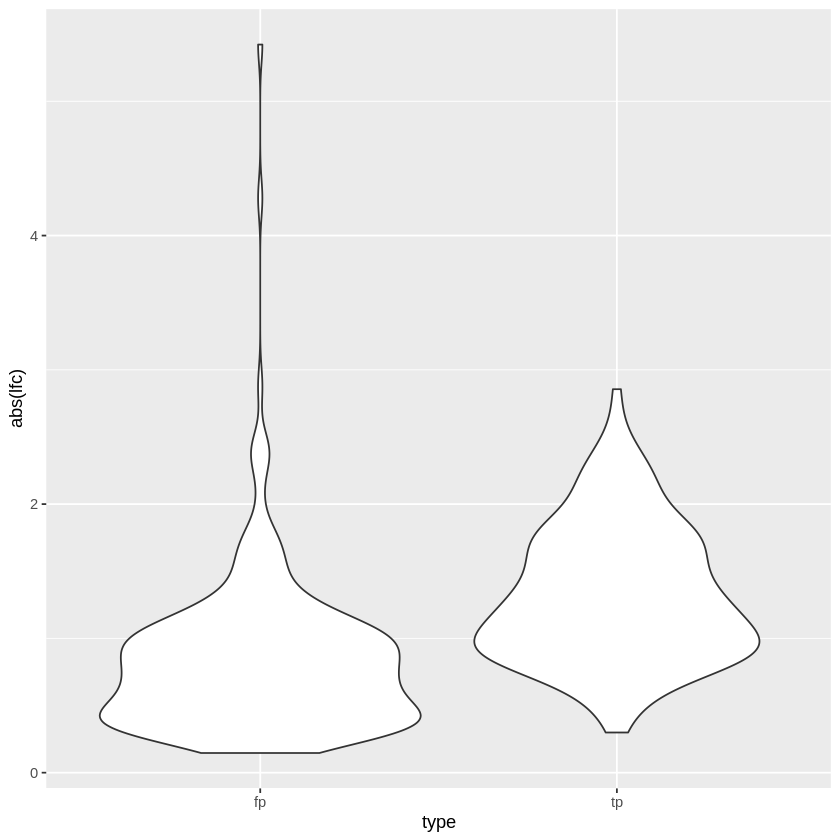

In [115]:
fpNodes <- missedNodes[abs(logFCNodes[missedNodes]) <= rootFC]
table(node.depth(treeCons,2)[fpNodes])
sum(sapply(Descendants(treeCons,fpNodes,"child"), function(nodes) {
    all(mcols(yA)[nodes,"meanInfRV"] >= 1)
}))

tpNodes <- missedNodes[abs(logFCNodes[missedNodes]) > rootFC]
table(node.depth(treeCons,2)[tpNodes])

suppressPackageStartupMessages(library(dplyr))
df <- rbind(data.frame(pvalue=-log10(mcols(yA)[tpNodes,"pvalue"]),
                       lfc=mcols(yA)[tpNodes,"log2FC"],
                       meanInfRV=mcols(yA)[tpNodes,"meanInfRV"],
                       type="tp"), data.frame(pvalue=-log10(mcols(yA)[fpNodes,"pvalue"]),
                       lfc=mcols(yA)[fpNodes,"log2FC"],
                       meanInfRV=mcols(yA)[fpNodes,"meanInfRV"],
                       type="fp"))
df %>% ggplot(aes(x=type, y=pvalue)) +
    geom_violin()

df %>% ggplot(aes(x=type, y=meanInfRV)) +
    geom_violin()

df %>% ggplot(aes(x=type, y=abs(lfc))) +
    geom_violin()

In [17]:
mean(abs(logFCNodes[missedNodes]) > rootFC)

[1] 0.3937008

In [21]:
for(h in heights) {
    print(mean(abs(logFCNodes[missedNodes[node.depth(treeCons,2)[missedNodes]==h]]) > rootFC))
}

[1] 0.3858521
[1] 0.5238095
[1] 0.3478261
[1] 0.4285714
[1] 0.1666667
[1] 1
[1] 0
[1] 1
[1] 0


In [39]:
for(h in heights) {
    mNodes <- missedNodes[node.depth(treeCons,2)[missedNodes]==h]
    fps <- mNodes[abs(logFCNodes[mNodes]) <= rootFC]
    if(length(fps) > 0) {
        descFP <- Descendants(treeCons, fps)
        cat(paste("  fps at height", h),
        paste("Node level", length(fps)),
        paste("Txp level", sum(sapply(descFP, function(desc) {
            sum(desc %in% detNodes[["Txps"]][[3]] & abs(logFCNodes[desc]) <= rootFC) > 0 
        }))), sep="\n")
    }
    tps <- mNodes[abs(logFCNodes[mNodes]) > rootFC]
    if(length(tps) > 0) {
        descTP <- Descendants(treeCons, tps)
        cat(paste("  tps at height", h),
        paste("Node level", length(tps)),
        paste("Txp Level", sum(sapply(descTP, function(desc) {
            sum(desc %in% detNodes[["Txps"]][[3]]  & abs(logFCNodes[desc]) > rootFC) > 0 
        }))), sep='\n')
    }
}

  fps at height 1
Node level 191
Txp level 190
  tps at height 1
Node level 120
Txp Level 120
  fps at height 2
Node level 10
Txp level 3
  tps at height 2
Node level 11
Txp Level 6
  fps at height 3
Node level 15
Txp level 4
  tps at height 3
Node level 8
Txp Level 5
  fps at height 4
Node level 8
Txp level 2
  tps at height 4
Node level 6
Txp Level 2
  fps at height 5
Node level 5
Txp level 1
  tps at height 5
Node level 1
Txp Level 0
  tps at height 6
Node level 3
Txp Level 1
  fps at height 8
Node level 1
Txp level 0
  tps at height 9
Node level 1
Txp Level 1
  fps at height 12
Node level 1
Txp level 0


In [19]:
mapDf <- metadata(tseCons)[["txpsAnn"]]
genesMissed <- lapply(Descendants(treeCons, missedNodes), function(desc) {    
    unique(unlist(mapDf[treeCons$tip[desc], "gene_id"]))
})

In [20]:
dgs <- union(dge.genes, c(dte.genes, dtu.genes))
table(sapply(genesMissed, length))
sum(unlist(genesMissed) %in% dg)


  1   2 
377   4 

[1] 166

In [40]:
dGenes <- rownames(gy)[detNodes[["genes"]][[3]]]
for(h in heights) {
    mNodes <- missedNodes[node.depth(treeCons,2)[missedNodes]==h]
    fps <- mNodes[abs(logFCNodes[mNodes]) <= rootFC]
    if(length(fps) > 0) {
        mGenes <- genesMissed[match(fps, missedNodes)]
        cat(paste("  fps at height", h),
        paste("Node level", length(fps)),
        paste("Gene level", sum(sapply(mGenes, function(gs) {
            sum(gs %in% dGenes & !(gs %in% dgs) ) > 0 
        }))), sep="\n")
    }
    tps <- mNodes[abs(logFCNodes[mNodes]) > rootFC]
    if(length(tps) > 0) {
        mGenes <- genesMissed[match(tps, missedNodes)]
        cat(paste("  tps at height", h),
        paste("Node level", length(tps)),
        paste("Gene level", sum(sapply(mGenes, function(gs) {
            sum((gs %in% dGenes) & (gs %in% dgs)) > 0 
        }))), sep="\n")
    }
}

  fps at height 1
Node level 191
Gene level 25
  tps at height 1
Node level 120
Gene level 64
  fps at height 2
Node level 10
Gene level 3
  tps at height 2
Node level 11
Gene level 9
  fps at height 3
Node level 15
Gene level 7
  tps at height 3
Node level 8
Gene level 6
  fps at height 4
Node level 8
Gene level 0
  tps at height 4
Node level 6
Gene level 4
  fps at height 5
Node level 5
Gene level 2
  tps at height 5
Node level 1
Gene level 1
  tps at height 6
Node level 3
Gene level 2
  fps at height 8
Node level 1
Gene level 1
  tps at height 9
Node level 1
Gene level 1
  fps at height 12
Node level 1
Gene level 0


In [17]:
mean(missedNodes[missedNodes <= l] %in% detNodes[["Txps"]][[3]])

[1] 0.9967846

In [16]:
txpN <- detNodes[["Txps"]][[3]]
paste("Common Node",sum(treeTermN %in% txpN)) ##common nodes
remNodes <- setdiff(treeTermN, txpN)
paste("Nodes unique to treeTerm",length(remNodes))

remTxp <- setdiff(txpN, treeTermN)
paste("Nodes unique to txps", length(remTxp))
                             
ancRem <- Ancestors(treeCons, remTxp)
txpAncTreeDE <- remTxp[sapply(ancRem, function(anc) sum(anc %in% treeTermN) > 0)]
ancRemtxpNodes <- sapply(ancRem[match(txpAncTreeDE, remTxp)], function(anc) anc[anc %in% treeTermN])
paste("Unique nodes in txp that have a node in treeTerm as an ancestor", length(txpAncTreeDE))

[1] "Common Node 5900"

[1] "Nodes unique to treeTerm 1205"

[1] "Nodes unique to txps 1423"

[1] "Unique nodes in txp that have a node in treeTerm as an ancestor 1423"

In [17]:
mNodes <- setdiff(remNodes, ancRemtxpNodes)
length(mNodes)
mean(abs(logFCNodes[mNodes]) > rootFC)

[1] 87

[1] 0.5057471

In [18]:
fpNodes <- mNodes[abs(logFCNodes[mNodes]) <= rootFC]
table(node.depth(treeCons,2)[fpNodes])

i <- 25
mcols(yA)[c(fpNodes[i],Descendants(treeCons, fpNodes[i], "all")),]
rownames(yA)[Descendants(treeCons, fpNodes[i], "child")]
logFCNodes[c(fpNodes[i],Descendants(treeCons, fpNodes[i], "all"))]


 1  2  3  4  5  8 12 
 1 15 13  7  5  1  1 

DataFrame with 3 rows and 4 columns
                  meanInfRV log10mean     pvalue    log2FC
                  <numeric> <numeric>  <numeric> <numeric>
Node194217        0.0821655   1.68656 0.00248489  1.075764
ENST00000565888.1 1.0095584   1.25206 0.05397311  1.027647
ENST00000440790.6 0.6156150   1.50471 0.06639738  0.864407

[1] "ENST00000565888.1" "ENST00000440790.6"

Node194217 ENST00000565888.1 ENST00000440790.6 
                0                 0                 0

In [23]:
sum(sapply(Descendants(treeCons,fpNodes,"child"), function(nodes) {
    all(mcols(yA)[nodes,"meanInfRV"] >= 1)
}))
sum(abs(mcols(yA)[fpNodes, "log2FC"])>1 & fpNodes>l)

[1] 16

[1] 3

In [20]:
tpNodes <- mNodes[abs(logFCNodes[mNodes]) > rootFC]
table(node.depth(treeCons,2)[tpNodes])
tpNodes[1:10]
i <- 4
mcols(yA)[c(tpNodes[i],Descendants(treeCons, tpNodes[i], "all")),]
rownames(yA)[Descendants(treeCons, tpNodes[i], "child")]


 1  2  3  4  5  6 
 3 21 13  4  1  2 

[1] 143499 148099 149248  18534 151179 152490 152511 158602 161549  32761

DataFrame with 2 rows and 4 columns
                  meanInfRV log10mean    pvalue    log2FC
                  <numeric> <numeric> <numeric> <numeric>
ENST00000368440.4   2.10702   2.08521 0.0118644   2.94782
ENST00000368440.4   2.10702   2.08521 0.0118644   2.94782

character(0)

In [21]:
sum(sapply(Descendants(treeCons,tpNodes,"child"), function(nodes) {
    all(mcols(yA)[nodes,"meanInfRV"] >= 1)
}))
sum(abs(mcols(yA)[tpNodes, "log2FC"])>1)

[1] 36

[1] 30

In [50]:
aggCountsNodes[Descendants(treeCons, fpNodes[i], "all"),]
assays(yA)[["infRep1"]][Descendants(treeCons, fpNodes[i], "all"),]
assays(tseCons)[["infRep1"]][Descendants(treeCons, fpNodes[i], "all"),]

144209,1163.08048,1163.08048
ENST00000575225.5,39.27676,39.27676
ENST00000399336.8,633.82039,633.82039
ENST00000263012.10,529.26009,529.26009


,1_1,2_1,3_1,4_1,5_1,6_1,1_2,2_2,3_2,4_2,5_2,6_2
Node144209,960.4907,1120.44692,722.56277,1142.5035,1305.26010,887.03678,686.480905,595.08870,746.68291,585.93786,596.30852,812.788187
ENST00000575225.5,147.2032,65.48945,109.45634,22.6358,12.01053,19.08313,5.696369,84.12559,9.00821,11.87673,37.52966,5.376852
ENST00000399336.8,427.4534,665.13981,713.33139,953.0471,686.32338,173.60453,249.582519,592.32127,413.12991,145.92899,106.08285,473.016559
ENST00000263012.10,505.5161,491.10582,51.76862,223.5703,594.74769,680.92601,422.410716,37.59289,325.58557,431.32499,468.31107,338.158379


,1_1,2_1,3_1,4_1,5_1,6_1,1_2,2_2,3_2,4_2,5_2,6_2
Node144209,967.3356,1220.2771,835.51480,1229.2273,1414.71936,939.79510,688.960273,657.82986,796.495308,597.8834,629.20750,888.557470
ENST00000575225.5,153.0351,69.2976,119.33386,23.7289,13.21212,20.96523,5.853408,88.19746,9.701646,12.3141,41.03807,5.872037
ENST00000399336.8,441.9561,700.7704,779.06453,994.9008,760.11062,191.70121,255.075289,618.43313,445.764875,150.7230,116.79238,519.227272
ENST00000263012.10,525.3795,519.5067,56.45027,234.3265,654.60874,748.09389,433.884984,39.39673,350.730433,447.1604,512.41512,369.330199


In [122]:
compSummStat <- function(infRepsArray, condition, f, diff = TRUE) {
    dims <- dim(infRepsArray)
    if(diff) {
            cond1 <- condition == levels(condition)[1]
            cond2 <- condition == levels(condition)[2]
            diffs <- matrix(nrow = dims[1], ncol = dims[3])
            for (k in seq_len(dims[3])) {
                diffs[, k] <- f(infRepsArray[, cond2, k]) - 
                    f(infRepsArray[, cond1, k])
            }
        return(rowMedians(diffs))
    }
    else{
        vals <- matrix(nrow = dims[1], ncol = dims[3])
        for (k in seq_len(dims[3])) {
            vals[, k] <- f(infRepsArray[, condition, k])
        }
        return(rowMedians(vals))
    }
}

In [126]:
infReps[,tpNodes,]

ERROR: Error in infReps[, tpNodes, ]: subscript out of bounds


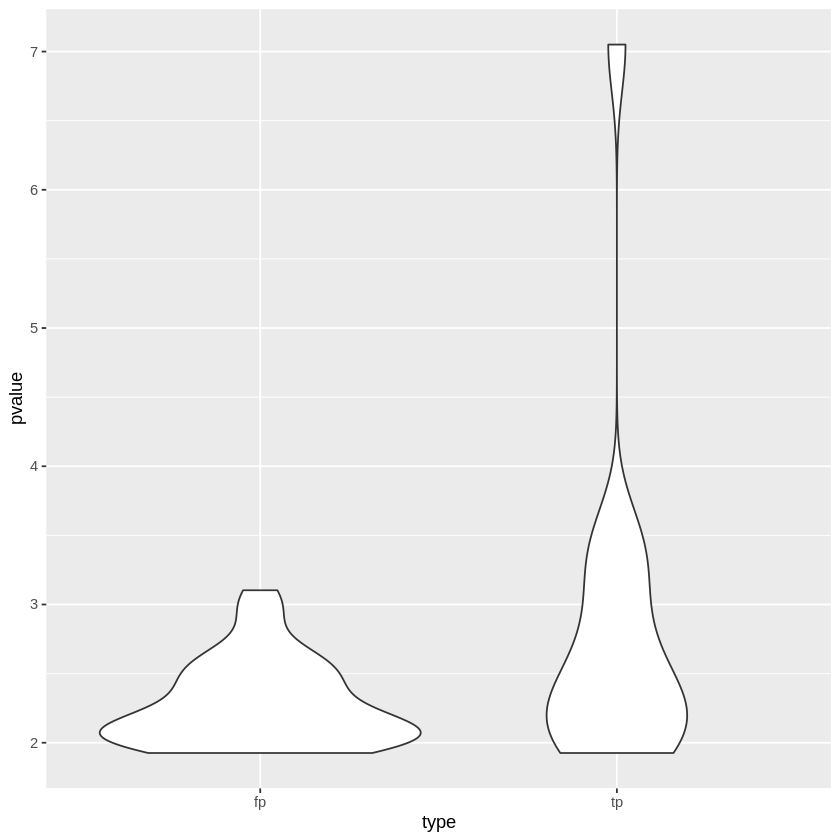

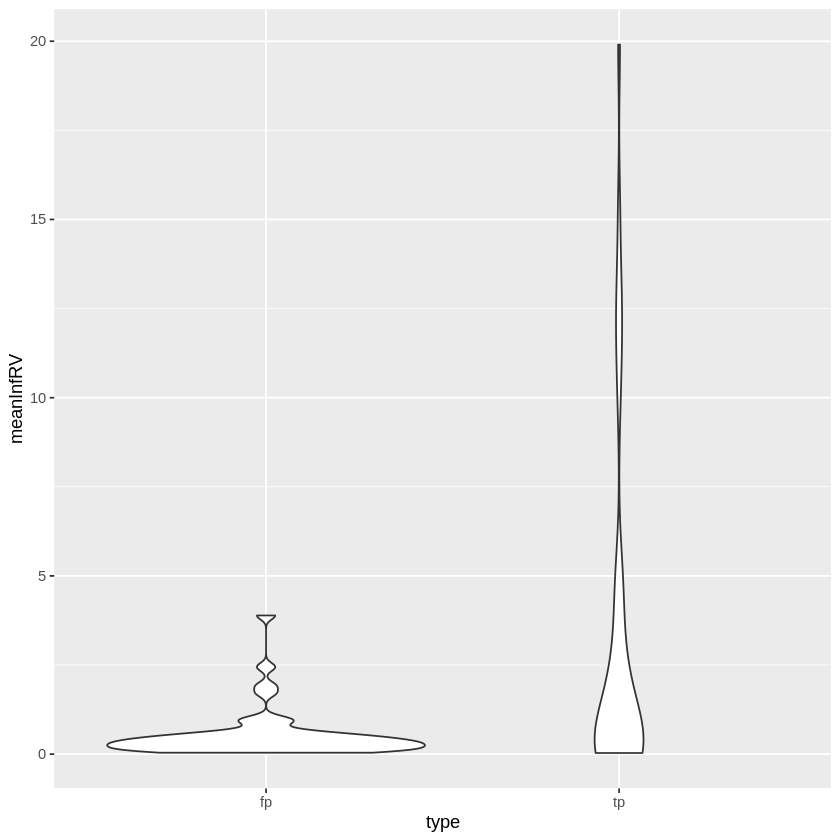

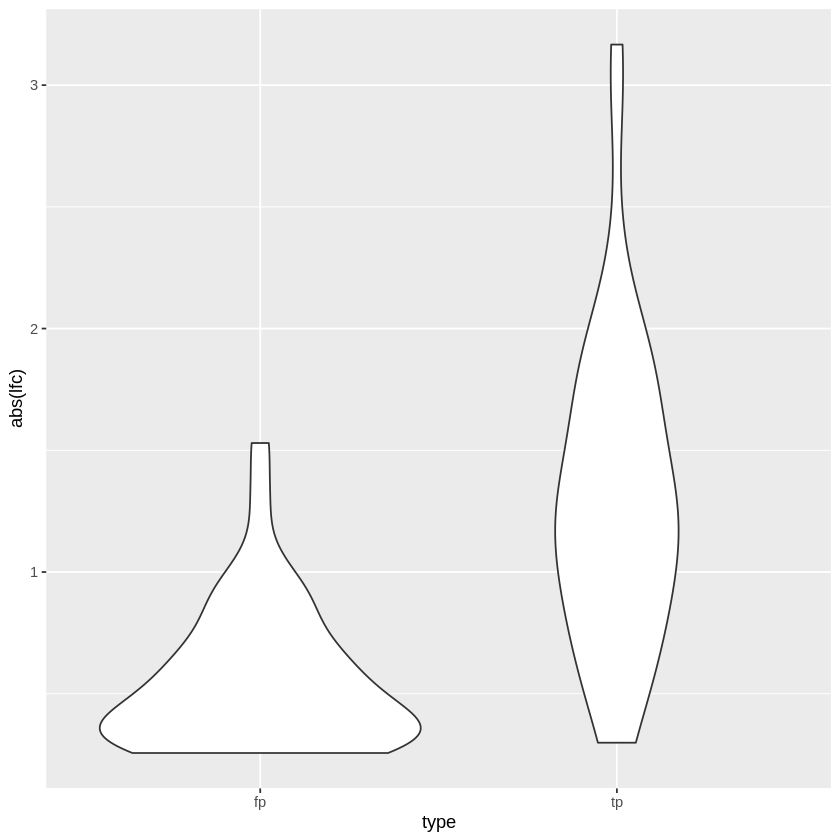

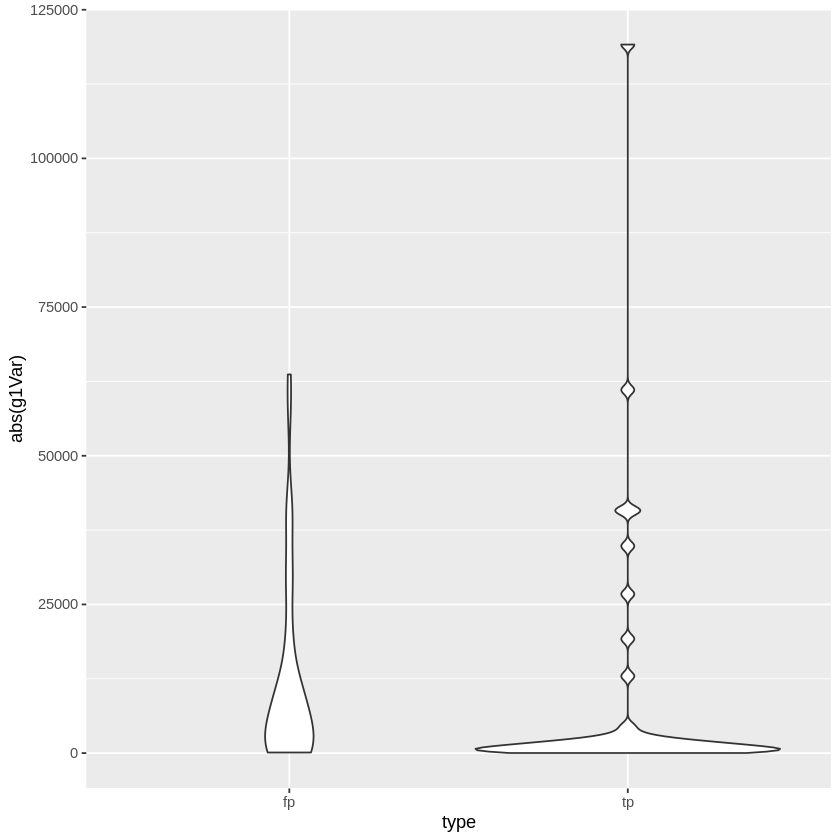

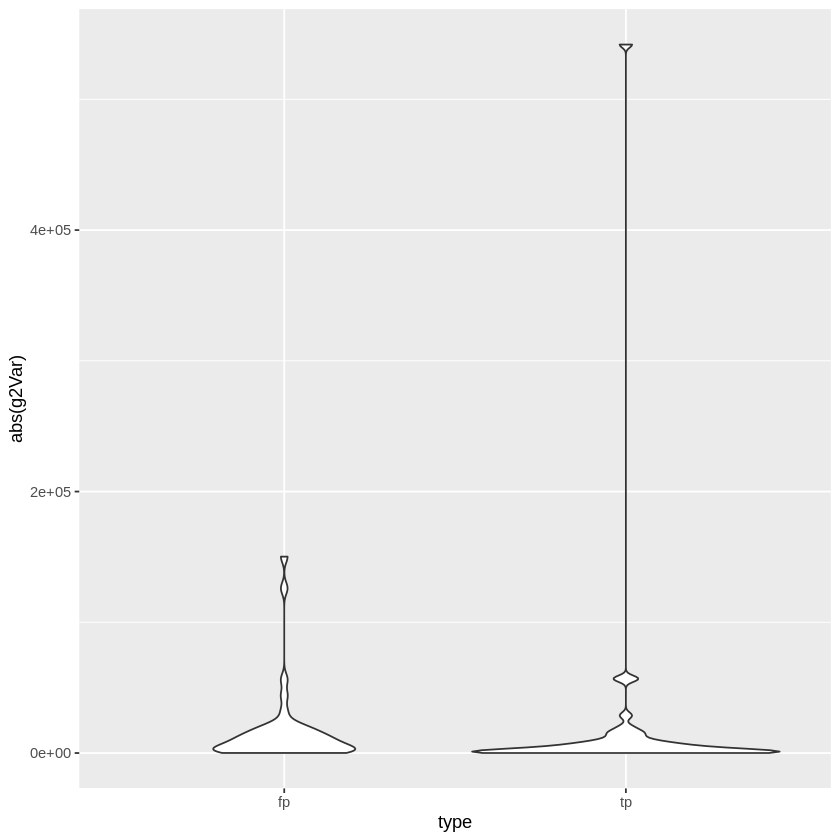

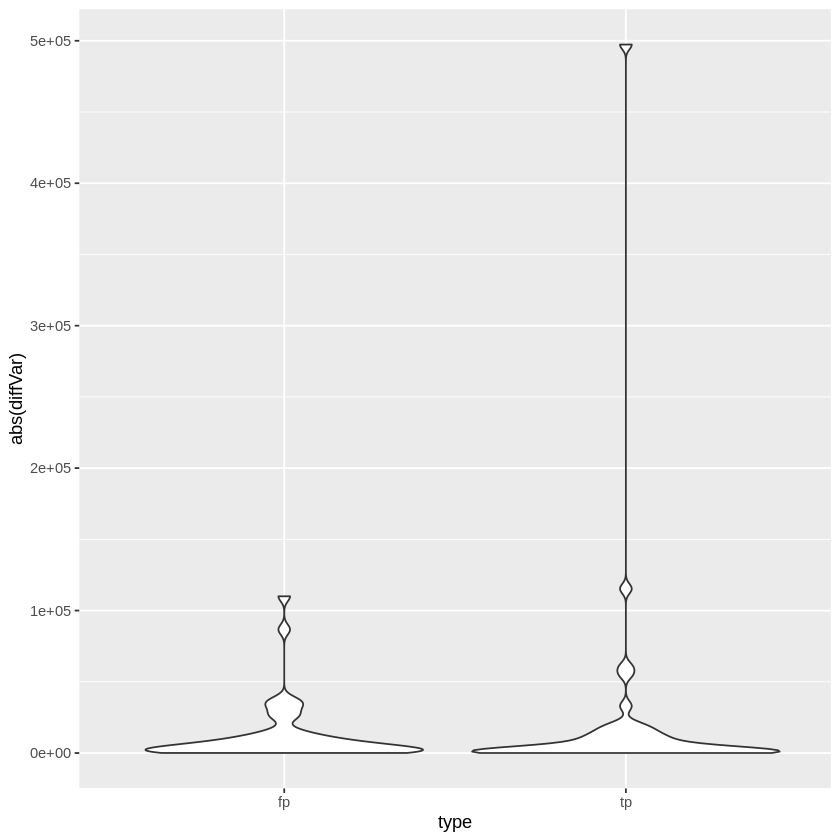

In [127]:
suppressPackageStartupMessages(library(dplyr))
df <- rbind(data.frame(pvalue=-log10(mcols(yA)[tpNodes,"pvalue"]),
                       lfc=mcols(yA)[tpNodes,"log2FC"],
                       meanInfRV=mcols(yA)[tpNodes,"meanInfRV"],
                       g1Var=compSummStat(infReps[tpNodes,,], condition = colData(yA)[["condition"]]==1, rowVars, diff=F),
                       g2Var=compSummStat(infReps[tpNodes,,], condition = colData(yA)[["condition"]]==2, rowVars, diff=F),
                       diffVar=compSummStat(infReps[tpNodes,,], condition = colData(yA)[["condition"]], rowVars, diff=T),
                       type="tp"), 
            data.frame(pvalue=-log10(mcols(yA)[fpNodes,"pvalue"]),
                       lfc=mcols(yA)[fpNodes,"log2FC"],
                       meanInfRV=mcols(yA)[fpNodes,"meanInfRV"],
                       g1Var=compSummStat(infReps[fpNodes,,], condition = colData(yA)[["condition"]]==1, rowVars, diff=F),
                       g2Var=compSummStat(infReps[fpNodes,,], condition = colData(yA)[["condition"]]==2, rowVars, diff=F),
                       diffVar=compSummStat(infReps[fpNodes,,], condition = colData(yA)[["condition"]], rowVars, diff=T),
                       type="fp"))
df %>% ggplot(aes(x=type, y=pvalue)) +
    geom_violin()

df %>% ggplot(aes(x=type, y=meanInfRV)) +
    geom_violin()

df %>% ggplot(aes(x=type, y=abs(lfc))) +
    geom_violin()

df %>% ggplot(aes(x=type, y=abs(g1Var))) +
    geom_violin()

df %>% ggplot(aes(x=type, y=abs(g2Var))) +
    geom_violin()

df %>% ggplot(aes(x=type, y=abs(diffVar))) +
    geom_violin()

In [58]:
df %>%
    filter(type=="tp") %>%
    select(pvalue) %>%
    summary

df %>%
    filter(type=="fp") %>%
    select(pvalue) %>%
    summary

     pvalue     
 Min.   :1.926  
 1st Qu.:2.109  
 Median :2.364  
 Mean   :2.828  
 3rd Qu.:3.188  
 Max.   :7.051  

     pvalue     
 Min.   :1.926  
 1st Qu.:2.046  
 Median :2.183  
 Mean   :2.279  
 3rd Qu.:2.462  
 Max.   :3.103  

In [39]:
head(df)

,pvalue,lfc,meanInfRV,type
,<dbl>,<dbl>,<dbl>,<chr>
Node143499,1.963366,2.3084778,0.3629013,tp
Node148099,2.139706,-1.7874479,11.1876984,tp
Node149248,2.091476,0.8898992,0.1978807,tp
ENST00000368440.4,1.925754,2.9478170,2.1070213,tp
Node151179,3.484760,1.6083581,5.3325775,tp
Node152490,2.759928,1.1788311,0.1399728,tp


In [51]:
txpN <- detNodes[["Txps"]][[3]]
paste("Common Node",sum(tcrN %in% txpN)) ##common nodes
remTCR <- setdiff(tcrN, txpN)
paste("Nodes unique to tcr",length(remTCR))

remTxp <- setdiff(txpN, tcrN)
paste("Nodes unique to txps", length(remTxp))
                             
ancRem <- Ancestors(treeCons, remTxp)
txpAncTCR <- remTxp[sapply(ancRem, function(anc) sum(anc %in% tcrN) > 0)]
ancRemtxpNodes <- sapply(ancRem[match(txpAncTCR, remTxp)], function(anc) anc[anc %in% tcrN])
paste("Unique nodes in txp that have a node in tcr as an ancestor", length(txpAncTCR))

[1] "Common Node 2996"

[1] "Nodes unique to tcr 1325"

[1] "Nodes unique to txps 4327"

[1] "Unique nodes in txp that have a node in tcr as an ancestor 3988"

In [52]:
mTxps <- setdiff(remTxp, c(txpAncTCR))
length(mTxps)
mean(abs(logFCNodes[mTxps]) > rootFC)

[1] 339

[1] 0.4100295

In [53]:
mTCR <- setdiff(remTCR, c(ancRemtxpNodes))
length(mTCR)
mean(abs(logFCNodes[mTCR]) > rootFC)

[1] 27

[1] 0.5185185

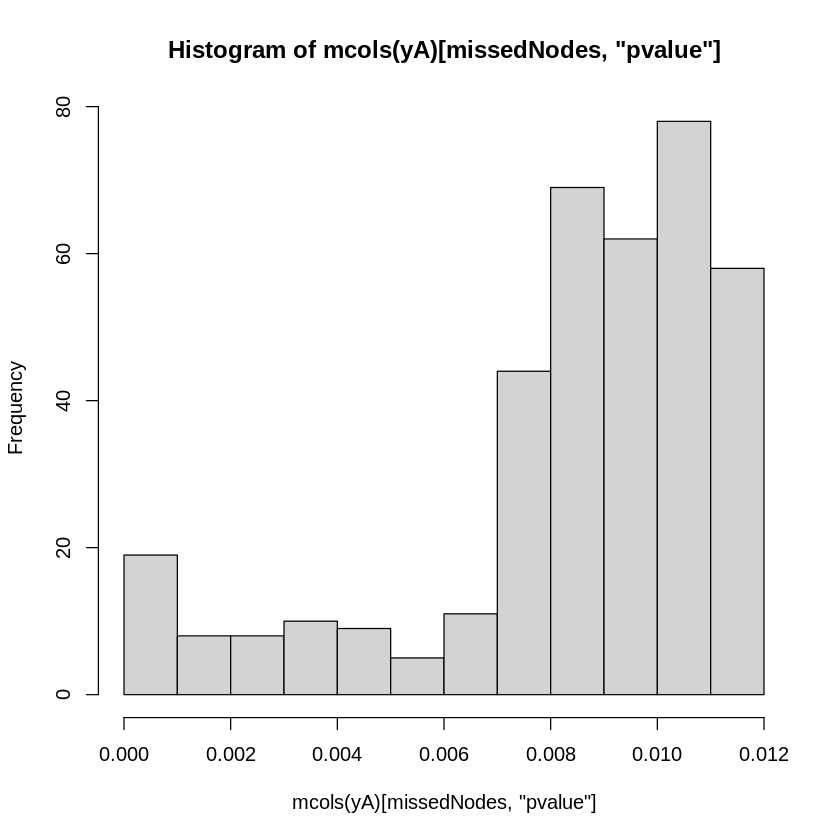

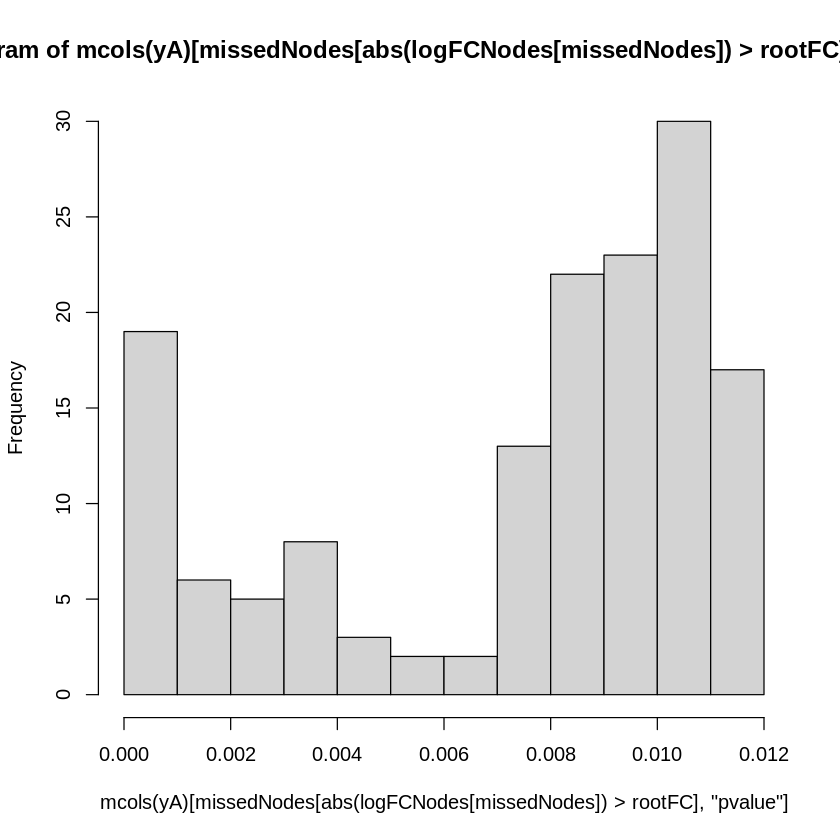

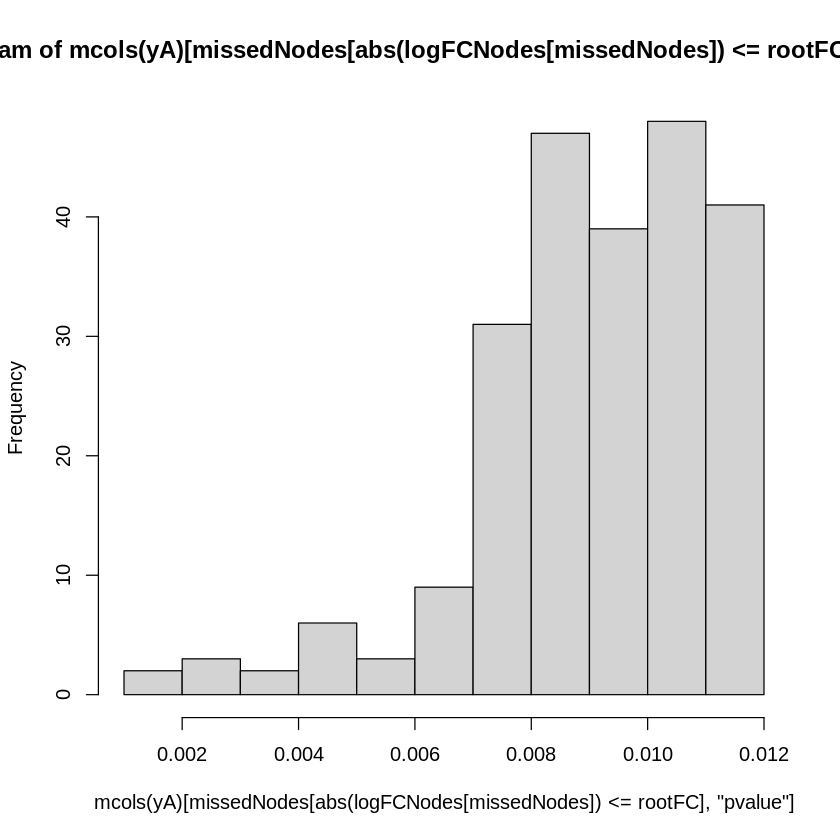

In [18]:
hist(mcols(yA)[missedNodes, "pvalue"])
hist(mcols(yA)[missedNodes[abs(logFCNodes[missedNodes]) > rootFC], "pvalue"])
hist(mcols(yA)[missedNodes[abs(logFCNodes[missedNodes]) <= rootFC], "pvalue"])

In [137]:
missedNodes[21:30]
logFCNodes[missedNodes[21:30]]
aggCountsNodes[missedNodes[21:30],]

[1]   4461   5352   5391   5637   6293   6355   6670   6781   7844 141901

ENST00000361956.7 ENST00000285243.6 ENST00000358869.4 ENST00000503539.5 
     0.000000e+00      0.000000e+00      0.000000e+00      8.881784e-16 
ENST00000614586.2 ENST00000431724.2 ENST00000366933.4 ENST00000287025.3 
     0.000000e+00      0.000000e+00      1.280113e+00      0.000000e+00 
ENST00000511077.1        Node141901 
     0.000000e+00      0.000000e+00

ENST00000361956.7,104.50153,104.50153
ENST00000285243.6,6224.35949,6224.35949
ENST00000358869.4,199.14640,199.14640
ENST00000503539.5,42.55739,42.55739
ENST00000614586.2,239.72761,239.72761
ENST00000431724.2,113.48450,113.48450
ENST00000366933.4,22.12758,55.16718
ENST00000287025.3,269.19609,269.19609
ENST00000511077.1,430.24139,430.24139
141901,551.23078,551.23078


In [131]:
length(logFCNodes)

[1] 254301

In [98]:
bSwish[[3]]$output[["node"]][2000,]

[1] 57914    10

[1] 93

[1] 476

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.04179  0.66501  1.29145  2.93724  3.06145 73.34883 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0171   0.3877   1.2245   3.0197   3.0726 169.5252 

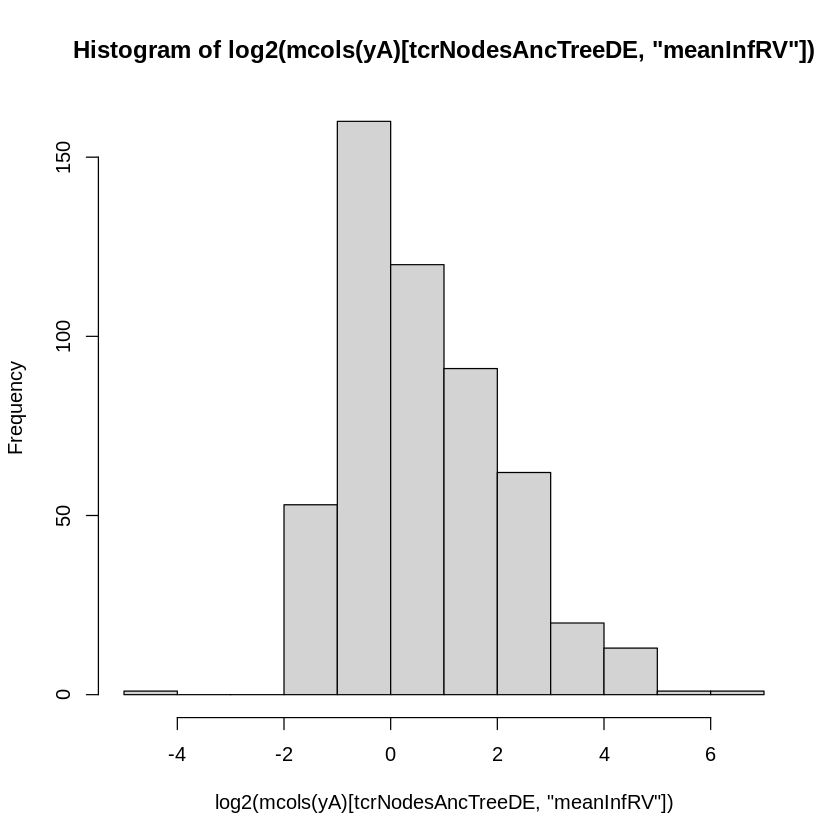

In [30]:
sum(tcrNodesAncTreeDE > l)
sum(treeDENodesAncTcr > l)
hist(log2(mcols(yA)[tcrNodesAncTreeDE,"meanInfRV"]))
summary(mcols(yA)[tcrNodesAncTreeDE,"meanInfRV"])
summary(mcols(yA)[treeDENodesAncTcr,"meanInfRV"])

In [68]:
length(remNodes)

[1] 4381

In [29]:
nd <- tcrNodesAncTreeDE[mcols(yA)[tcrNodesAncTreeDE,"meanInfRV"] < 0.3]
nd
ch <- Descendants(treeCons,Ancestors(treeCons,tcrNodesAncTreeDE[mcols(yA)[tcrNodesAncTreeDE,"meanInfRV"] < 0.3])[4],"children")
dtxps <- Descendants(treeCons,Ancestors(treeCons,nd)[4])[[1]]
mcols(yA)[ch,]
mcols(yA)[dtxps,]
mcols(yA)[nd,]

[1] 37215

DataFrame with 2 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
Node166978         0.437877   2.91186 2.06194e-02
ENST00000573479.1  0.914603   1.71731 1.61574e-07

DataFrame with 5 rows and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
ENST00000521273.1 3.8707754  1.460740 6.37105e-01
ENST00000357495.3 0.0417914  2.806408 1.61574e-07
ENST00000548688.5 2.4861192  0.808725          NA
ENST00000547708.5 1.5173971  2.015468 3.45990e-01
ENST00000573479.1 0.9146025  1.717307 1.61574e-07

DataFrame with 1 row and 3 columns
                  meanInfRV log10mean      pvalue
                  <numeric> <numeric>   <numeric>
ENST00000357495.3 0.0417914   2.80641 1.61574e-07